# Track experiments

Use to pick relevant runs based on JSON file dumped after the experiment

```bash
python moment_freq_prior.py --train-list data/processed/charades-sta/train.json --test-list data/processed/charades-sta/test.json --h5-path data/processed/charades-sta/rgb_resnet152_max_cs-3.h5
```

To export notebook as html

In [ ]:
filename = 'dashboard/templates/track_experiments.html'
import os
assert os.system(f'jupyter nbconvert --to html track-experiments.ipynb --output {filename}') == 0

track experiments in clusters

In [ ]:
worker = 'ibex'
print('check who failed')
!grep "error" workers/$worker/log/*.out
!grep "permission denied" workers/$worker/log/*.out
print('check experiments')
!grep -o -a -m 1 "talcv1_03/b" workers/$worker/log/*.out
print('succesffuly executed')
!grep -o -a -m 1 "successfully done" workers/$worker/log/*.out | wc -l
!grep -o -a -m 1 "successfully done" workers/$worker/log/*.out

## !Don't lose focus!
___

- mcn-16
    - compile results from marla [d-f], launch Oct 21.
    - compile results from skynet and ibex in HPS, launch Oct 21.

- error analysis corpus video moment retrieval
    - dump rest of best model
    - study 100 descriptions: 50 random. 25 ranked in top 10. 25 rank > top-50%.

## 21. SMCN

Last update: Nov 6 - Created: Nov 5

_conclusions_:

- 

_scope_: consolidate results of MCN in ActivityNet-Captions.

- model: MCN.

- training scheme: only ActivityNet training videos.

- features: ResNet152 pre-trained on [ILSVCR-2012](http://www.image-net.org/challenges/LSVRC/2012/) for object classification.

- Please take a look at the README and JSON files for more details.

In [1]:
from utils import jsons_to_dataframe
import os
METRICS = ['iou', 'r@1', 'r@5', 'r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
METRICS = ['r@1,0.5', 'r@5,0.5', 'r@1,0.7', 'r@5,0.7']
SUBSET = 'test'

# ('SMCN-ResNet', 'workers/skynet/data/interim/smcn_31/b/'),
# ('SMCN-ResNet (TEF)', 'workers/marla/data/interim/smcn_31/a'),
# ('MCN TEF', 'workers/marla/data/interim/mcn_21/e'),
for exp_ref, i in [
    ('MCN-ResNet', 'workers/ibex-fscratch/data/interim/mcn_21/d'),
    ('SMCN-ResNet', 'workers/skynet/data/interim/smcn_31/d'), 
    ('MCN-ResNet (TEF)', 'workers/ibex-fscratch/data/interim/mcn_21/c'),
    ('SMCN-ResNet (TEF)', 'workers/skynet/data/interim/smcn_31/c'),
    ('TEF', 'workers/skynet/data/interim/mcn_21/f'),
    ]:
    if not os.path.exists(i):
        print(f'Skip {exp_ref}')
        continue
    basename = os.path.basename(i)
    if 'mcn' not in basename:
        basename = os.path.basename(os.path.dirname(i))
    
    df = jsons_to_dataframe(f'{i}/*.json')
    if len(df) < 3:
        print(f'Skip {basename}')
        continue
    
    print(basename, exp_ref)
    for j in METRICS:
        col = f'{SUBSET}_{j}'
        if col in df.columns:
            result = df.loc[:, col]
        else:
            continue
        print(col, f'{result.mean():.4f} +- {result.std():.4f}')

/home/escorciav/install/bin/miniconda3/envs/moments-retrieval-devel/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


mcn_21 MCN-ResNet
test_r@1,0.5 0.1350 +- 0.0018
test_r@5,0.5 0.4717 +- 0.0007
test_r@1,0.7 0.0579 +- 0.0008
test_r@5,0.7 0.2351 +- 0.0012
smcn_31 SMCN-ResNet
test_r@1,0.5 0.1159 +- 0.0011
test_r@5,0.5 0.4223 +- 0.0022
test_r@1,0.7 0.0493 +- 0.0006
test_r@5,0.7 0.2051 +- 0.0007
mcn_21 MCN-ResNet (TEF)
test_r@1,0.5 0.3324 +- 0.0025
test_r@5,0.5 0.6180 +- 0.0018
test_r@1,0.7 0.1761 +- 0.0021
test_r@5,0.7 0.3594 +- 0.0032
smcn_31 SMCN-ResNet (TEF)
test_r@1,0.5 0.3410 +- 0.0001
test_r@5,0.5 0.6204 +- 0.0019
test_r@1,0.7 0.1802 +- 0.0005
test_r@5,0.7 0.3585 +- 0.0014
mcn_21 TEF
test_r@1,0.5 0.3316 +- 0.0024
test_r@5,0.5 0.6038 +- 0.0027
test_r@1,0.7 0.1795 +- 0.0005
test_r@5,0.7 0.3579 +- 0.0010


## 27. SMCN

Last update: Nov 6 - Created: Nov 4

_conclusions_:

- SMCN achieves similar or better results than MCN, with TEF. Both are better than previous approaches.

- proposal sampling is beneficial with TEF. Not a strong advantage without TEF, intuitive.

- WIP: SMCN without TEF

_scope_: consolidate results of SMCN in Charades-STA.

- model: SMCN.

- training scheme: only Charades-STA training videos.

- features: ResNet152 pre-trained on [ILSVCR-2012](http://www.image-net.org/challenges/LSVRC/2012/) for object classification.

- Please take a look at the README and JSON files for more details.

### 27 SMCN comparison wrt others

comparison wrt CTRL and MCN

/home/escorciav/install/bin/miniconda3/envs/moments-retrieval-devel/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/escorciav/install/bin/miniconda3/envs/moments-retrieval-devel/lib/python3.6/site-packages/ipykernel_launcher.py:56: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

/home/escorciav/install/bin/miniconda3/envs/moments-retrieval-devel/lib/python3.6/site-packages/pandas/plotting/_core.py:2257: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_

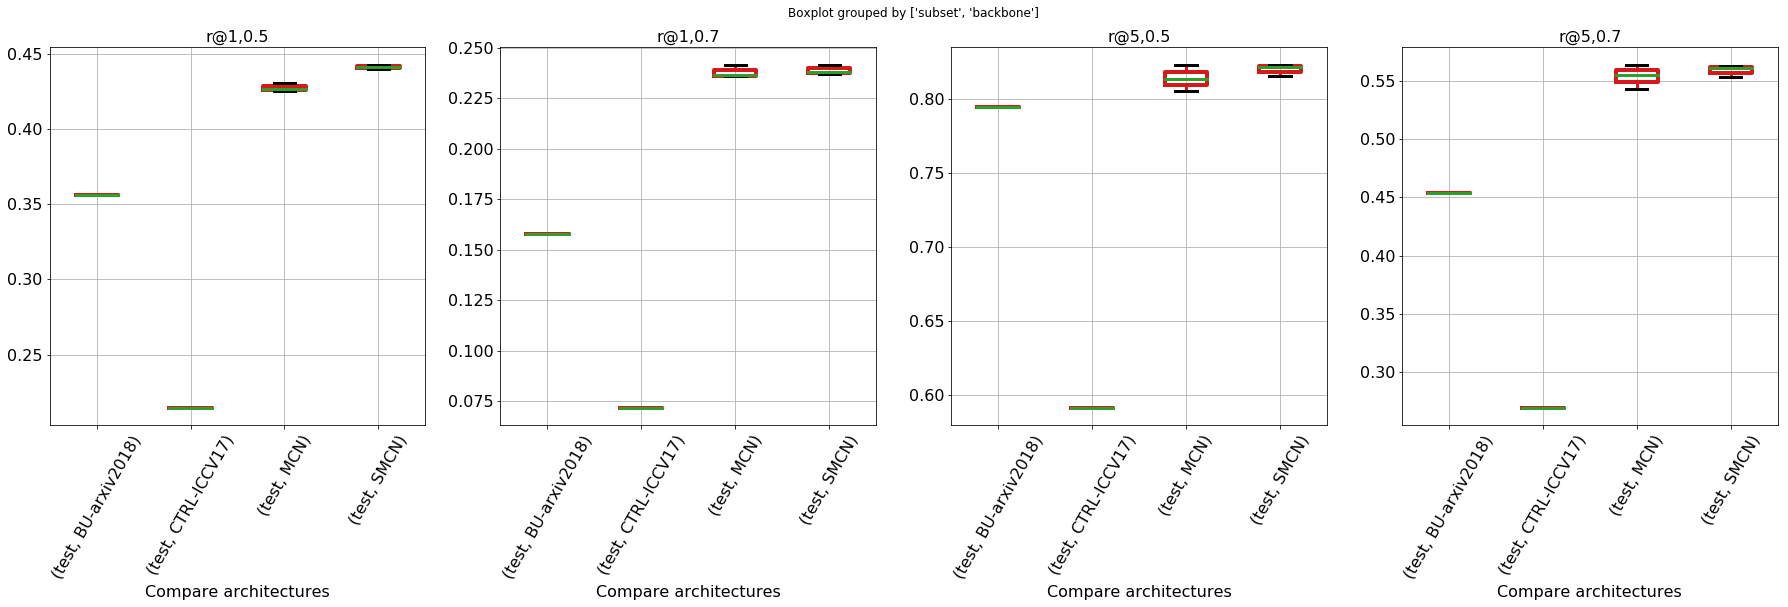

In [1]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare architectures'
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
FAKE_REPETITIONS = 5
SUBSET = 'test'

metric_ref = {
    'CTRL-ICCV17': {'r@1,0.5': 0.2142, 'r@1,0.7': 0.0715, 'r@5,0.5': 0.5911, 'r@5,0.7': 0.2691, 'color': 'orange', 'subset': 'test'},
    'BU-arxiv2018': {'r@1,0.5': 0.356, 'r@1,0.7': 0.158, 'r@5,0.5': 0.794, 'r@5,0.7': 0.454, 'color': 'red', 'subset': 'test'},
}

dfs = []
for ind, i in enumerate(['smcn_27/a', 'mcn_20/a']):
    df = jsons_to_dataframe(f'workers/marla/data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'SMCN'
    elif ind == 1:
        df['backbone'] = 'MCN'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subsets=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subsets, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subsets):
            ind1 = j * len(subset_and_metrics) // len(subsets)
            ind2 = ind1 + len(subset_and_metrics) // len(subsets)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df, [SUBSET])
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, len(METRICS), figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=METRICS, by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
# fig.savefig('/home/escorciav/Downloads/adobe-prj/anet_smcn-mcn-sota.pdf', bbox_inches='tight')

### 27 SMCN table overall results

In [1]:
from utils import jsons_to_dataframe
import os
METRICS = ['iou', 'r@1', 'r@5', 'r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
METRICS = ['r@1,0.5', 'r@5,0.5', 'r@1,0.7', 'r@5,0.7']
SUBSET = 'test'

# 'CTRL-ICCV17': {'r@1,0.5': 0.2142, 'r@1,0.7': 0.0715, 'r@5,0.5': 0.5911, 'r@5,0.7': 0.2691, 'color': 'orange', 'subset': 'test'},

# ('MCN-ResNet', 'workers/marla/data/interim/mcn_20/b'),
# ('SMCN-ResNet', 'workers/marla/data/interim/smcn_27/b'),
# ('MCN-ResNet (TEF)', 'workers/marla/data/interim/mcn_20/a'),
# ('SMCN-ResNet (TEF)', 'workers/marla/data/interim/smcn_27/a'),

for exp_ref, i in [
    ('MCN-ResNet', 'workers/skynet/data/interim/mcn_20/g'),
    ('SMCN-ResNet', 'workers/skynet/data/interim/smcn_27/n'),
    ('MCN-ResNet (TEF)', 'workers/skynet/data/interim/mcn_20/f'),
    ('SMCN-ResNet (TEF)', 'workers/skynet/data/interim/smcn_27/o'),
    ('MCN (TEF)', 'workers/skynet/data/interim/mcn_20/h'),
    ]:
    if not os.path.exists(i):
        print(f'Skip {exp_ref}')
        continue
    basename = os.path.basename(i)
    if 'mcn' not in basename:
        basename = os.path.basename(os.path.dirname(i))
    
    df = jsons_to_dataframe(f'{i}/*.json')
    if len(df) < 3:
        print(f'Skip {exp_ref}')
        continue
    
    print(basename, exp_ref)
    for j in METRICS:
        col = f'{SUBSET}_{j}'
        if col in df.columns:
            result = df.loc[:, col]
        else:
            continue
        print(col, f'{result.mean():.4f} +- {result.std():.4f}')

/home/escorciav/install/bin/miniconda3/envs/moments-retrieval-devel/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


mcn_20 MCN-ResNet
test_r@1,0.5 0.3332 +- 0.0103
test_r@5,0.5 0.7091 +- 0.0053
test_r@1,0.7 0.1528 +- 0.0036
test_r@5,0.7 0.4593 +- 0.0030
smcn_27 SMCN-ResNet
test_r@1,0.5 0.3250 +- 0.0031
test_r@5,0.5 0.7267 +- 0.0037
test_r@1,0.7 0.1562 +- 0.0020
test_r@5,0.7 0.4927 +- 0.0030
mcn_20 MCN-ResNet (TEF)
test_r@1,0.5 0.4388 +- 0.0043
test_r@5,0.5 0.8355 +- 0.0023
test_r@1,0.7 0.2392 +- 0.0019
test_r@5,0.7 0.5711 +- 0.0034
smcn_27 SMCN-ResNet (TEF)
test_r@1,0.5 0.4453 +- 0.0033
test_r@5,0.5 0.8312 +- 0.0048
test_r@1,0.7 0.2397 +- 0.0033
test_r@5,0.7 0.5791 +- 0.0043
mcn_20 MCN (TEF)
test_r@1,0.5 0.3711 +- 0.0034
test_r@5,0.5 0.7848 +- 0.0044
test_r@1,0.7 0.2083 +- 0.0030
test_r@5,0.7 0.5202 +- 0.0048


### 27 SMCN impact of proposal sampling

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare architectures'
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
FAKE_REPETITIONS = 5
SUBSET = 'test'

metric_ref = {
    'CTRL-ICCV17': {'r@1,0.5': 0.2142, 'r@1,0.7': 0.0715, 'r@5,0.5': 0.5911, 'r@5,0.7': 0.2691, 'color': 'orange', 'subset': 'test'},
#     'BU-arxiv2018': {'r@1,0.5': 0.356, 'r@1,0.7': 0.158, 'r@5,0.5': 0.794, 'r@5,0.7': 0.454, 'color': 'red', 'subset': 'test'},
}

dfs = []
for ind, i in enumerate(['smcn_27/a', 'smcn_27/d', 'smcn_27/b', 'smcn_27/c']):
    df = jsons_to_dataframe(f'workers/marla/data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'PS (TEF)'
    elif ind == 1:
        df['backbone'] = 'NoPS (TEF)'
    elif ind == 2:
        df['backbone'] = 'PS'
    elif ind == 3:
        df['backbone'] = 'NoPS'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subsets=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subsets, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subsets):
            ind1 = j * len(subset_and_metrics) // len(subsets)
            ind2 = ind1 + len(subset_and_metrics) // len(subsets)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df, [SUBSET])
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, len(METRICS), figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=METRICS, by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
# fig.savefig('/home/escorciav/Downloads/adobe-prj/anet_smcn-mcn-sota.pdf', bbox_inches='tight')

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare architectures'
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
FAKE_REPETITIONS = 5
SUBSET = 'test'

metric_ref = {
    'CTRL-ICCV17': {'r@1,0.5': 0.2142, 'r@1,0.7': 0.0715, 'r@5,0.5': 0.5911, 'r@5,0.7': 0.2691, 'color': 'orange', 'subset': 'test'},
#     'BU-arxiv2018': {'r@1,0.5': 0.356, 'r@1,0.7': 0.158, 'r@5,0.5': 0.794, 'r@5,0.7': 0.454, 'color': 'red', 'subset': 'test'},
}

dfs = []
for ind, i in enumerate(['mcn_20/a', 'mcn_20/d', 'mcn_20/b', 'mcn_20/c']):
    df = jsons_to_dataframe(f'workers/marla/data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'PS (TEF)'
    elif ind == 1:
        df['backbone'] = 'NoPS (TEF)'
    elif ind == 2:
        df['backbone'] = 'PS'
    elif ind == 3:
        df['backbone'] = 'NoPS'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subsets=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subsets, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subsets):
            ind1 = j * len(subset_and_metrics) // len(subsets)
            ind2 = ind1 + len(subset_and_metrics) // len(subsets)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df, [SUBSET])
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, len(METRICS), figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=METRICS, by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
# fig.savefig('/home/escorciav/Downloads/adobe-prj/anet_smcn-mcn-sota.pdf', bbox_inches='tight')

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare architectures'
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
FAKE_REPETITIONS = 5
SUBSET = 'test'

metric_ref = {
    'CTRL-ICCV17': {'r@1,0.5': 0.2142, 'r@1,0.7': 0.0715, 'r@5,0.5': 0.5911, 'r@5,0.7': 0.2691, 'color': 'orange', 'subset': 'test'},
#     'BU-arxiv2018': {'r@1,0.5': 0.356, 'r@1,0.7': 0.158, 'r@5,0.5': 0.794, 'r@5,0.7': 0.454, 'color': 'red', 'subset': 'test'},
}

dfs = []
for ind, i in enumerate(['smcn_27/b', 'smcn_27/c', 'mcn_20/b', 'mcn_20/c']):
    df = jsons_to_dataframe(f'workers/marla/data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'PS (SMCN)'
    elif ind == 1:
        df['backbone'] = 'NoPS (SMCN)'
    elif ind == 2:
        df['backbone'] = 'PS'
    elif ind == 3:
        df['backbone'] = 'NoPS'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subsets=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subsets, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subsets):
            ind1 = j * len(subset_and_metrics) // len(subsets)
            ind2 = ind1 + len(subset_and_metrics) // len(subsets)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df, [SUBSET])
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, len(METRICS), figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=METRICS, by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
# fig.savefig('/home/escorciav/Downloads/adobe-prj/anet_smcn-mcn-sota.pdf', bbox_inches='tight')

In [ ]:
from utils import jsons_to_dataframe
import os
METRICS = ['iou', 'r@1', 'r@5', 'r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
SUBSET = 'test'

for exp_ref, i in [
    ('PS', 'workers/marla/data/interim/smcn_27/b'),
    ('NoPS ', 'workers/marla/data/interim/smcn_27/c'),
    ('PS (TEF)', 'workers/marla/data/interim/smcn_27/a'),
    ('NoPS (TEF)', 'workers/marla/data/interim/smcn_27/d'),
    ]:
    if not os.path.exists(i):
        continue
    basename = os.path.basename(i)
    if 'mcn' not in basename:
        basename = os.path.basename(os.path.dirname(i))
    
    df = jsons_to_dataframe(f'{i}/*.json')
    if len(df) < 3:
        continue
    
    print(basename, exp_ref)
    for j in METRICS:
        col = f'{SUBSET}_{j}'
        if col in df.columns:
            result = df.loc[:, col]
        else:
            continue
        print(col, f'{result.mean():.4f} +- {result.std():.4f}')

### 27 SMCN TAF

/home/escorciav/install/bin/miniconda3/envs/moments-retrieval-devel/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/escorciav/install/bin/miniconda3/envs/moments-retrieval-devel/lib/python3.6/site-packages/ipykernel_launcher.py:56: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

/home/escorciav/install/bin/miniconda3/envs/moments-retrieval-devel/lib/python3.6/site-packages/pandas/plotting/_core.py:2257: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_

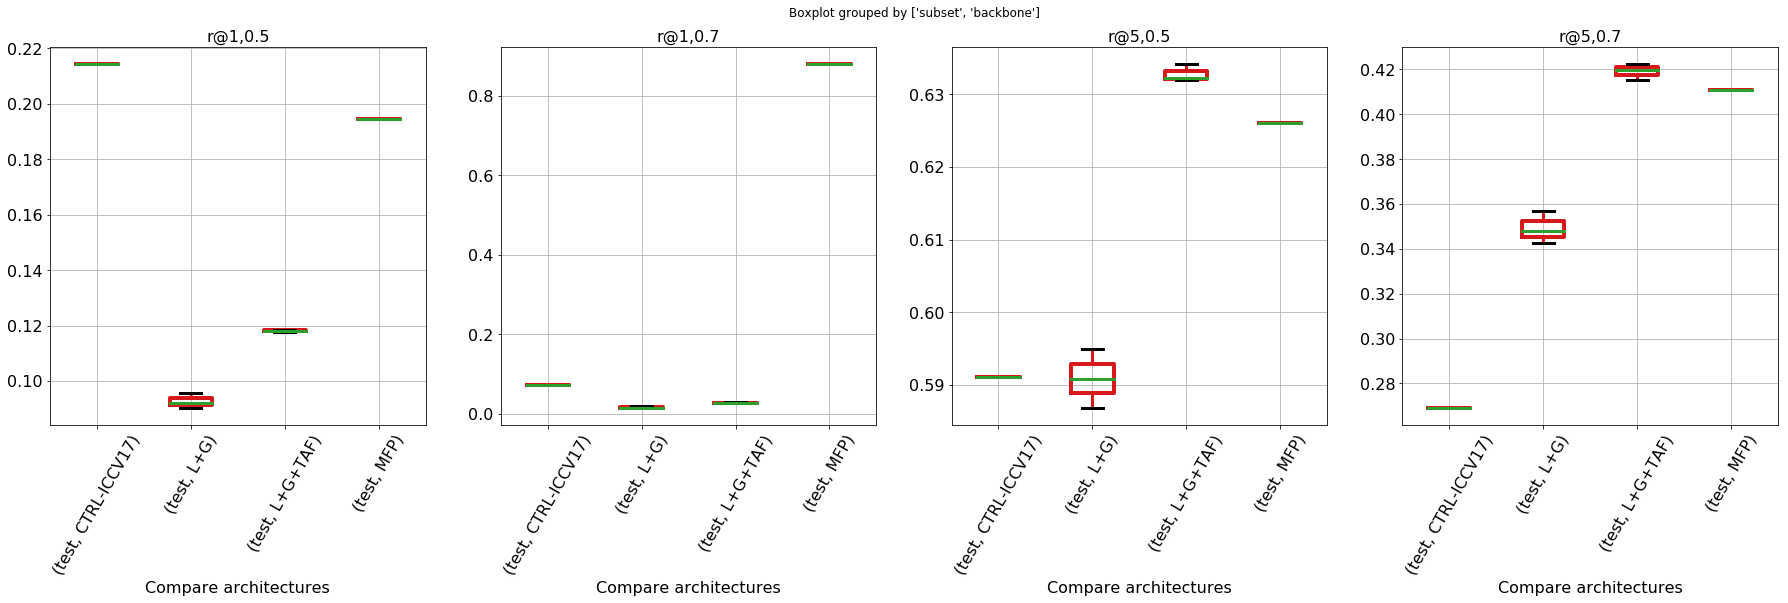

In [2]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare architectures'
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
FAKE_REPETITIONS = 5
SUBSET = 'test'

metric_ref = {
    'CTRL-ICCV17': {'r@1,0.5': 0.2142, 'r@1,0.7': 0.0715, 'r@5,0.5': 0.5911, 'r@5,0.7': 0.2691, 'color': 'orange', 'subset': 'test'},
    'MFP': {'r@1,0.5': .1946, 'r@1,0.7': .879, 'r@5,0.5': .6261, 'r@5,0.7': .4108, 'color': 'green', 'subset': 'test'},
}

dfs = []
for ind, i in enumerate(['smcn_27/e', 'smcn_27/b']):
    df = jsons_to_dataframe(f'workers/marla/data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'L+G+TAF'
    elif ind == 1:
        df['backbone'] = 'L+G'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subsets=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subsets, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subsets):
            ind1 = j * len(subset_and_metrics) // len(subsets)
            ind2 = ind1 + len(subset_and_metrics) // len(subsets)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df, [SUBSET])
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, len(METRICS), figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=METRICS, by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
# fig.savefig('/home/escorciav/Downloads/adobe-prj/anet_smcn-mcn-sota.pdf', bbox_inches='tight')

In [1]:
from utils import jsons_to_dataframe
import os
METRICS = ['iou', 'r@1', 'r@5', 'r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
SUBSET = 'test'

for exp_ref, i in [
    ('L+G+TAF', 'workers/marla/data/interim/smcn_27/e'),
    ('L+G', 'workers/marla/data/interim/smcn_27/b'),
    ]:
    if not os.path.exists(i):
        continue
    basename = os.path.basename(i)
    if 'mcn' not in basename:
        basename = os.path.basename(os.path.dirname(i))
    
    df = jsons_to_dataframe(f'{i}/*.json')
    if len(df) < 3:
        continue
    
    print(basename, exp_ref)
    for j in METRICS:
        col = f'{SUBSET}_{j}'
        if col in df.columns:
            result = df.loc[:, col]
        else:
            continue
        print(col, f'{result.mean():.4f} +- {result.std():.4f}')

/home/escorciav/install/bin/miniconda3/envs/moments-retrieval-devel/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


smcn_27 L+G+TAF
test_r@1,0.5 0.1181 +- 0.0004
test_r@1,0.7 0.0271 +- 0.0012
test_r@5,0.5 0.6328 +- 0.0012
test_r@5,0.7 0.4190 +- 0.0037
smcn_27 L+G
test_r@1,0.5 0.0927 +- 0.0027
test_r@1,0.7 0.0164 +- 0.0021
test_r@5,0.5 0.5909 +- 0.0040
test_r@5,0.7 0.3493 +- 0.0072


### 27 SMCN hyper-parameter search

/home/escorciav/install/bin/miniconda3/envs/moments-retrieval-devel/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


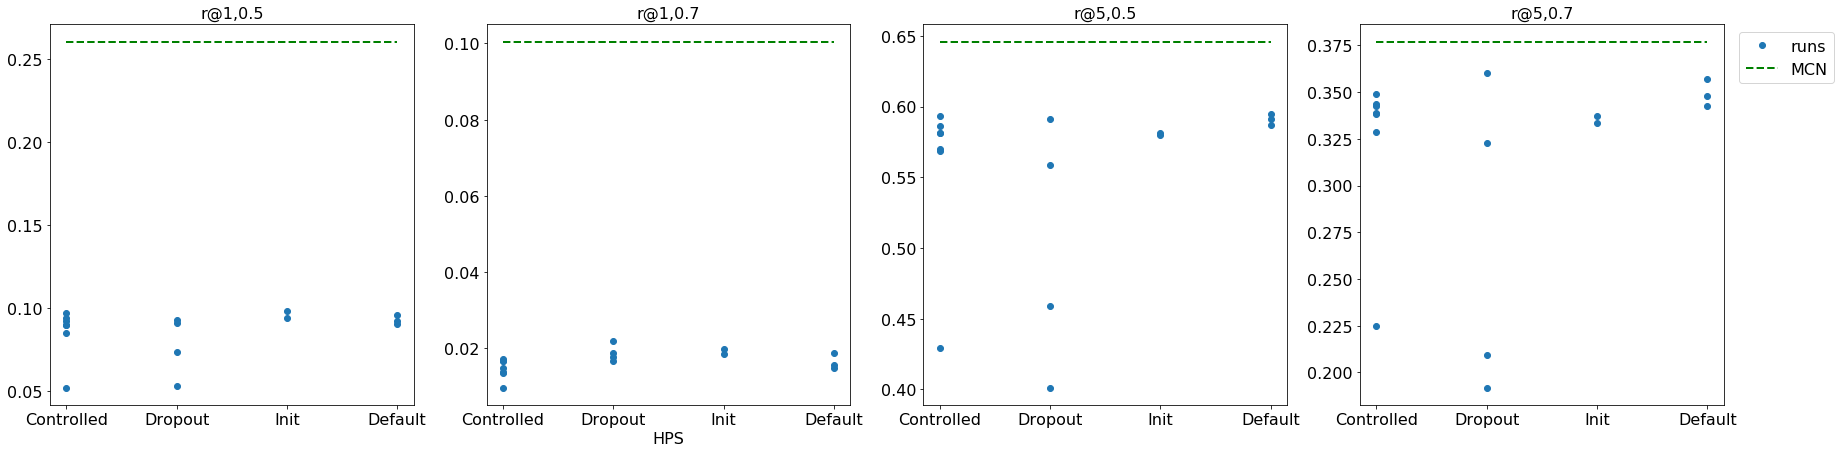

In [1]:
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
EXPERIMENT_TITLE = 'HPS'
SUBSET = 'test'
metric_ref = {
    'MCN': {'r@1,0.5': .2606, 'r@1,0.7': .1005, 'r@5,0.5': .6459, 'r@5,0.7': .3770, 'color': 'green', 'subset': 'test'},
}

import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Unsuccessful trials
# train/val-01
# ('HPS-1', 'workers/ibex-fscratch/data/interim/smcn_27/f/*.json'),
# ('HPS-2', 'workers/ibex-fscratch/data/interim/smcn_27/j/*.json'),
# ('HPS-3', 'workers/ibex-fscratch/data/interim/smcn_27/k/*.json'),
# ('Default', 'workers/marla/data/interim/smcn_27/g/*.json'),

dfs = []
for name, wildcard in [
    # train-test
    ('Controlled', 'workers/marla/data/interim/smcn_27/debug/*.json'),
    ('Dropout', 'workers/skynet/data/interim/smcn_27/b1/*.json'),
    ('Init', 'workers/skynet/data/interim/smcn_27/b2/*.json'),
    ('Default', 'workers/marla/data/interim/smcn_27/b/*.json')]:
    df = jsons_to_dataframe(wildcard)
    df['backbone'] = name
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df, subset=[SUBSET])
ind = df_.loc[:, 'subset'] == SUBSET
# ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[ind, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 4, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
backones = df.loc[ind, 'backbone'].unique()[[0, -1]]
for i, metric in enumerate(METRICS):
    ax[i].plot(df_.loc[ind, 'backbone'],
               df_.loc[ind, metric],
               'o')
    for j in metric_ref:
        ref_i = metric_ref[j][metric]
        ax[i].plot(backones, [ref_i, ref_i], '--', color=metric_ref[j]['color'], lw=2, label=j)
    ax[i].title.set_text(metric)
    ax[i].title.set_size(fontsize)
    ax[i].xaxis.label.set_size(fontsize)
    ax[i].tick_params(labelsize=fontsize)
    if i == 1:
        ax[i].xaxis.label.set_text(EXPERIMENT_TITLE)
    if i == 3:
        ax[i].legend(['runs'] + list(metric_ref.keys()),
                     fontsize=fontsize,
                     bbox_to_anchor=[1.02, 1.0])
# fig.savefig('tasmcn_hsp.pdf', bbox_inches='tight')

In [2]:
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
EXPERIMENT_TITLE = 'HPS'
SUBSET = 'test'
metric_ref = {
    'MFP': {'r@1,0.5': .1946, 'r@1,0.7': .879, 'r@5,0.5': .6261, 'r@5,0.7': .4108, 'color': 'green', 'subset': 'test'},
}

import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df_ref = jsons_to_dataframe('workers/marla/data/interim/smcn_27/g/*.json')
df = jsons_to_dataframe('workers/ibex-fscratch/data/interim/smcn_27/f/*.json')
ind = np.ones(len(df))
ref_ = []
for i in METRICS:
    ref = df_ref.loc[:, f'{SUBSET}_{i}'].mean()
    ind_i = df.loc[:, f'{SUBSET}_{i}'] > ref
    ind = np.logical_and(ind, ind_i)
    ref_.append(ref)
    
param = [
    'original_setup',
    'proposals_in_train',
    'negative_sampling_iou',
    'lr',
    'margin',
    'w_intra',
    'epochs',
    'dropout',
    'visual_layers',
    'visual_hidden',
    'embedding_size'
]
metrics_ = [f'{SUBSET}_{i}' for i in METRICS]
display(df.loc[ind, param + metrics_])
print(ref_)

,original_setup,proposals_in_train,negative_sampling_iou,lr,margin,w_intra,epochs,dropout,visual_layers,visual_hidden,embedding_size,"test_r@1,0.5","test_r@1,0.7","test_r@5,0.5","test_r@5,0.7"
64,False,False,0.50,0.05,0.20,0.2,108,0.3,1,500,100,0.083758,0.012102,0.561465,0.308280
85,True,True,0.35,0.01,0.15,0.8,64,0.3,1,500,100,0.078025,0.009873,0.560510,0.321656
120,False,True,0.35,0.01,0.15,0.5,64,0.5,1,256,256,0.081529,0.010191,0.560191,0.313376
129,False,True,0.35,0.01,0.15,0.5,32,0.3,1,500,100,0.082166,0.010510,0.561146,0.322293
130,True,False,0.65,0.01,0.10,0.5,64,0.3,1,500,100,0.080892,0.009554,0.557962,0.320382
186,True,False,0.35,0.01,0.15,0.2,64,0.3,1,500,100,0.079618,0.010510,0.557325,0.326752
194,True,True,0.35,0.01,0.15,0.8,64,0.3,1,500,100,0.078981,0.009554,0.559873,0.318153
212,False,True,0.50,0.01,0.20,0.8,32,0.3,1,500,100,0.078662,0.010191,0.556688,0.311146
222,False,True,0.65,0.01,0.20,0.5,108,0.3,2,256,256,0.084076,0.011146,0.555096,0.310191
292,True,True,0.50,0.01,0.20,0.8,32,0.3,1,500,100,0.078981,0.010828,0.561783,0.314650


[0.07781316348195329, 0.009235668789808917, 0.5538216560509555, 0.3081740976645435]


### 27 SMCN fix?

/home/escorciav/install/bin/miniconda3/envs/moments-retrieval-devel/lib/python3.6/site-packages/pandas/plotting/_core.py:2257: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


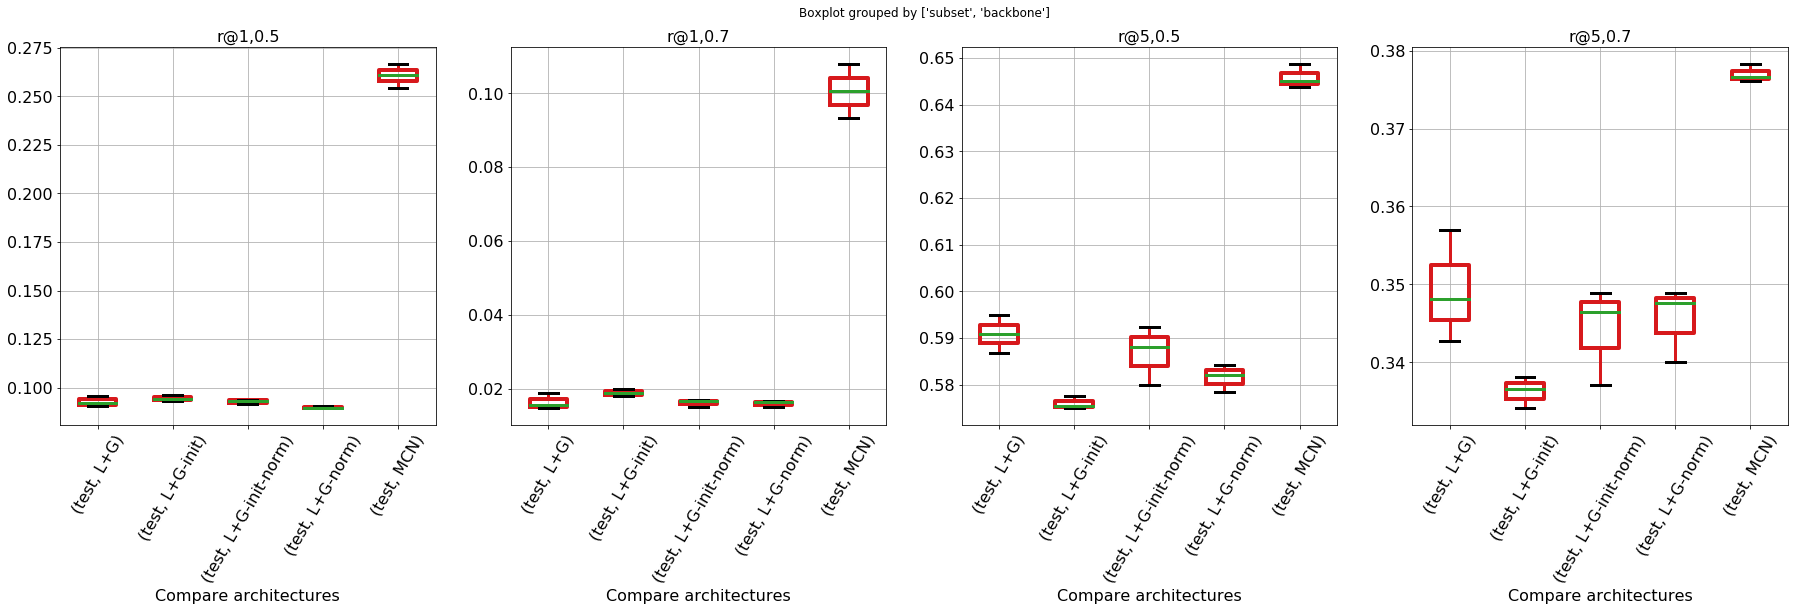

In [3]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare architectures'
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
FAKE_REPETITIONS = 5
SUBSET = 'test'

metric_ref = {
    # 'MCN': {'r@1,0.5': .2606, 'r@1,0.7': .1005, 'r@5,0.5': .6459, 'r@5,0.7': .3770, 'color': 'green', 'subset': 'test'},
    # 'MFP': {'r@1,0.5': .1946, 'r@1,0.7': .879, 'r@5,0.5': .6261, 'r@5,0.7': .4108, 'color': 'green', 'subset': 'test'},
}

dfs = []
for backbone, i in [
        ('L+G', 'workers/marla/data/interim/smcn_27/b'),
        ('L+G-norm', 'workers/tyler/data/interim/smcn_27/h'),
        ('L+G-init', 'workers/tyler/data/interim/smcn_27/i'),
        ('L+G-init-norm', 'workers/marla/data/interim/smcn_27/j'),
        ('MCN', 'workers/marla/data/interim/mcn_20/b'),
    ]:
    df = jsons_to_dataframe(f'{i}/*.json')
    df['backbone'] = backbone
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subsets=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subsets, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subsets):
            ind1 = j * len(subset_and_metrics) // len(subsets)
            ind2 = ind1 + len(subset_and_metrics) // len(subsets)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df, [SUBSET])
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, len(METRICS), figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=METRICS, by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
# fig.savefig('/home/escorciav/Downloads/adobe-prj/anet_smcn-mcn-sota.pdf', bbox_inches='tight')

## 20. MCN

Last update: Nov 6 - Created: Nov 6

_conclusions_:


_scope_: impact of unit vectors in MCN@Charades-STA.

- model: MCN.

- Please take a look at the README and JSON files for more details.

### 20 MCN impact unit vectors

/home/escorciav/install/bin/miniconda3/envs/moments-retrieval-devel/lib/python3.6/site-packages/pandas/plotting/_core.py:2257: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


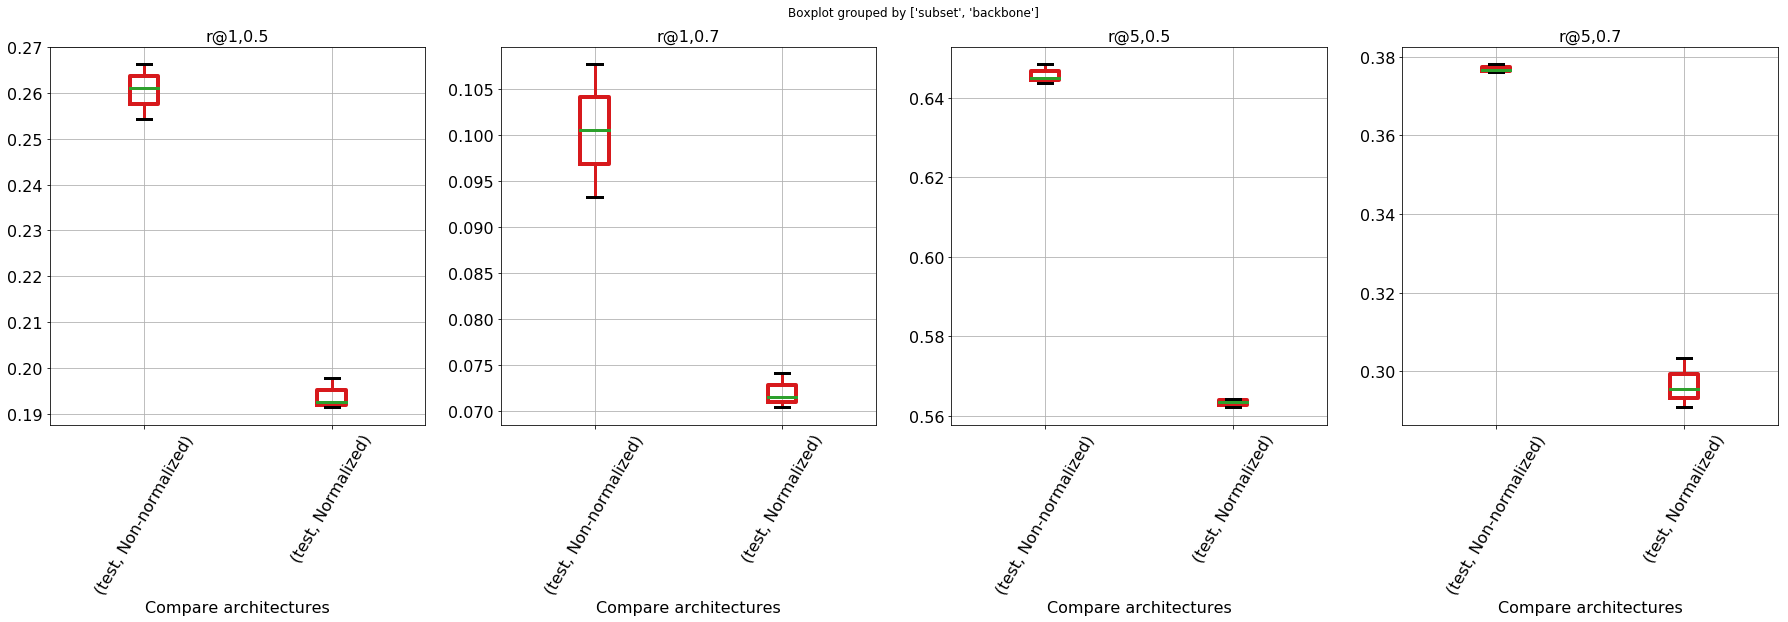

In [2]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare architectures'
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
FAKE_REPETITIONS = 5
SUBSET = 'test'

metric_ref = {
}

dfs = []
for ind, i in enumerate(['mcn_20/b', 'mcn_20/e']):
    df = jsons_to_dataframe(f'workers/marla/data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'Non-normalized'
    elif ind == 1:
        df['backbone'] = 'Normalized'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subsets=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subsets, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subsets):
            ind1 = j * len(subset_and_metrics) // len(subsets)
            ind2 = ind1 + len(subset_and_metrics) // len(subsets)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df, [SUBSET])
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, len(METRICS), figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=METRICS, by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
# fig.savefig('/home/escorciav/Downloads/adobe-prj/anet_smcn-mcn-sota.pdf', bbox_inches='tight')

### 20 MCN unit vectors table

In [3]:
from utils import jsons_to_dataframe
import os
METRICS = ['iou', 'r@1', 'r@5', 'r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
SUBSET = 'test'

for exp_ref, i in [
    ('L+G-normalized', 'workers/marla/data/interim/mcn_20/e'),
    ('L+G', 'workers/marla/data/interim/mcn_20/b'),
    ]:
    if not os.path.exists(i):
        continue
    basename = os.path.basename(i)
    if 'mcn' not in basename:
        basename = os.path.basename(os.path.dirname(i))
    
    df = jsons_to_dataframe(f'{i}/*.json')
    if len(df) < 3:
        continue
    
    print(basename, exp_ref)
    for j in METRICS:
        col = f'{SUBSET}_{j}'
        if col in df.columns:
            result = df.loc[:, col]
        else:
            continue
        print(col, f'{result.mean():.4f} +- {result.std():.4f}')

mcn_20 L+G-normalized
test_r@1,0.5 0.1939 +- 0.0035
test_r@1,0.7 0.0720 +- 0.0019
test_r@5,0.5 0.5633 +- 0.0011
test_r@5,0.7 0.2966 +- 0.0064
mcn_20 L+G
test_r@1,0.5 0.2606 +- 0.0061
test_r@1,0.7 0.1005 +- 0.0073
test_r@5,0.5 0.6459 +- 0.0025
test_r@5,0.7 0.3770 +- 0.0011


## 23. SMCN

Last update: Nov 3 - Created: Nov 3

_conclusions_:

- SMCN achieves significantly better results than those from [ACRN](https://www.comp.nus.edu.sg/~xiangnan/papers/sigir18-video-retrieval.pdf).

- SMCN procudes achieves similar results to MCN. The only case where its results seems statistically different is for R@5,0.5. However, the situation switches R@5,0.7. One possible explanation (not validated) is that R@5,0.5 may be too flexible in this dataset. _TODO_ compute IOU accross all triads of annotators.

- Decomposing the loss function in terms of similarity per clip does not affect the performance.

_scope_: consolidate results of MCN re-implementation in DiDeMo.

- model: MCN using untrimmed setup.

- training scheme: only DiDeMo training videos.

- features: ResNet152 pre-trained on [ILSVCR-2012](http://www.image-net.org/challenges/LSVRC/2012/) for object classification.

- Please take a look at the README and JSON files for more details.

### 23 SMCN comparison wrt others

comparison wrt ACRN using the R@k,IoU metric

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare architectures'
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
FAKE_REPETITIONS = 5
SUBSET = 'test'

metric_ref = {
    'ACRN': {'r@1,0.5': 0.2744, 'r@1,0.7': 0.1665, 'r@5,0.5': 0.6943, 'r@5,0.7': 0.2945, 'color': 'orange', 'subset': 'test'},
}

dfs = []
for ind, i in enumerate(['smcn_23/a']):
    df = jsons_to_dataframe(f'workers/ibex-fscratch/data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'MCN'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subsets=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subsets, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subsets):
            ind1 = j * len(subset_and_metrics) // len(subsets)
            ind2 = ind1 + len(subset_and_metrics) // len(subsets)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df, [SUBSET])
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, len(METRICS), figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=METRICS, by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
# fig.savefig('/home/escorciav/Downloads/adobe-prj/anet_smcn-mcn-sota.pdf', bbox_inches='tight')

### 23 SMCN comparison wrt MCN

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare architectures'
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
FAKE_REPETITIONS = 5
SUBSET = 'test'

metric_ref = {
#     'ACRN': {'r@1,0.5': 0.2744, 'r@1,0.7': 0.1665, 'r@5,0.5': 0.6943, 'r@5,0.7': 0.2945, 'color': 'orange', 'subset': 'test'},
}

dfs = []
for ind, i in enumerate(['mcn_17/a', 'smcn_23/a', 'smcn_23/b', 'mcn_17/b']):
    df = jsons_to_dataframe(f'workers/ibex-fscratch/data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'MCN (L+G+TEF)'
    elif ind == 1:
        df['backbone'] = 'SMCN (L+G+TEF)'
    elif ind == 2:
        df['backbone'] = 'SMCN (L+G)'
    elif ind == 3:
        df['backbone'] = 'MCN (L+G)'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subsets=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subsets, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subsets):
            ind1 = j * len(subset_and_metrics) // len(subsets)
            ind2 = ind1 + len(subset_and_metrics) // len(subsets)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df, [SUBSET])
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, len(METRICS), figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=METRICS, by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
# fig.savefig('/home/escorciav/Downloads/adobe-prj/anet_smcn-mcn-sota.pdf', bbox_inches='tight')

### 23 SMCN table all results didemo

In [1]:
from utils import jsons_to_dataframe
import os
METRICS = ['r@1', 'r@5', 'iou', 'r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
#METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
SUBSET = 'test'

for exp_ref, i in [
    ('MCN-VGG', 'workers/ibex-fscratch/data/interim/mcn_18/b'),
    ('MCN-ResNet', 'workers/ibex-fscratch/data/interim/mcn_17/b'),
    ('SMCN-VGG', 'workers/ibex-fscratch/data/interim/smcn_24/b'),
    ('SMCN-ResNet', 'workers/ibex-fscratch/data/interim/smcn_23/b'),
    ('MCN-VGG (TEF)', 'workers/ibex-fscratch/data/interim/mcn_18/a'),
    ('MCN-ResNet (TEF)', 'workers/ibex-fscratch/data/interim/mcn_17/a'),
    ('SMCN-VGG (TEF)', 'workers/ibex-fscratch/data/interim/smcn_24/a'),
    ('SMCN-ResNet (TEF)', 'workers/ibex-fscratch/data/interim/smcn_23/a'),
    ('MCN (TEF)', 'workers/ibex-fscratch/data/interim/mcn_17/d'),
    ]:
    if not os.path.exists(i):
        continue
    basename = os.path.basename(i)
    if 'mcn' not in basename:
        basename = os.path.basename(os.path.dirname(i))
    
    df = jsons_to_dataframe(f'{i}/*.json')
    if len(df) < 3:
        continue
    
    print(basename, exp_ref)
    for j in METRICS:
        col = f'{SUBSET}_{j}'
        if col in df.columns:
            result = df.loc[:, col]
        else:
            continue
        print(col, f'{result.mean():.4f} +- {result.std():.4f}')

/home/escorciav/install/bin/miniconda3/envs/moments-retrieval-devel/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


mcn_18 MCN-VGG
test_r@1 0.1320 +- 0.0056
test_r@5 0.4593 +- 0.0037
test_iou 0.2517 +- 0.0062
test_r@1,0.5 0.2701 +- 0.0077
test_r@1,0.7 0.1651 +- 0.0059
test_r@5,0.5 0.6455 +- 0.0080
test_r@5,0.7 0.4665 +- 0.0061
mcn_17 MCN-ResNet
test_r@1 0.1633 +- 0.0036
test_r@5 0.5508 +- 0.0043
test_iou 0.2855 +- 0.0048
test_r@1,0.5 0.3090 +- 0.0065
test_r@1,0.7 0.2082 +- 0.0045
test_r@5,0.5 0.7159 +- 0.0039
test_r@5,0.7 0.5565 +- 0.0040
smcn_24 SMCN-VGG
test_r@1 0.1962 +- 0.0046
test_r@5 0.5055 +- 0.0047
test_iou 0.3192 +- 0.0050
test_r@1,0.5 0.3421 +- 0.0052
test_r@1,0.7 0.2430 +- 0.0039
test_r@5,0.5 0.6912 +- 0.0056
test_r@5,0.7 0.5167 +- 0.0049
smcn_23 SMCN-ResNet
test_r@1 0.2162 +- 0.0008
test_r@5 0.5621 +- 0.0069
test_iou 0.3462 +- 0.0018
test_r@1,0.5 0.3772 +- 0.0031
test_r@1,0.7 0.2689 +- 0.0014
test_r@5,0.5 0.7349 +- 0.0065
test_r@5,0.7 0.5730 +- 0.0067
mcn_18 MCN-VGG (TEF)
test_r@1 0.2254 +- 0.0034
test_r@5 0.7393 +- 0.0039
test_iou 0.3411 +- 0.0033
test_r@1,0.5 0.3686 +- 0.0050
test_r@1,

In [2]:
from utils import jsons_to_dataframe
import os
METRICS = ['r@1', 'r@5', 'iou']
#METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
SUBSET = 'val'

for exp_ref, i in [
    ('MCN-VGG', 'workers/ibex-fscratch/data/interim/mcn_18/b'),
    ('MCN-VGG (TEF)', 'workers/ibex-fscratch/data/interim/mcn_18/a'),
    ('MCN-ResNet', 'workers/ibex-fscratch/data/interim/mcn_17/b'),
    ('MCN-ResNet (TEF)', 'workers/ibex-fscratch/data/interim/mcn_17/a'),
    ('SMCN-VGG', 'workers/ibex-fscratch/data/interim/smcn_24/b'),
    ('SMCN-VGG (TEF)', 'workers/ibex-fscratch/data/interim/smcn_24/a'),
    ('SMCN-ResNet', 'workers/ibex-fscratch/data/interim/smcn_23/b'),
    ('SMCN-ResNet (TEF)', 'workers/ibex-fscratch/data/interim/smcn_23/a'),
    ('MCN (TEF)', 'workers/ibex-fscratch/data/interim/mcn_17/d'),
    ]:
    if not os.path.exists(i):
        print(f'Skip {exp_ref}')
        continue
    basename = os.path.basename(i)
    if 'mcn' not in basename:
        basename = os.path.basename(os.path.dirname(i))
    
    df = jsons_to_dataframe(f'{i}/*.json')
    if len(df) < 3:
        print(f'Skip {exp_ref}')
        continue
    
    print(basename, exp_ref)
    for j in METRICS:
        col = f'{SUBSET}_{j}'
        if col in df.columns:
            result = df.loc[:, col]
        else:
            continue
        print(col, f'{result.mean()*100:.2f} +- {result.std()*100:.2f}')

mcn_18 MCN-VGG
val_r@1 12.53 +- 0.08
val_r@5 46.11 +- 0.43
val_iou 24.39 +- 0.13
mcn_18 MCN-VGG (TEF)
val_r@1 24.19 +- 0.61
val_r@5 75.74 +- 0.23
val_iou 36.49 +- 0.62
mcn_17 MCN-ResNet
val_r@1 15.44 +- 0.19
val_r@5 54.48 +- 0.56
val_iou 27.17 +- 0.23
mcn_17 MCN-ResNet (TEF)
val_r@1 26.02 +- 0.33
val_r@5 79.52 +- 0.19
val_iou 39.04 +- 0.32
smcn_24 SMCN-VGG
val_r@1 20.93 +- 0.28
val_r@5 53.82 +- 0.12
val_iou 33.59 +- 0.03
smcn_24 SMCN-VGG (TEF)
val_r@1 23.44 +- 0.25
val_r@5 76.43 +- 0.21
val_iou 35.57 +- 0.07
smcn_23 SMCN-ResNet
val_r@1 22.63 +- 0.30
val_r@5 58.60 +- 0.13
val_iou 36.56 +- 0.33
smcn_23 SMCN-ResNet (TEF)
val_r@1 25.77 +- 0.74
val_r@5 79.95 +- 0.26
val_iou 38.83 +- 0.91
mcn_17 MCN (TEF)


### 23 SMCN comparison visual features

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare architectures'
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
FAKE_REPETITIONS = 5
SUBSET = 'val'

metric_ref = {
#     'ACRN': {'r@1,0.5': 0.2744, 'r@1,0.7': 0.1665, 'r@5,0.5': 0.6943, 'r@5,0.7': 0.2945, 'color': 'orange', 'subset': 'test'},
}

dfs = []
for ind, i in enumerate(['smcn_23/a', 'smcn_24/a', 'smcn_25/a', 'smcn_28/a']):
    df = jsons_to_dataframe(f'workers/ibex-fscratch/data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'ResNet'
    elif ind == 1:
        df['backbone'] = 'VGG'
    elif ind == 2:
        df['backbone'] = 'Inception-Flow'
    elif ind == 3:
        df['backbone'] = 'I3D'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subsets=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subsets, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subsets):
            ind1 = j * len(subset_and_metrics) // len(subsets)
            ind2 = ind1 + len(subset_and_metrics) // len(subsets)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df, [SUBSET])
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, len(METRICS), figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=METRICS, by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
# fig.savefig('/home/escorciav/Downloads/adobe-prj/anet_smcn-mcn-sota.pdf', bbox_inches='tight')

#### 23 SMCN table visual features

In [ ]:
from utils import jsons_to_dataframe
import os
METRICS = ['iou', 'r@1', 'r@5', 'r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
SUBSET = 'val'

for exp_ref, i in [
    ('ResNet152 (TEF)', 'workers/ibex-fscratch/data/interim/smcn_23/a'),
    ('VGG (TEF)', 'workers/ibex-fscratch/data/interim/smcn_24/a'),
    ('Flow (TEF)', 'workers/ibex-fscratch/data/interim/smcn_25/a'),
    ('I3D (TEF)', 'workers/marla/data/interim/smcn_28/a'),
    ('ResNet152', 'workers/ibex-fscratch/data/interim/smcn_23/b'),
    ('VGG', 'workers/ibex-fscratch/data/interim/smcn_24/b'),
    ('Flow', 'workers/ibex-fscratch/data/interim/smcn_25/b'),
    ('I3D', 'workers/marla/data/interim/smcn_28/b'),
    ]:
    if not os.path.exists(i):
        continue
    basename = os.path.basename(i)
    if 'mcn' not in basename:
        basename = os.path.basename(os.path.dirname(i))
    
    df = jsons_to_dataframe(f'{i}/*.json')
    if len(df) < 3:
        continue
    
    print(basename, exp_ref)
    for j in METRICS:
        col = f'{SUBSET}_{j}'
        if col in df.columns:
            result = df.loc[:, col]
        else:
            continue
        print(col, f'{result.mean():.4f} +- {result.std():.4f}')

### 23 SMCN comparison word vectors

/home/escorciav/install/bin/miniconda3/envs/moments-retrieval-devel/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/escorciav/install/bin/miniconda3/envs/moments-retrieval-devel/lib/python3.6/site-packages/pandas/plotting/_core.py:2257: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


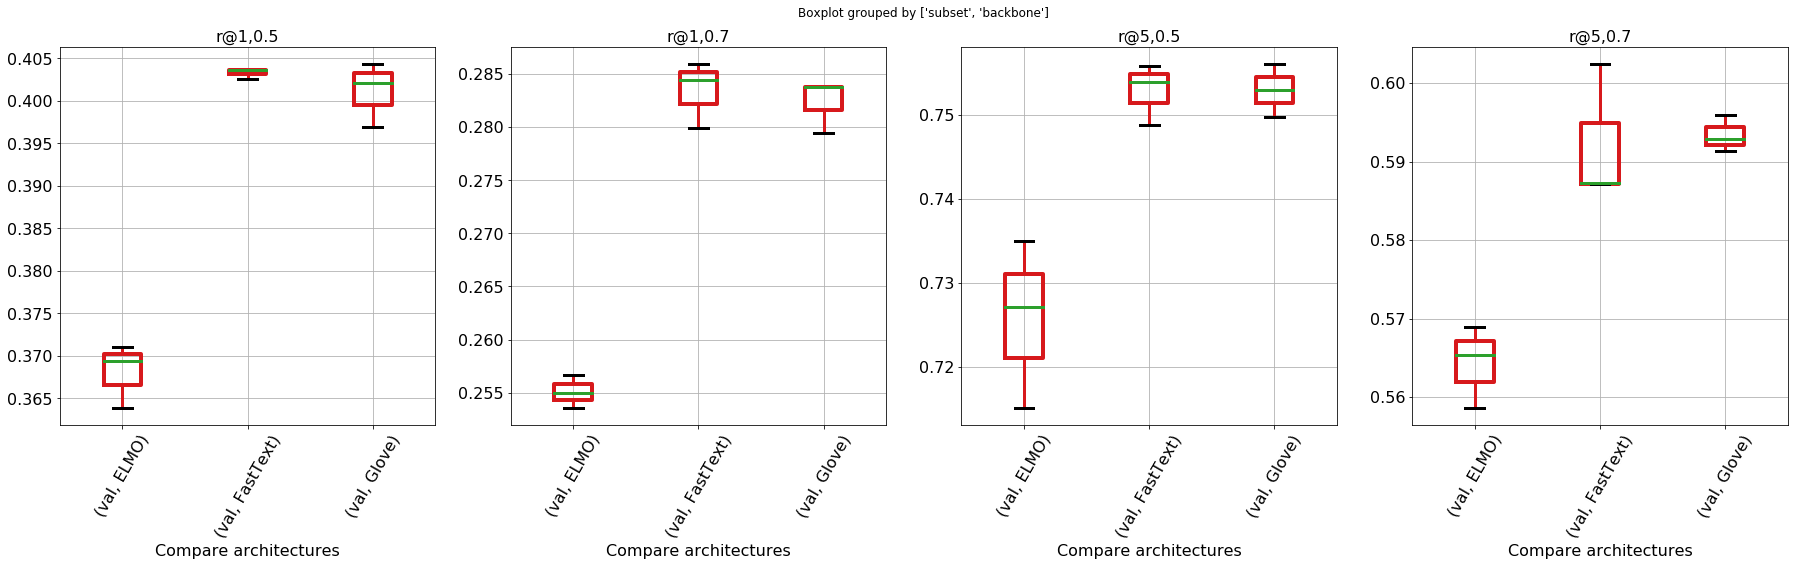

In [1]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare architectures'
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
FAKE_REPETITIONS = 5
SUBSET = 'val'

metric_ref = {
#     'ACRN': {'r@1,0.5': 0.2744, 'r@1,0.7': 0.1665, 'r@5,0.5': 0.6943, 'r@5,0.7': 0.2945, 'color': 'orange', 'subset': 'test'},
}

dfs = []
for ind, i in enumerate(
        ['workers/ibex-fscratch/data/interim/smcn_23/b/*.json',
         'workers/marla/data/interim/smcn_30/b/*.json',
         'workers/marla/data/interim/smcn_29/b/*.json',
        ]):
    df = jsons_to_dataframe(i)
    if ind == 0:
        df['backbone'] = 'Glove'
    elif ind == 1:
        df['backbone'] = 'FastText'
    elif ind == 2:
        df['backbone'] = 'ELMo'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subsets=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subsets, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subsets):
            ind1 = j * len(subset_and_metrics) // len(subsets)
            ind2 = ind1 + len(subset_and_metrics) // len(subsets)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df, [SUBSET])
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, len(METRICS), figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=METRICS, by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
# fig.savefig('/home/escorciav/Downloads/adobe-prj/anet_smcn-mcn-sota.pdf', bbox_inches='tight')

#### 23 SMCN table word vectors

In [1]:
from utils import jsons_to_dataframe
import os
METRICS = ['iou', 'r@1', 'r@5', 'r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
SUBSET = 'val'

for exp_ref, i in [
    ('GloVe (TEF)', 'workers/ibex-fscratch/data/interim/smcn_23/a'),
    ('FastText (TEF)', 'workers/marla/data/interim/smcn_30/a'),
    ('ELMo (TEF)', 'workers/marla/data/interim/smcn_29/a'),
    ('GloVe', 'workers/ibex-fscratch/data/interim/smcn_23/b'),
    ('FastText', 'workers/marla/data/interim/smcn_30/b'),
    ('ELMo', 'workers/marla/data/interim/smcn_29/b'),
    ]:
    if not os.path.exists(i):
        continue
    basename = os.path.basename(i)
    if 'mcn' not in basename:
        basename = os.path.basename(os.path.dirname(i))
    
    df = jsons_to_dataframe(f'{i}/*.json')
    if len(df) < 3:
        continue
    
    print(basename, exp_ref)
    for j in METRICS:
        col = f'{SUBSET}_{j}'
        if col in df.columns:
            result = df.loc[:, col]
        else:
            continue
        print(col, f'{result.mean():.4f} +- {result.std():.4f}')

/home/escorciav/install/bin/miniconda3/envs/moments-retrieval-devel/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


smcn_23 GloVe (TEF)
val_iou 0.3883 +- 0.0091
val_r@1 0.2577 +- 0.0074
val_r@5 0.7995 +- 0.0026
val_r@1,0.5 0.4230 +- 0.0080
val_r@1,0.7 0.3128 +- 0.0098
val_r@5,0.5 0.9026 +- 0.0013
val_r@5,0.7 0.7913 +- 0.0003
smcn_30 FastText (TEF)
val_r@1,0.5 0.4213 +- 0.0016
val_r@1,0.7 0.3103 +- 0.0020
val_r@5,0.5 0.9056 +- 0.0014
val_r@5,0.7 0.7905 +- 0.0035
skip
smcn_23 GloVe
val_iou 0.3656 +- 0.0033
val_r@1 0.2263 +- 0.0030
val_r@5 0.5860 +- 0.0013
val_r@1,0.5 0.4011 +- 0.0038
val_r@1,0.7 0.2823 +- 0.0025
val_r@5,0.5 0.7529 +- 0.0031
val_r@5,0.7 0.5934 +- 0.0023
smcn_30 FastText
val_r@1,0.5 0.4033 +- 0.0006
val_r@1,0.7 0.2834 +- 0.0031
val_r@5,0.5 0.7528 +- 0.0036
val_r@5,0.7 0.5923 +- 0.0088
smcn_29 ELMo
val_r@1,0.5 0.3681 +- 0.0038
val_r@1,0.7 0.2551 +- 0.0016
val_r@5,0.5 0.7257 +- 0.0100
val_r@5,0.7 0.5643 +- 0.0052


### 23 SMCN augmenting number of clips

- MCN vs SMCN local

- Didemo removing moments with a single clip

In [4]:
from utils import jsons_to_dataframe
import os
METRICS = ['iou', 'r@1', 'r@5', 'r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
SUBSET = 'test'

# 'CTRL-ICCV17': {'r@1,0.5': 0.2142, 'r@1,0.7': 0.0715, 'r@5,0.5': 0.5911, 'r@5,0.7': 0.2691, 'color': 'orange', 'subset': 'test'},

for exp_ref, i in [
    ('MCN-ResNet', 'workers/skynet/data/interim/mcn_17/e'),
    ('SMCN-ResNet', 'workers/skynet/data/interim/smcn_23/f'),
    ]:
    if not os.path.exists(i):
        continue
    basename = os.path.basename(i)
    if 'mcn' not in basename:
        basename = os.path.basename(os.path.dirname(i))
    
    df = jsons_to_dataframe(f'{i}/*.json')
    if len(df) < 3:
        continue
    
    print(basename, exp_ref)
    for j in METRICS:
        col = f'{SUBSET}_{j}'
        if col in df.columns:
            result = df.loc[:, col]
        else:
            continue
        print(col, f'{result.mean():.4f} +- {result.std():.4f}')

mcn_17 MCN-ResNet
test_r@1,0.5 0.4538 +- 0.0032
test_r@1,0.7 0.1064 +- 0.0013
test_r@5,0.5 0.7901 +- 0.0067
test_r@5,0.7 0.4708 +- 0.0037
smcn_23 SMCN-ResNet
test_r@1,0.5 0.4379 +- 0.0082
test_r@1,0.7 0.0000 +- 0.0000
test_r@5,0.5 0.7961 +- 0.0037
test_r@5,0.7 0.5299 +- 0.0015


## 18. MCN

Last update: Nov 3 - Created: Nov 3

_conclusions_:

- our re-implementation of MCN achieves significantly better results than those from [ACRN](https://www.comp.nus.edu.sg/~xiangnan/papers/sigir18-video-retrieval.pdf).

- Moreover, it outperforms their model with the metrics by a significant margin.

- ResNet152 achieves better results over all R@k,IoU metrics. Around +3%.

_scope_: consolidate results of MCN re-implementation in DiDeMo.

- model: MCN using untrimmed setup.

- training scheme: only DiDeMo training videos.

- features: vgg-16 pre-trained on [ILSVCR-2012](http://www.image-net.org/challenges/LSVRC/2012/) for object classification.

- Please take a look at the README and JSON files for more details.

### 18 MCN comparison wrt others

Fair comparison wrt ACRN using the R@k,IoU metric

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare architectures'
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
FAKE_REPETITIONS = 5
SUBSET = 'test'

metric_ref = {
    'ACRN': {'r@1,0.5': 0.2744, 'r@1,0.7': 0.1665, 'r@5,0.5': 0.6943, 'r@5,0.7': 0.2945, 'color': 'orange', 'subset': 'test'},
}

dfs = []
for ind, i in enumerate(['mcn_18/a']):
    df = jsons_to_dataframe(f'workers/ibex-fscratch/data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'MCN'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subsets=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subsets, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subsets):
            ind1 = j * len(subset_and_metrics) // len(subsets)
            ind2 = ind1 + len(subset_and_metrics) // len(subsets)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df, [SUBSET])
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, len(METRICS), figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=METRICS, by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
# fig.savefig('/home/escorciav/Downloads/adobe-prj/anet_smcn-mcn-sota.pdf', bbox_inches='tight')

### 18 MCN comparison wrt us

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare architectures'
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
FAKE_REPETITIONS = 5
SUBSET = 'val'

metric_ref = {
#     'ACRN': {'r@1,0.5': 0.2744, 'r@1,0.7': 0.1665, 'r@5,0.5': 0.6943, 'r@5,0.7': 0.2945, 'color': 'orange', 'subset': 'test'},
}

dfs = []
for ind, i in enumerate(['mcn_18/a', 'mcn_17/a']):
    df = jsons_to_dataframe(f'workers/ibex-fscratch/data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'MCN-VGG16'
    elif ind == 1:
        df['backbone'] = 'MCN-R152'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subsets=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subsets, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subsets):
            ind1 = j * len(subset_and_metrics) // len(subsets)
            ind2 = ind1 + len(subset_and_metrics) // len(subsets)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df, [SUBSET])
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, len(METRICS), figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=METRICS, by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
# fig.savefig('/home/escorciav/Downloads/adobe-prj/anet_smcn-mcn-sota.pdf', bbox_inches='tight')

### 18 MCN reproducible

Making sure we get results on par with those of the discrete setup

In [ ]:
from utils import jsons_to_dataframe
import os
METRICS = ['iou', 'r@1', 'r@5']
SUBSET = 'test'

for wildcard in [
    'data/interim/mcn_14/a_replica/*.json.BAK1',
    'workers/ibex-fscratch/data/interim/mcn_18/a/*.json',
    ]:
    dirname = os.path.dirname(wildcard)
    basename = os.path.basename(dirname)
    if 'mcn' not in basename:
        basename = os.path.basename(os.path.dirname(dirname))
    print(basename)
    df = jsons_to_dataframe(wildcard)
    for j in METRICS:
        col = f'{SUBSET}_{j}'
        result = df.loc[:, col]
        print(col, f'{result.mean():.4f} +- {result.std():.4f}')

if SUBSET == 'test':
    print('MCN@Bryan')
    print('test_iou: 0.3413 +/- 0.0040')
    print('test_r@1: 0.2259 +/- 0.0037')
    print('test_r@5: 0.7340 +/- 0.0067')

## 17. MCN

Last update: Nov 3 - Created: Nov 3

_conclusions_:

- Our MCN implementation achieves much better results than ACRN.

_scope_: MCN using untrimmed setup in DiDeMo

- model: SMCN (local+global+tef) and its variants (_TODO_ local, local+global)

- training scheme: only DiDeMo training videos.

- features: rgb max resnet152 pre-trained on imagenet for classification. TEF. Global context.

- hp: Almost as Lisa with higher momentum. Inherited from [MCN hps experiment](#006.-MCN-pytorch).

model: intra+intra rgb

### 17 MCN bottom line

Using the R@k,IoU metric

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare architectures'
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
FAKE_REPETITIONS = 5
SUBSET = 'test'

metric_ref = {
    'ACRN': {'r@1,0.5': 0.2744, 'r@1,0.7': 0.1665, 'r@5,0.5': 0.6943, 'r@5,0.7': 0.2945, 'color': 'orange', 'subset': 'test'},
}

dfs = []
for ind, i in enumerate(['mcn_17/a']):
    df = jsons_to_dataframe(f'workers/ibex-fscratch/data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'MCN'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subsets=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subsets, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subsets):
            ind1 = j * len(subset_and_metrics) // len(subsets)
            ind2 = ind1 + len(subset_and_metrics) // len(subsets)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df, [SUBSET])
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, len(METRICS), figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=METRICS, by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
# fig.savefig('/home/escorciav/Downloads/adobe-prj/anet_smcn-mcn-sota.pdf', bbox_inches='tight')

### 17 MCN results for table


In [ ]:
from utils import jsons_to_dataframe
import os
METRICS = ['iou', 'r@1', 'r@5', 'r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
SUBSET = 'test'

for i in ['workers/ibex-fscratch/data/interim/mcn_17/a',
         ]:
    basename = os.path.basename(i)
    if 'mcn' not in basename:
        basename = os.path.basename(os.path.dirname(i))
    print(basename)
    df = jsons_to_dataframe(f'{i}/*.json')
    for j in METRICS:
        col = f'{SUBSET}_{j}'
        result = df.loc[:, col]
        print(col, f'{result.mean():.4f} +- {result.std():.4f}')

## 22. SMCN

Last update: Oct 20 - Created: Oct 19

_conclusions_:



_scope_: SMCN with default setup in ActivityNet-Captions

- model: SMCN (local+global+tef) and its variants (_TODO_ local, local+global)

- training scheme: only ActivityNet-Captions training videos.

- features: rgb resnet152 pre-trained on imagenet for classification. TEF. Global

- hp: Almost as Lisa with higher momentum. Inherited from [MCN hps experiment](#006.-MCN-pytorch).

model: intra+intra rgb

### 22 single video retrieval

bottom line

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare architectures'
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
FAKE_REPETITIONS = 5
SUBSET = 'test'

metric_ref = {
    'BU-ARXIV18': {'r@1,0.5': 0.277, 'r@1,0.7': 0.136, 'r@5,0.5': 0.592, 'r@5,0.7': 0.383, 'color': 'orange', 'subset': 'test'},
}

dfs = []
for ind, i in enumerate(['mcn_16/a', 'smcn_22/a']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'MCN'
    elif ind == 1:
        df['backbone'] = 'SMCN'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subsets=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subsets, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subsets):
            ind1 = j * len(subset_and_metrics) // len(subsets)
            ind2 = ind1 + len(subset_and_metrics) // len(subsets)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df, [SUBSET])
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, len(METRICS), figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=METRICS, by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
# fig.savefig('/home/escorciav/Downloads/adobe-prj/anet_smcn-mcn-sota.pdf', bbox_inches='tight')

### 22 ablation

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare architectures'
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
FAKE_REPETITIONS = 5
SUBSET = 'test'

metric_ref = {
    # This prior is tied to the search space in use
    'Moment Freq prior': {'r@1,0.5': 0.0674, 'r@1,0.7': 0.0143, 'r@5,0.5': 0.1555, 'r@5,0.7': 0.0452, 'color': 'red', 'subset': 'test'},
    'Random': {'r@1,0.5': 0.025, 'r@1,0.7': 0.08, 'r@5,0.5': 0.113, 'r@5,0.7': 0.04, 'color': 'red', 'subset': 'test'},
}

dfs = []
for ind, i in enumerate(['smcn_22/a', 'smcn_22/b', 'smcn_22/c']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'Loca+Global+TEF'
    elif ind == 1:
        df['backbone'] = 'Local+Global'
    elif ind == 2:
        df['backbone'] = 'Local'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subsets=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subsets, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subsets):
            ind1 = j * len(subset_and_metrics) // len(subsets)
            ind2 = ind1 + len(subset_and_metrics) // len(subsets)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df, [SUBSET])
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, len(METRICS), figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=METRICS, by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
# fig.savefig('/home/escorciav/Downloads/adobe-prj/anet_smcn-ablation.pdf', bbox_inches='tight')

## 16. MCN

Last update: Oct 20 - Created: Oct 19

_conclusions_:



_scope_: MCN with default setup in ActivityNet-Captions

- model: MCN (local+global+tef) and its variants (local, local+global)

- training scheme: only ActivityNet-Captions training videos.

- features: rgb resnet152 pre-trained on imagenet for classification. TEF. Global

- hp: Almost as Lisa with higher momentum. Inherited from [MCN hps experiment](#006.-MCN-pytorch).

model: intra+intra rgb

### 16 bottom line

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare architectures'
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
FAKE_REPETITIONS = 5
SUBSET = 'test'

metric_ref = {
    'BU-ARXIV18': {'r@1,0.5': 0.277, 'r@1,0.7': 0.136, 'r@5,0.5': 0.592, 'r@5,0.7': 0.383, 'color': 'orange', 'subset': 'test'},
}

dfs = []
for ind, i in enumerate(['mcn_16/a']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'MCN'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subsets=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subsets, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subsets):
            ind1 = j * len(subset_and_metrics) // len(subsets)
            ind2 = ind1 + len(subset_and_metrics) // len(subsets)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df, [SUBSET])
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, len(METRICS), figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=METRICS, by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('/home/escorciav/Downloads/wt-tef.pdf', bbox_inches='tight')

### 16 ablation analysis

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare architectures'
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
FAKE_REPETITIONS = 5
SUBSET = 'test'

metric_ref = {
    # 'Random': {'r@1,0.5': 0.025, 'r@1,0.7': 0.08, 'r@5,0.5': 0.113, 'r@5,0.7': 0.04, 'color': 'red', 'subset': 'test'},
    'C-MFP': {'r@1,0.5': 0.1302, 'r@1,0.7': 0.0640, 'r@5,0.5': 0.3616, 'r@5,0.7': 0.1778, 'color': 'red', 'subset': 'test'},
    # 'D-MFP': {'r@1,0.5': 0.0674, 'r@1,0.7': 0.0143, 'r@5,0.5': 0.1555, 'r@5,0.7': 0.0452, 'color': 'red', 'subset': 'test'},
#     'BU-ARXIV18': {'r@1,0.5': 0.277, 'r@1,0.7': 0.136, 'r@5,0.5': 0.592, 'r@5,0.7': 0.383, 'color': 'orange', 'subset': 'test'},
}

dfs = []
for ind, i in enumerate(['mcn_16/a', 'mcn_16/b', 'mcn_16/c', 'mcn_16/j']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'MCN (Local+Global+TEF)'
    elif ind == 1:
        df['backbone'] = 'MCN (Local+Global)'
    elif ind == 2:
        df['backbone'] = 'MCN (Local)'
    elif ind == 3:
        df['backbone'] = 'MCN (TEF)'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subsets=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subsets, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subsets):
            ind1 = j * len(subset_and_metrics) // len(subsets)
            ind2 = ind1 + len(subset_and_metrics) // len(subsets)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df, [SUBSET])
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, len(METRICS), figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=METRICS, by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
# fig.savefig('/home/escorciav/Downloads/tef-prior.pdf', bbox_inches='tight')

## 21. SMCN

Last update: Oct 16 - Created: Oct 14

_conclusions_:

- Similar to DiDeMo, SMCN looks as good or slightly better than MCN for single video retrieval.

- ohh man, take care of stupid programming errors (using incorrect function, numerics with NN + pytorch e.g. empty v.s. zeros). Bringing this kid alive was a nightmare.

_scope_: SMCN with default setup in Charades-STA

- model: SMCN and its variants (local, local+global, local+global+tef)

- training scheme: only charades-sta training videos.

- features: rgb resnet152 pre-trained on imagenet for classification. TEF. Global

- hp: Almost as Lisa with higher momentum. Inherited from [MCN hps experiment](#006.-MCN-pytorch).

model: intra+intra rgb

### 21 SMCN corpus video retrieval

bottomline

In [ ]:
from utils import jsons_to_dataframe
import pandas as pd
RESULTS_FMT = 'data/interim/{}/*_corpus-eval.json'
metric_ref = {
    # TODO: get random
}

dfs = []
for ind, i in enumerate(['smcn_21/a', 'mcn_15/a']):
    df = jsons_to_dataframe(RESULTS_FMT.format(i))
    # TODO: parse subset from filenames
    if ind == 0:
        df['backbone'] = 'SMCN'
    elif ind == 1:
        df['backbone'] = 'MCN'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)
df.drop(columns='date', inplace=True)
df.set_index('backbone', inplace=True)

def highlight_best(s):
    "highlight the maximum in a Series yellow."
    if 'Recall' in s.name:
        is_max = s == s.max()
    else:
        is_max = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_max]

df.style.apply(highlight_best)

In [ ]:
from utils import jsons_to_dataframe
import pandas as pd
RESULTS_FMT = 'data/interim/{}/*_corpus-eval.json'
metric_ref = {
    # TODO: get random
}

dfs = []
for ind, i in enumerate(['smcn_21/b', 'mcn_15/b']):
    df = jsons_to_dataframe(RESULTS_FMT.format(i))
    # TODO: parse subset from filenames
    if ind == 0:
        df['backbone'] = 'SMCN'
    elif ind == 1:
        df['backbone'] = 'MCN'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)
df.drop(columns='date', inplace=True)
df.set_index('backbone', inplace=True)

def highlight_best(s):
    "highlight the maximum in a Series yellow."
    if 'Recall' in s.name:
        is_max = s == s.max()
    else:
        is_max = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_max]

df.style.apply(highlight_best)

In [ ]:
from utils import jsons_to_dataframe
import pandas as pd
RESULTS_FMT = 'data/interim/{}/*_corpus-eval.json'
metric_ref = {
    # TODO: get random
}

dfs = []
for ind, i in enumerate(['smcn_21/c', 'mcn_15/c']):
    df = jsons_to_dataframe(RESULTS_FMT.format(i))
    # TODO: parse subset from filenames
    if ind == 0:
        df['backbone'] = 'SMCN'
    elif ind == 1:
        df['backbone'] = 'MCN'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)
df.drop(columns='date', inplace=True)
df.set_index('backbone', inplace=True)

def highlight_best(s):
    "highlight the maximum in a Series yellow."
    if 'Recall' in s.name:
        is_max = s == s.max()
    else:
        is_max = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_max]

df.style.apply(highlight_best)

### 21 SMCN single video retrieval

bottomline

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare architectures'
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
FAKE_REPETITIONS = 5
SUBSET = 'val'
metric_ref = {
    'CTRL-ICCV17': {'r@1,0.5': 0.2142, 'r@1,0.7': 0.0715, 'r@5,0.5': 0.5911, 'r@5,0.7': 0.2991, 'color': 'orange', 'subset': 'val'},
    'BU-arxiv2018': {'r@1,0.5': 0.356, 'r@1,0.7': 0.158, 'r@5,0.5': 0.794, 'r@5,0.7': 0.454, 'color': 'red', 'subset': 'val'},
}

dfs = []
for ind, i in enumerate(['smcn_21/a', 'mcn_15/a']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'SMCN'
    elif ind == 1:
        df['backbone'] = 'MCN'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subsets=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subsets, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subsets):
            ind1 = j * len(subset_and_metrics) // len(subsets)
            ind2 = ind1 + len(subset_and_metrics) // len(subsets)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df, [SUBSET])
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, len(METRICS), figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=METRICS, by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
# fig.savefig('/home/escorciav/Downloads/adobe-prj/charades-sta.pdf', bbox_inches='tight')

### 21 SMCN variants

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'SMCN feature abalation'
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
FAKE_REPETITIONS = 5
SUBSET = 'val'
metric_ref = {
    'Random-ICCV17': {'r@1,0.5': 0.085, 'r@1,0.7': 0.03, 'r@5,0.5': 0.371, 'r@5,0.7': 0.141, 'color': 'orange', 'subset': 'val'},
}

dfs = []
for ind, i in enumerate(['smcn_21/a', 'smcn_21/b', 'smcn_21/c']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'SMCN (local+global+tef)'
    elif ind == 1:
        df['backbone'] = 'SMCN (local+global)'
    elif ind == 2:
        df['backbone'] = 'SMCN (local)'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subsets=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subsets, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subsets):
            ind1 = j * len(subset_and_metrics) // len(subsets)
            ind2 = ind1 + len(subset_and_metrics) // len(subsets)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df, [SUBSET])
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, len(METRICS), figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=METRICS, by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
# fig.savefig('/home/escorciav/Downloads/ablation-1.pdf', bbox_inches='tight')

### 21 SMCN temporal/timestamps features

Updated: Nov 6; Created: Nov 2

_scope_: seeking replacement for TEF

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'SMCN feature abalation'
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
FAKE_REPETITIONS = 5
SUBSET = 'test'
metric_ref = {
    'C-MFP': {'r@1,0.5': 0.2277, 'r@1,0.7': 0.1172, 'r@5,0.5': 0.5401, 'r@5,0.7': 0.3444, 'color': 'orange', 'subset': SUBSET},
}

dfs = []
for ind, i in enumerate(['smcn_21/d', 'smcn_21/e', 'smcn_21/f']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'SMCN (TEF)'
    elif ind == 1:
        df['backbone'] = 'SMCN (SPT)'
    elif ind == 2:
        df['backbone'] = 'SMCN (CTEF)'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subsets=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subsets, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subsets):
            ind1 = j * len(subset_and_metrics) // len(subsets)
            ind2 = ind1 + len(subset_and_metrics) // len(subsets)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df, [SUBSET])
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, len(METRICS), figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=METRICS, by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
# fig.savefig('/home/escorciav/Downloads/ablation-1.pdf', bbox_inches='tight')

To update files for comparison

```python
import json
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']

for i in range(1, 6):
    filename = f'data/interim/smcn_21/b/{i}.json'
    with open(filename, 'r') as fid:
        data = json.load(fid)
    for metric in METRICS:
        data[f'test_{metric}'] = data[f'val_{metric}']
    # notebook syntax
    !mv $filename $filename".BAK"
    with open(filename, 'w') as fid:
        json.dump(data, fid)
```

- Impact of TAF in visual features

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'SMCN feature abalation'
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
FAKE_REPETITIONS = 5
SUBSET = 'test'
metric_ref = {
    'C-MFP': {'r@1,0.5': 0.2277, 'r@1,0.7': 0.1172, 'r@5,0.5': 0.5401, 'r@5,0.7': 0.3444, 'color': 'orange', 'subset': SUBSET},
}

dfs = []
for ind, i in enumerate(
        ['data/interim/smcn_21/b/*.json',
         'workers/tyler/data/interim/smcn_21/g/*.json']
    ):
    df = jsons_to_dataframe(i)
    if ind == 0:
        df['backbone'] = 'SMCN (L+G)'
    elif ind == 1:
        df['backbone'] = 'SMCN (L+G+CTEF)'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subsets=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subsets, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subsets):
            ind1 = j * len(subset_and_metrics) // len(subsets)
            ind2 = ind1 + len(subset_and_metrics) // len(subsets)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df, [SUBSET])
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, len(METRICS), figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=METRICS, by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
# fig.savefig('/home/escorciav/Downloads/ablation-1.pdf', bbox_inches='tight')

In [ ]:
from utils import jsons_to_dataframe
import os
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
SUBSET = 'test'
reference = {
    'C-MFP': {'r@1,0.5': 0.2277, 'r@1,0.7': 0.1172, 'r@5,0.5': 0.5401, 'r@5,0.7': 0.3444, 'color': 'orange', 'subset': SUBSET},
}

for k, i in [
    ('L+G', 'data/interim/smcn_21/b/*.json'),
    ('L+G+TAF', 'workers/tyler/data/interim/smcn_21/g/*.json'),
    ]:
    basename = os.path.basename(i)
    if 'mcn' not in basename:
        basename = os.path.basename(os.path.dirname(i))
    print(k, basename)
    df = jsons_to_dataframe(i)
    for j in METRICS:
        col = f'{SUBSET}_{j}'
        result = df.loc[:, col]
        print(col, f'{result.mean():.4f} +- {result.std():.4f}')

for k, v in reference.items():
    print(k)
    for j in METRICS:
        print(j, v[j])

### 21 SMCN hyper-parameter search

/home/escorciav/install/bin/miniconda3/envs/moments-retrieval-devel/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


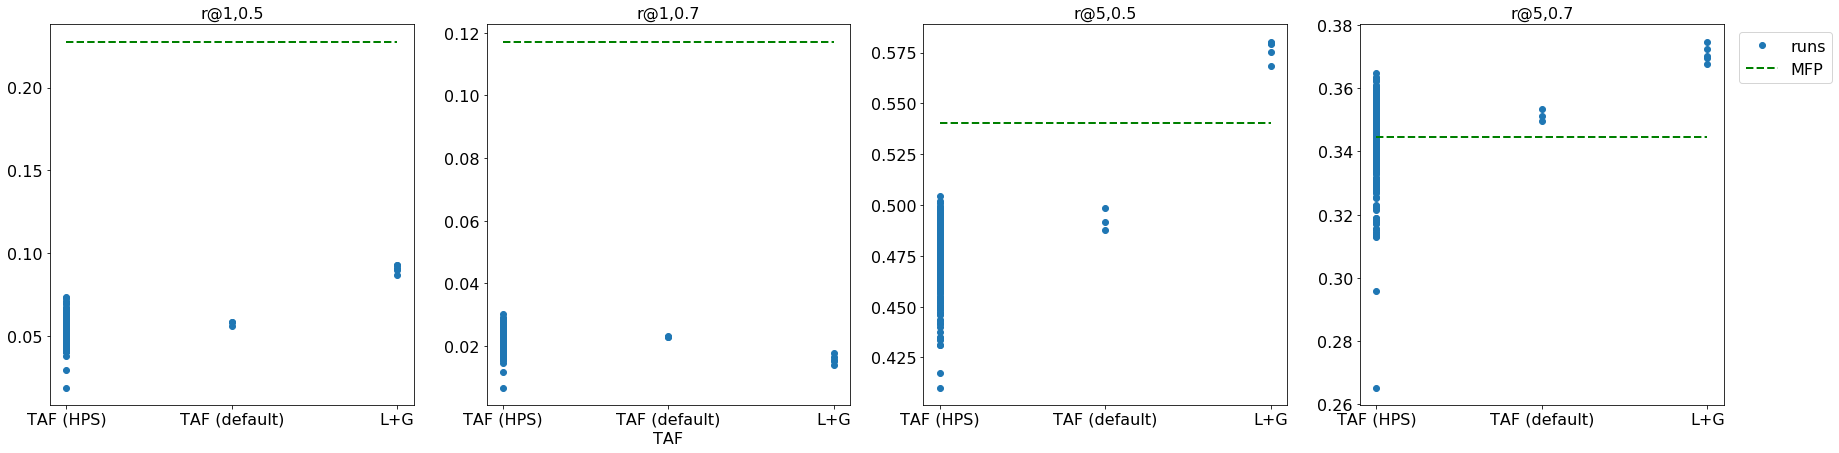

In [1]:
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
metric_ref = {
    'MFP': {'r@1,0.5': 0.2277, 'r@1,0.7': 0.1172, 'r@5,0.5': 0.5401, 'r@5,0.7': 0.3444, 'color': 'green'},
}

import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

EXPERIMENT_TITLE = 'TAF'
dfs = []
for ind, i in enumerate([
    'workers/ibex-fscratch/data/interim/smcn_21/f1/*.json',
    'data/interim/smcn_21/f/*.json',
    'data/interim/smcn_21/b/*.json']):
    df = jsons_to_dataframe(i)
    if ind == 0:
        df['backbone'] = 'TAF (HPS)'
    elif ind == 1:
        df['backbone'] = 'TAF (default)'
    elif ind == 2:
        df['backbone'] = 'L+G'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'test'
# ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[ind, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 4, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
backones = df.loc[ind, 'backbone'].unique()[[0, -1]]
for i, metric in enumerate(METRICS):
    ax[i].plot(df_.loc[ind, 'backbone'],
               df_.loc[ind, metric],
               'o')
    for j in metric_ref:
        ref_i = metric_ref[j][metric]
        ax[i].plot(backones, [ref_i, ref_i], '--', color=metric_ref[j]['color'], lw=2, label=j)
    ax[i].title.set_text(metric)
    ax[i].title.set_size(fontsize)
    ax[i].xaxis.label.set_size(fontsize)
    ax[i].tick_params(labelsize=fontsize)
    if i == 1:
        ax[i].xaxis.label.set_text(EXPERIMENT_TITLE)
    if i == 3:
        ax[i].legend(['runs'] + list(metric_ref.keys()),
                     fontsize=fontsize,
                     bbox_to_anchor=[1.02, 1.0])
# fig.savefig('tasmcn_hsp.pdf', bbox_inches='tight')

### 21 SMCN learning rate finder

compare batches of learning rate finde

TODO: hps comparison. scatter plot of single interactions wrt to each hyper-parameter

uniform results means the range of values may not influence the results ;)

## 15. MCN

Last update: Oct 12 - Created: Oct 11

_conclusions_:

MCN, with all the features, is a strong model in Charades-STA.

_scope_: MCN with default setup in Charades-STA

- model: MCN and its variants (local, local+global, local+global+tef)

- training scheme: only charades-sta training videos.

- features: rgb resnet152 pre-trained on imagenet for classification. TEF. Global

- hp: Almost as Lisa with higher momentum. Inherited from [MCN hps experiment](#006.-MCN-pytorch).

model: intra+intra rgb

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare architectures'
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
FAKE_REPETITIONS = 5
SUBSET = 'val'
metric_ref = {
    # 'CTRL-ICCV17': {'r@1,0.5': 0.2142, 'r@1,0.7': 0.0715, 'r@5,0.5': 0.5911, 'r@5,0.7': 0.2991, 'color': 'orange', 'subset': 'val'},
    # moment frequency prior (discrete)
    'D-MFP': {'r@1,0.5': 0.0000, 'r@1,0.7': 0.0000, 'r@5,0.5': 0.2325, 'r@5,0.7': 0.0981, 'color': 'orange', 'subset': 'val'},
    # moment frequency prior (continous)
    'C-MFP': {'r@1,0.5': 0.2277, 'r@1,0.7': 0.1172, 'r@5,0.5': 0.5401, 'r@5,0.7': 0.3444, 'color': 'orange', 'subset': 'val'},
    # 'CTRL-ICCV17': {'r@1,0.5': 0.2142, 'r@1,0.7': 0.0715, 'r@5,0.5': 0.5911, 'r@5,0.7': 0.2991, 'color': 'orange', 'subset': 'val'},
    # 'BU-arxiv2018': {'r@1,0.5': 0.356, 'r@1,0.7': 0.158, 'r@5,0.5': 0.794, 'r@5,0.7': 0.454, 'color': 'red', 'subset': 'val'},
}

dfs = []
for ind, i in enumerate(['mcn_15/c', 'mcn_15/b', 'mcn_15/a', 'mcn_15/d1']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'MCN (Local)'
    elif ind == 1:
        df['backbone'] = 'MCN (Local+Global)'
    elif ind == 2:
        df['backbone'] = 'MCN (Local+Global+TEF)'
    elif ind == 3:
        df['backbone'] = 'MCN (TEF)'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subsets=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subsets, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subsets):
            ind1 = j * len(subset_and_metrics) // len(subsets)
            ind2 = ind1 + len(subset_and_metrics) // len(subsets)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df, [SUBSET])
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, len(METRICS), figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=METRICS, by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('/home/escorciav/Downloads/wt-tef.pdf', bbox_inches='tight')

### mcn-15 repeatability

Last update: Oct 15 - Created: Oct 14

regression test after refactoring dataset class

_conclusion:_

- results are similar within a tolerance bar given by different initializations, etc.

- we are good to go 🙌

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare architectures'
METRICS = ['r@1,0.5', 'r@1,0.7', 'r@5,0.5', 'r@5,0.7']
FAKE_REPETITIONS = 5
SUBSET = 'val'
metric_ref = {
    'CTRL-ICCV17': {'r@1,0.5': 0.2142, 'r@1,0.7': 0.0715, 'r@5,0.5': 0.5911, 'r@5,0.7': 0.2991, 'color': 'orange', 'subset': 'val'},
}

dfs = []
for ind, i in enumerate(['mcn_15/repeat', 'mcn_15/a']):
    df = jsons_to_dataframe(f'workers/tyler/data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'MCN (current)'
    elif ind == 1:
        df['backbone'] = 'MCN (prev)'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subsets=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subsets, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subsets):
            ind1 = j * len(subset_and_metrics) // len(subsets)
            ind2 = ind1 + len(subset_and_metrics) // len(subsets)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df, [SUBSET])
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, len(METRICS), figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=METRICS, by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('/home/escorciav/Downloads/wt-tef.pdf', bbox_inches='tight')

## 20. SMCN

Last update: Oct 2 - Created: Oct 1

_conclusions_:

- ResNet-152 pre-trained on Imagenet outbeat other types of features, even pre-trained on Flickr (the same "domain" of DiDeMo).

- Again, max is consistently a better pooling scheme over time.

_scope_: compare mean vs max pooling

- model: SMCN on ResNet101  features.

- training scheme: only DIDEMO videos.

- features: resnet101 pre-trained on openimages for classification.

- hp: Almost as Lisa with higher momentum. Inherited from [MCN hps experiment](#006.-MCN-pytorch).

model: intra+intra rgb

### 20. Bottom line among features

_Note_: the comparison is a bit unfair given that we did not have to re-extract VGG-16 and apply max pooling over time.

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare architectures'
METRICS = ['iou', 'r@1', 'r@5']
FAKE_REPETITIONS = 5
SUBSET = 'val'
metric_ref = {
}

dfs = []
for ind, i in enumerate(['smcn_20/a', 'smcn_17/a', 'smcn_14']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'ResNet101-max'
    elif ind == 1:
        df['backbone'] = 'ResNet152-max'
    elif ind == 2:
        df['backbone'] = 'VGG-mean'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('/home/escorciav/Downloads/wt-tef.pdf', bbox_inches='tight')

### 20a-b. smcn with TEF

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare temporal pooling strategies'
METRICS = ['iou', 'r@1', 'r@5']
FAKE_REPETITIONS = 5
SUBSET = 'val'
metric_ref = {
}

dfs = []
for ind, i in enumerate(['smcn_20/b', 'smcn_20/a', 'smcn_14']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'ResNet101-mean'
    elif ind == 1:
        df['backbone'] = 'ResNet101-max'
    elif ind == 2:
        df['backbone'] = 'VGG-mean'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('/home/escorciav/Downloads/wt-tef.pdf', bbox_inches='tight')

## 03. TALC

Last update: Oct 2 - Created: Oct 1

_conclusions_:

- sligthly similar conclusions as with [SMCN]().

- with TEF, $\mathbb{R}^{+}$ embeddings achieves lower performance than $\mathbb{R}$ embeddings.

- without TEF, $\mathbb{R}^{+}$ embeddings achieves similar results to $\mathbb{R}$ embeddings. slightly better in average for R@5, but lower for R@1 and IOU.

_scope_: compare $\mathbb{R}^{+}$ embeddings vs $\mathbb{R}$ embeddings

- model: TALCv1 on VGG16 features. We apply ReLU after the linear layer that generates the embedding to force them to be $\ge 0$ .

- training scheme: only DIDEMO videos.

- features: Lisa's RGB features.

- hp: Almost as Lisa with higher momentum. Inherited from [MCN hps experiment](#006.-MCN-pytorch).

model: intra+intra rgb

### 03a. TALCv1 with TEF

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Embedding domain'
METRICS = ['iou', 'r@1', 'r@5']
FAKE_REPETITIONS = 5
SUBSET = 'val'
metric_ref = {
}

dfs = []
for ind, i in enumerate(['talcv1_03/a', 'talcv1_00/a']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'R+ embeddings'
    elif ind == 1:
        df['backbone'] = 'Real embeddings'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.00
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('/home/escorciav/Downloads/wt-tef.pdf', bbox_inches='tight')

### 03b. TALCv1 without TEF

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Embedding domain'
METRICS = ['iou', 'r@1', 'r@5']
FAKE_REPETITIONS = 5
SUBSET = 'val'
metric_ref = {
}

dfs = []
for ind, i in enumerate(['talcv1_03/b', 'talcv1_01']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'R+ embeddings'
    elif ind == 1:
        df['backbone'] = 'Real embeddings'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.00
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('/home/escorciav/Downloads/wt-tef.pdf', bbox_inches='tight')

## 19. SMCN

Last update: Oct 1 - Created: Sep 30

_conclusions_:

- we can draw different conclusion with and without TEF.

- with TEF, $\mathbb{R}^{+}$ embeddings achieves lower performance than $\mathbb{R}$ embeddings.

- without TEF, $\mathbb{R}^{+}$ embeddings achieves similar or slightly better performance than $\mathbb{R}$ embeddings.

_scope_: compare $\mathbb{R}^{+}$ embeddings vs $\mathbb{R}$ embeddings

- model: SMCN on VGG16 features. We apply ReLU after the linear layer that generates the embedding to force them to be $\ge 0$ .

- training scheme: only DIDEMO videos.

- features: Lisa's RGB features.

- hp: Almost as Lisa with higher momentum. Inherited from [MCN hps experiment](#006.-MCN-pytorch).

model: intra+intra rgb

### 19a. SMCN with TEF

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Embedding domain'
METRICS = ['iou', 'r@1', 'r@5']
FAKE_REPETITIONS = 5
SUBSET = 'val'
metric_ref = {
}

dfs = []
for ind, i in enumerate(['smcn_19/a', 'smcn_14']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'R+ embeddings'
    elif ind == 1:
        df['backbone'] = 'Real embeddings'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.00
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('/home/escorciav/Downloads/wt-tef.pdf', bbox_inches='tight')

### 19b. SMCN without TEF

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Embedding domain'
METRICS = ['iou', 'r@1', 'r@5']
FAKE_REPETITIONS = 5
SUBSET = 'val'
metric_ref = {
}

dfs = []
for ind, i in enumerate(['smcn_19/b', 'smcn_15']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'R+ embeddings'
    elif ind == 1:
        df['backbone'] = 'Real embeddings'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.00
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('/home/escorciav/Downloads/wt-tef.pdf', bbox_inches='tight')

## 02. TALCv1

Last update: Oct 1 - Created: Sep 30

_conclusions_:

- results are similar to those of [SMCN](#18.-SMCN)

- with TEF, cosine distance achieves an average results similar or better than SMCN.

- without TEF, cosine distance is consistently worse than SMCN.

_scope_: compare squared-l2 vs cosine distance

- model: SMCN-TALCv1 on VGG16 features.

- training scheme: only DIDEMO videos.

- features: Lisa's RGB features.

- hp: Almost as Lisa with higher momentum. Inherited from [MCN hps experiment](#006.-MCN-pytorch).

model: intra+intra rgb

### 02a-b. TALCv1 with TEF

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare distance function'
METRICS = ['iou', 'r@1', 'r@5']
FAKE_REPETITIONS = 5
SUBSET = 'val'
metric_ref = {
}

dfs = []
for ind, i in enumerate(['talcv1_02/a', 'talcv1_00/a']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'cosine'
    elif ind == 1:
        df['backbone'] = 'squared-l2'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.00
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('/home/escorciav/Downloads/wt-tef.pdf', bbox_inches='tight')

### 02a-b. talcv1 without TEF

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare distance function'
METRICS = ['iou', 'r@1', 'r@5']
FAKE_REPETITIONS = 5
SUBSET = 'val'
metric_ref = {
}

dfs = []
for ind, i in enumerate(['talcv1_02/b', 'talcv1_01']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'cosine'
    elif ind == 1:
        df['backbone'] = 'squared-l2'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.00
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('/home/escorciav/Downloads/wt-tef.pdf', bbox_inches='tight')

## 18. SMCN

Last update: Sep 30 - Created: Sep 30

_conclusions_:

mmm, it seems that the same HP for cosine distance produce lower results. We gotta run another HPS for this case.

_scope_: compare squared-l2 vs cosine distance

- model: SMCN on VGG16 features.

- training scheme: only DIDEMO videos.

- features: 

- hp: Almost as Lisa with higher momentum. Inherited from [MCN hps experiment](#006.-MCN-pytorch).

model: intra+intra rgb

### 18a-b. smcn with TEF

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare distance function'
METRICS = ['iou', 'r@1', 'r@5']
FAKE_REPETITIONS = 5
SUBSET = 'val'
metric_ref = {
}

dfs = []
for ind, i in enumerate(['smcn_18/a', 'smcn_14']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'cosine'
    elif ind == 1:
        df['backbone'] = 'squared-l2'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.00
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('/home/escorciav/Downloads/wt-tef.pdf', bbox_inches='tight')

### 18a-b. smcn without TEF

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare distance function'
METRICS = ['iou', 'r@1', 'r@5']
FAKE_REPETITIONS = 5
SUBSET = 'val'
metric_ref = {
}

dfs = []
for ind, i in enumerate(['smcn_18/b', 'smcn_15']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'cosine'
    elif ind == 1:
        df['backbone'] = 'squared-l2'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.00
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('/home/escorciav/Downloads/wt-tef.pdf', bbox_inches='tight')

## 16-17. SMCN

Last update: Sep 30 - Created: Sep 30

_conclusions_:



_scope_: compare mean vs max pooling

- model: SMCN on ResNet152  features.

- training scheme: only DIDEMO videos.

- features: pytorch resnet152 pre-trained on imagenet.

- hp: Almost as Lisa with higher momentum. Inherited from [MCN hps experiment](#006.-MCN-pytorch).

model: intra+intra rgb

### 16-17a. smcn with TEF

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare temporal pooling strategies'
METRICS = ['iou', 'r@1', 'r@5']
FAKE_REPETITIONS = 5
SUBSET = 'val'
metric_ref = {
}

dfs = []
for ind, i in enumerate(['smcn_16/a', 'smcn_17/a', 'smcn_14']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'ResNet152-mean'
    elif ind == 1:
        df['backbone'] = 'ResNet152-max'
    elif ind == 2:
        df['backbone'] = 'VGG-mean'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('/home/escorciav/Downloads/wt-tef.pdf', bbox_inches='tight')

### 16-17a. smcn without TEF

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Compare temporal pooling strategies'
METRICS = ['iou', 'r@1', 'r@5']
FAKE_REPETITIONS = 5
SUBSET = 'val'
metric_ref = {
}

dfs = []
for ind, i in enumerate(['smcn_16/b', 'smcn_17/b', 'smcn_15']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'ResNet152-mean'
    elif ind == 1:
        df['backbone'] = 'ResNet152-max'
    elif ind == 2:
        df['backbone'] = 'VGG-mean'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
# fig.savefig('/home/escorciav/Downloads/wo-tef-all.pdf', bbox_inches='tight')

### 17 SMCN avg-std result

In [ ]:
from utils import jsons_to_dataframe
import os
METRICS = ['iou', 'r@1', 'r@5']
SUBSET = 'test'

for i in ['data/interim/smcn_17/a',
          'data/interim/mcn_14',
          # 'workers/tyler/data/interim/mcn_17/a/',
          # 'workers/tyler/data/interim/mcn_14/a_replica/'
         ]:
    basename = os.path.basename(i)
    if 'mcn' not in basename:
        basename = os.path.basename(os.path.dirname(i))
    print(basename)
    df = jsons_to_dataframe(f'{i}/*.json')
    for j in METRICS:
        col = f'{SUBSET}_{j}'
        result = df.loc[:, col]
        print(col, f'{result.mean():.4f} +- {result.std():.4f}')

## 01. TALCv1

Last update: Sep 24 - Created: Sep 23

_conclusions_:

1. wholy molly guacamoly(e), it seems that TEF is hidding the impact of TALC.

_scope_: remove TEF to appreciate impact of temporal language codes

- model: SMCN+TALCv1 on VGG-16 features.

- training scheme: only DIDEMO videos

- features: Lisa's RGB features.

- hp: Almost as Lisa with higher momentum. Inherited from [MCN hps experiment](#006.-MCN-pytorch).

model: intra+intra rgb

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Reproducing results'
METRICS = ['iou', 'r@1', 'r@5']
FAKE_REPETITIONS = 5
SUBSET = 'test' # 'val'  # using test because of stanford paper
# If test test-set use lines below
# Values comming from Table 2
# http://openaccess.thecvf.com/content_ECCV_2018/papers/Bingbin_Liu_Temporal_Modular_Networks_ECCV_2018_paper.pdf
metric_ref = {
    'MCN-ICCV17': {'iou': 0.2513, 'r@1': 0.1310, 'r@5': 0.4482, 'color': 'orange', 'subset': 'test'},
    'TMN-ECCV18': {'iou': 0.3014, 'r@1': 0.1871, 'r@5': 0.7297, 'color': 'orange', 'subset': 'test'},
}

dfs = []
for ind, i in enumerate(['talcv1_01', 'smcn_15']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'TALC'
    elif ind == 1:
        df['backbone'] = 'SMCN'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
# fig.savefig('/home/escorciav/Downloads/wo-tef-all.pdf', bbox_inches='tight')

## 00. TALCv1

Last update: Sep 23 - Created: Sep 22

_conclusions_:

1. results look similar, there is a drop in performance for R@5

2. there is a spike in loss and in some cases the initial loss is could be 2x higher than before

3. changing learning rate to 1e-2 or 1e-4 remove the 2x higher loss and spikes. However, the combo new learning-rate with previous HPs achieve lower performance.

_scope_: impact of temporal language codes

- model: SMCN+TALCv1 on VGG-16 features.

- training scheme: only DIDEMO videos

- features: Lisa's RGB features.

- hp: Almost as Lisa with higher momentum. Inherited from [MCN hps experiment](#006.-MCN-pytorch).

model: intra+intra rgb

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Reproducing results'
METRICS = ['iou', 'r@1', 'r@5']
FAKE_REPETITIONS = 5
SUBSET = 'test'
# Values comming from https://github.com/LisaAnne/LocalizingMoments/issues/8
metric_ref = {
    'VGG16-ICCV17-Reproduced': {'iou': 0.361992, 'r@1': 0.236603, 'r@5': 0.766268, 'color': 'orange', 'subset': 'val'},
}

dfs = []
for ind, i in enumerate(['talcv1_00/a', 'smcn_14']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'TALC'
    elif ind == 1:
        df['backbone'] = 'SMCN'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('/home/escorciav/Downloads/wt-tef.pdf', bbox_inches='tight')

### taclv1-b hps learning rate and momentum

We noticed a trend where spike in loss function for lr={0.01, 0.001} are not as common. Thus we launched a experiment with those learning rates.

Results were explored exhaustively.

TODO: consolidate

### taclv1-[c-d] lr={1e-2, 1e-4}

conclusion: no spikes but lower performance. It may suggest that we need to tweak the other hyper-parameters before moving forward.

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Reproducing results'
METRICS = ['iou', 'r@1', 'r@5']
FAKE_REPETITIONS = 5
# Values comming from https://github.com/LisaAnne/LocalizingMoments/issues/8
metric_ref = {
    'VGG16-ICCV17-Reproduced': {'iou': 0.361992, 'r@1': 0.236603, 'r@5': 0.766268, 'color': 'orange'},
}

dfs = []
for ind, i in enumerate(['talcv1_00/a', 'talcv1_00/c', 'talcv1_00/d', 'smcn_14']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'TALC'
    elif ind == 1:
        df['backbone'] = 'lr=1e-2'
    elif ind == 2:
        df['backbone'] = 'lr=1e-4'
    elif ind == 3:
        df['backbone'] = 'SMCN'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone),
                    ('subset', 'val')])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == 'val'
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('boxplot.pdf', bbox_inches='tight')

## 14. SMCN

Last update: Sep 20 - Created: Sep 20

conclusion: I'm happy with my implementation. Achieve similar results to those reproduce with Lisa's code. The released model achieves slightly better results, but no one else has been able to achieve those numbers.

scope: Re-do SMC with Lisa's features due to bug in frame extraction with ffmpeg. Almost like a a SSL bug a few years ago :p

- model: SMCN on VGG-16 features.

- training scheme: only DIDEMO videos

- features: Lisa's RGB features.

- hp: Almost as Lisa with higher momentum. Inherited from [MCN hps experiment](#006.-MCN-pytorch).

model: intra+intra rgb

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Reproducing results'
METRICS = ['iou', 'r@1', 'r@5']
FAKE_REPETITIONS = 5
# Values comming from https://github.com/LisaAnne/LocalizingMoments/issues/8
metric_ref = {
    'VGG16-ICCV17-Released': {'iou': 0.373925, 'r@1': 0.244258, 'r@5': 0.754067, 'color': 'green'},
    'VGG16-ICCV17-Reproduced': {'iou': 0.361992, 'r@1': 0.236603, 'r@5': 0.766268, 'color': 'orange'},
}

dfs = []
for ind, i in enumerate(['smcn_14', 'mcn_14']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'SMCN'
    elif ind == 1:
        df['backbone'] = 'MCN'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
# Add references
reference = []
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = dict(b_data)
        del tmp['color']
        tmp.update([('backbone', backbone),
                    ('subset', 'val')])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == 'val'
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('boxplot.pdf', bbox_inches='tight')

The same plot but for test set.

Number provided by Bryan

_runtime notes_: run previous cell before ;)

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
SCOPE = 'Reproducing results'
METRICS = ['iou', 'r@1', 'r@5']
FAKE_REPETITIONS = 5
SUBSET = 'test'
SEED = 1701
# Values comming from https://docs.google.com/document/d/1WMR2JI0JKaimN4CQ4VV1AUurPoD7J1X2-4fEbxGjLDk/edit
metric_ref = {
    'VGG16-ICCV17-Reproduced': {'iou': 0.3413, 'r@1': 0.2259, 'r@5': 0.7340, 'color': 'orange',
                                'std_r@1': 0.0037, 'std_r@5': .0067, 'std_iou': .0040},
}

dfs = []
for ind, i in enumerate(['smcn_14', 'mcn_14']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'SMCN'
    elif ind == 1:
        df['backbone'] = 'MCN'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
# Add references
reference = []
rng = np.random.RandomState(SEED)
for backbone, b_data in metric_ref.items():
    for i in range(FAKE_REPETITIONS):
        tmp = {k: v for k, v in b_data.items()
               if (not k.startswith('std') and k != 'color')}
        for j in METRICS:
            tmp[j] += rng.normal(scale=b_data[f'std_{j}'])
        tmp.update([('backbone', backbone),
                    ('subset', SUBSET)])
        reference.append(tmp)
df_ = pd.concat([df_, pd.DataFrame(reference)],
                axis=0)
ind = df_.loc[:, 'subset'] == SUBSET
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text(SCOPE)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('boxplot.pdf', bbox_inches='tight')

### 14 MCN replica

Update: Nov 2, Created: Nov 2

_conclusion_: nce there is a bug somewhere else 😀 

<img src="https://tribzap2it.files.wordpress.com/2013/02/godaddy-nerd-sex-symbol-jesse-heiman.jpg?w=300&h=327">

_scope_: Make sure that we are able to reproduce results. This is a paranoic mode given that the unified setup is not working with DiDeMo.

In [ ]:
from utils import jsons_to_dataframe
import os
METRICS = ['iou', 'r@1', 'r@5']
SUBSET = 'test'

for i in ['data/interim/mcn_14',
          'data/interim/mcn_14/a_replica/',
         ]:
    basename = os.path.basename(i)
    if 'mcn' not in basename:
        basename = os.path.basename(os.path.dirname(i))
    print(basename)
    df = jsons_to_dataframe(f'{i}/*.json')
    for j in METRICS:
        col = f'{SUBSET}_{j}'
        result = df.loc[:, col]
        print(col, f'{result.mean():.4f} +- {result.std():.4f}')

## 02. TA-SMCN

Last update: August 27 - Created: August 25

scope: Add capacity to SMCN-Local+Global+TAF

- similar to [01 - TASMCN](#01.-TA-SMCN) but includes depth, width, etc. of visual encoder in random search.

- model: MCN over ResNet152 features. Using max over each 5s chunk in case of videos.

- training scheme: similar to [06-SMCN](#006.-SMCN)

- ResNet pre-trained on Imagenet (pytorch weights)

model: inter+intra rgb

### 02a. TA-SMCN single-v retrieval

Check hyper-parameter search

In [ ]:
METRICS = ['iou', 'r@1', 'r@5']
metric_ref = {
    'VGG16+Flow-ICCV17': {'iou': 0.4170, 'r@1': 0.2757, 'r@5': 0.7969, 'color': 'green'},
    'VGG16(Local+Global+TEF)-Github': {'iou': 0.3739, 'r@1': 0.2442, 'r@5': 0.7540, 'color': 'orange'},
    'VGG16(Local)-ICCV17': {'iou': 0.2513, 'r@1': 0.1310, 'r@5': 0.4482, 'color': 'red'},
}

import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

EXPERIMENT_TITLE = 'Replacement for TEF'
dfs = []
for ind, i in enumerate(['tasmcn_01', 'tasmcn_02/a', 'smcn_06']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'TA-SMCN (default)'
    elif ind == 1:
        df['backbone'] = 'TA-SMCN (HPS)'
    elif ind == 2:
        df['backbone'] = 'SMCN'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'val'
# ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[ind, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
backones = df.loc[ind, 'backbone'].unique()[[0, -1]]
for i, metric in enumerate(METRICS):
    ax[i].plot(df_.loc[ind, 'backbone'],
               df_.loc[ind, metric],
               'o')
    for j in metric_ref:
        ref_i = metric_ref[j][metric]
        ax[i].plot(backones, [ref_i, ref_i], '--', color=metric_ref[j]['color'], lw=2, label=j)
    ax[i].title.set_text(metric)
    ax[i].title.set_size(fontsize)
    ax[i].xaxis.label.set_size(fontsize)
    ax[i].tick_params(labelsize=fontsize)
    if i == 1:
        ax[i].xaxis.label.set_text(EXPERIMENT_TITLE)
    if i == 2:
        ax[i].legend(['runs'] + list(metric_ref.keys()),
                     fontsize=fontsize,
                     bbox_to_anchor=[1.02, 1.0])
# fig.savefig('tasmcn_hsp.pdf', bbox_inches='tight')

picking promising config

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

METRICS = ['iou', 'r@1', 'r@5']
TOPK = 10
BEST_BY = 'r@1'
COLS_INTEREST = ['lr', 'lr_decay', 'lr_step', 'patience', 'margin', 'momentum', 'w_inter', 'w_intra', 'seed', 'original_setup', 'logfile'] + METRICS
df = jsons_to_dataframe(f'data/interim/tasmcn_02/a/*.json')

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'val'
df_topk = df_.loc[ind, :].sort_values(by=BEST_BY, ascending=False).head(n=TOPK)
display(df_topk.loc[:, COLS_INTEREST])
# Used to clean-up (delete 320)
# df_topk = df_.loc[ind, :].sort_values(by=BEST_BY, ascending=True).head(n=320)
# counter = 0
# for i, row in df_topk.iterrows():
#     blah = row['logfile'] + '_checkpoint.pth.tar'
#     # !ls -lh $blah
#     # !rm $blah

## 01. TA-SMCN

Last update: August 27 - Created: August 25

scope: Exploring SMCN-Local+Global+TAF

- Replace TE of moments by TA features -> efficient retrieval.

- model: MCN over ResNet152 features. Using max over each 5s chunk in case of videos.

- training scheme: similar to [06-SMCN](#006.-SMCN)

- ResNet pre-trained on Imagenet (pytorch weights)

model: inter+intra rgb

### 01c. TA-SMCN corpus-v retrieval

dump the distance matrix. The results are dumped as CSV and plot in G-sheets.

In [ ]:
from evaluation import CorpusVideoMomentRetrievalEvalFromMatrix

h5_files = [
    'data/interim/tasmcn_01/3_moment_retrieval.h5',
]
tags = [
    'TASMCN OnlyVideo-Inter+Intra-Local+Global+TAF',
]
assert len(h5_files) == len(tags)

RECALL_VALUES = (1, 5, 10, 100, 1000, 2000, 10000)
json_filename = 'data/raw/val_data_wwa.json'
rows = []
for i, h5_filename in enumerate(h5_files):
    judge = CorpusVideoMomentRetrievalEvalFromMatrix(
        json_filename, h5_filename, RECALL_VALUES, 0.1)
    recall, mrank = judge.eval()
    rows.append([tags[i]] + recall + [mrank])
    

import pandas as pd
df = pd.DataFrame(rows)
df.columns = ['model'] + [f'R@{i}' for i in RECALL_VALUES] + ['mean-rank']
df.to_csv('2018-08-28.csv', index=None)

### 01a. TA-SMCN single-v retrieval

In [ ]:
METRICS = ['iou', 'r@1', 'r@5']
metric_ref = {
    'VGG16-Fusion (Local+Global+TEF) ICCV17': {'iou': 0.4170, 'r@1': 0.2757, 'r@5': 0.7969, 'color': 'green'},
    'VGG16-RGB (Local+Global+TEF)': {'iou': 0.3739, 'r@1': 0.2442, 'r@5': 0.7540, 'color': 'orange'},
    'VGG16-RGB (Local) ICCV17': {'iou': 0.2513, 'r@1': 0.1310, 'r@5': 0.4482, 'color': 'red'},
}

import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

EXPERIMENT_TITLE = 'Replacement for TEF'
dfs = []
for ind, i in enumerate(['smcn_13', 'tasmcn_01', 'smcn_06']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'SMCN (Local+Global)'
    elif ind == 1:
        df['backbone'] = 'TA-SMCN'
    elif ind == 2:
        df['backbone'] = 'SMCN (Local+Global+TEF)'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'val'
# ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[ind, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
rotation = 15
backones = df.loc[ind, 'backbone'].unique()[[0, -1]]
for i, metric in enumerate(METRICS):
    ax[i].plot(df_.loc[ind, 'backbone'],
               df_.loc[ind, metric],
               'o')
    for j in metric_ref:
        ref_i = metric_ref[j][metric]
        ax[i].plot(backones, [ref_i, ref_i], '--', color=metric_ref[j]['color'], lw=2, label=j)
    ax[i].title.set_text(metric)
    ax[i].title.set_size(fontsize)
    ax[i].xaxis.label.set_size(fontsize)
    ax[i].tick_params(labelsize=fontsize, rotation=rotation)
    if i == 1:
        ax[i].xaxis.label.set_text(EXPERIMENT_TITLE)
    if i == 2:
        ax[i].legend(['runs'] + list(metric_ref.keys()),
                     fontsize=fontsize,
                     bbox_to_anchor=[1.02, 1.0])
# fig.savefig('tasmcn_scatter.pdf', bbox_inches='tight')

As boxplot without reference

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

METRICS = ['iou', 'r@1', 'r@5']
metric_ref = {
    'VGG16+Flow-ICCV17': {'iou': 0.4170, 'r@1': 0.2757, 'r@5': 0.7969, 'color': 'green'},
    'VGG16(Local+Global+TEF)-Github': {'iou': 0.3739, 'r@1': 0.2442, 'r@5': 0.7540, 'color': 'orange'},
    'VGG16(Local)-ICCV17': {'iou': 0.2513, 'r@1': 0.1310, 'r@5': 0.4482, 'color': 'red'},
}

EXPERIMENT_TITLE = 'Replacement for TEF'
dfs = []
# Hack to preserve order like in the above plot
preserve_order = [0, 2, 1] # None
for ind, i in enumerate(['smcn_13', 'tasmcn_01', 'smcn_06']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'SMCN (Local+Global)'
    elif ind == 1:
        df['backbone'] = 'TA-SMCN'
    elif ind == 2:
        df['backbone'] = 'SMCN (Local+Global+TEF)'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'val'
df_ = df_.loc[ind, ['backbone', 'iou', 'r@1', 'r@5']]
backones = df_.loc[ind, 'backbone'].unique()[[0, -1]]
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.boxplot(
    column=METRICS, by=['backbone'], ax=ax,
    fontsize=fontsize, rot=15,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict',
    positions=preserve_order)
for i, ax_i in enumerate(ax):
    ax_i.title.set_size(fontsize)
    ax_i.xaxis.label.set_size(fontsize)
    if i == 1:
        ax_i.xaxis.label.set_text(EXPERIMENT_TITLE)
    else:
        ax_i.xaxis.label.set_text('')
    # couldn't plot it nicely
#     metric = METRICS[i]
#     for j in metric_ref:
#         ref_ij = metric_ref[j][metric]
#         ax_i.plot(backones, [ref_ij, ref_ij], '--', color=metric_ref[j]['color'], lw=2, label=j)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
# fig.savefig('tasmcn_boxplot.pdf', bbox_inches='tight')

### 01b. TA-SMCN single-v retrieval

Check hyper-parameter search

In [ ]:
METRICS = ['iou', 'r@1', 'r@5']
metric_ref = {
    'VGG16+Flow-ICCV17': {'iou': 0.4170, 'r@1': 0.2757, 'r@5': 0.7969, 'color': 'green'},
    'VGG16(Local+Global+TEF)-Github': {'iou': 0.3739, 'r@1': 0.2442, 'r@5': 0.7540, 'color': 'orange'},
    'VGG16(Local)-ICCV17': {'iou': 0.2513, 'r@1': 0.1310, 'r@5': 0.4482, 'color': 'red'},
}

import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

EXPERIMENT_TITLE = 'Replacement for TEF'
dfs = []
for ind, i in enumerate(['tasmcn_01', 'tasmcn_01/a', 'smcn_06']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'TA-SMCN (default)'
    elif ind == 1:
        df['backbone'] = 'TA-SMCN (HPS)'
    elif ind == 2:
        df['backbone'] = 'SMCN'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'val'
# ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[ind, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
backones = df.loc[ind, 'backbone'].unique()[[0, -1]]
for i, metric in enumerate(METRICS):
    ax[i].plot(df_.loc[ind, 'backbone'],
               df_.loc[ind, metric],
               'o')
    for j in metric_ref:
        ref_i = metric_ref[j][metric]
        ax[i].plot(backones, [ref_i, ref_i], '--', color=metric_ref[j]['color'], lw=2, label=j)
    ax[i].title.set_text(metric)
    ax[i].title.set_size(fontsize)
    ax[i].xaxis.label.set_size(fontsize)
    ax[i].tick_params(labelsize=fontsize)
    if i == 1:
        ax[i].xaxis.label.set_text(EXPERIMENT_TITLE)
    if i == 2:
        ax[i].legend(['runs'] + list(metric_ref.keys()),
                     fontsize=fontsize,
                     bbox_to_anchor=[1.02, 1.0])
# fig.savefig('tasmcn_hsp.pdf', bbox_inches='tight')

picking promising config

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

METRICS = ['iou', 'r@1', 'r@5']
TOPK = 10
BEST_BY = 'r@1'
COLS_INTEREST = ['lr', 'lr_decay', 'lr_step', 'patience', 'margin', 'momentum', 'w_inter', 'w_intra', 'seed', 'original_setup', 'logfile'] + METRICS
df = jsons_to_dataframe(f'data/interim/tasmcn_01/a/*.json')

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'val'
df_topk = df_.loc[ind, :].sort_values(by=BEST_BY, ascending=False).head(n=TOPK)
display(df_topk.loc[:, COLS_INTEREST])
# delete 95% models
# Use this to clean-up
# df_topk = df_.loc[ind, :].sort_values(by=BEST_BY, ascending=True).head(n=270)
# for i, row in df_topk.iterrows():
#     blah = row['logfile'] + '_checkpoint.pth.tar'
#     !ls -lh $blah
#     # !rm $blah

## 13. SMCN

Last update: August 22 - Created: August 21

scope: SMCN-Local+Global i.e. without TEF assess impact of TEF for Corpus video (& Single video) retrieval.

- model: MCN over ResNet152 features. Using max over each 5s chunk in case of videos.

- training scheme: similar to [06-SMCN](#006.-SMCN)

- ResNet pre-trained on Imagenet (pytorch weights)

- Turn off TEF.

model: inter+intra rgb

### 13. SMCN corpus-v retrieval

We dumped the distance matrix and compute metrics with another notebook. The results were dumped and are in G-sheets.

### 13. SMCN single-v retrieval

as box plot

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

METRICS = ['iou', 'r@1', 'r@5']
metric_ref = {
    'VGG16+Flow-ICCV17': {'iou': 0.4170, 'r@1': 0.2757, 'r@5': 0.7969, 'color': 'green'},
    'VGG16(Local+Global+TEF)-Github': {'iou': 0.3739, 'r@1': 0.2442, 'r@5': 0.7540, 'color': 'orange'},
    'VGG16(Local)-ICCV17': {'iou': 0.2513, 'r@1': 0.1310, 'r@5': 0.4482, 'color': 'red'},
}

EXPERIMENT_TITLE = 'SMCN moment-representation abalation'
dfs = []
for ind, i in enumerate(['smcn_10/a', 'smcn_13', 'smcn_06']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'Local'
    elif ind == 1:
        df['backbone'] = 'Local+Global'
    elif ind == 2:
        df['backbone'] = 'Local+Global+TEF'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'val'
df_ = df_.loc[ind, ['backbone', 'iou', 'r@1', 'r@5']]
backones = df_.loc[ind, 'backbone'].unique()[[0, -1]]
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.boxplot(
    column=METRICS, by=['backbone'], ax=ax,
    fontsize=fontsize, rot=15,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i, ax_i in enumerate(ax):
    ax_i.title.set_size(fontsize)
    ax_i.xaxis.label.set_size(fontsize)
    if i == 1:
        ax_i.xaxis.label.set_text(EXPERIMENT_TITLE)
    else:
        ax_i.xaxis.label.set_text('')
    # couldn't plot it nicely
#     metric = METRICS[i]
#     for j in metric_ref:
#         ref_ij = metric_ref[j][metric]
#         ax_i.plot(backones, [ref_ij, ref_ij], '--', color=metric_ref[j]['color'], lw=2, label=j)
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
fig.savefig('impact_tef_boxplot.pdf', bbox_inches='tight')

as scatter plot with references

In [ ]:
METRICS = ['iou', 'r@1', 'r@5']
metric_ref = {
    'VGG16+Flow-ICCV17': {'iou': 0.4170, 'r@1': 0.2757, 'r@5': 0.7969, 'color': 'green'},
    'VGG16(Local+Global+TEF)-Github': {'iou': 0.3739, 'r@1': 0.2442, 'r@5': 0.7540, 'color': 'orange'},
    'VGG16(Local)-ICCV17': {'iou': 0.2513, 'r@1': 0.1310, 'r@5': 0.4482, 'color': 'red'},
}

import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

EXPERIMENT_TITLE = 'SMCN moment-representation abalation'
dfs = []
for ind, i in enumerate(['smcn_10/a', 'smcn_13', 'smcn_06']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'Local'
    elif ind == 1:
        df['backbone'] = 'Local+Global'
    elif ind == 2:
        df['backbone'] = 'Local+Global+TEF'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'val'
# ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[ind, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
backones = df.loc[ind, 'backbone'].unique()[[0, -1]]
for i, metric in enumerate(METRICS):
    ax[i].plot(df_.loc[ind, 'backbone'],
               df_.loc[ind, metric],
               'o')
    for j in metric_ref:
        ref_i = metric_ref[j][metric]
        ax[i].plot(backones, [ref_i, ref_i], '--', color=metric_ref[j]['color'], lw=2, label=j)
    ax[i].title.set_text(metric)
    ax[i].title.set_size(fontsize)
    ax[i].xaxis.label.set_size(fontsize)
    ax[i].tick_params(labelsize=fontsize)
    if i == 1:
        ax[i].xaxis.label.set_text(EXPERIMENT_TITLE)
    if i == 2:
        ax[i].legend(['runs'] + list(metric_ref.keys()),
                     fontsize=fontsize,
                     bbox_to_anchor=[1.02, 1.0])
# fig.savefig('impact_tef.pdf', bbox_inches='tight')

## 12. MCN

Last update: August 22 - Created: August 21

scope: dump MCN with ResNet features

- model: MCN over ResNet152 features. Using max over each 5s chunk in case of videos.

- training scheme: similar to [06-SMCN](#006.-SMCN)

- ResNet pre-trained on Imagenet (pytorch weights)

model: inter+intra rgb

In [ ]:
METRICS = ['iou', 'r@1', 'r@5']
metric_ref = {
    'VGG16+Flow-ICCV17': {'iou': 0.4170, 'r@1': 0.2757, 'r@5': 0.7969, 'color': 'green'},
    'VGG16-Github': {'iou': 0.3739, 'r@1': 0.2442, 'r@5': 0.7540, 'color': 'orange'},
}

import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

EXPERIMENT_TITLE = 'MCN training'
dfs = []
for ind, i in enumerate(['mcn_pytorch_12', 'smcn_06']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'MCN'
    elif ind == 1:
        df['backbone'] = 'SMCN'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'val'
# ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[ind, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
backones = df.loc[ind, 'backbone'].unique()[[0, -1]]
for i, metric in enumerate(METRICS):
    ax[i].plot(df_.loc[ind, 'backbone'],
               df_.loc[ind, metric],
               'o')
    for j in metric_ref:
        ref_i = metric_ref[j][metric]
        ax[i].plot(backones, [ref_i, ref_i], '--', color=metric_ref[j]['color'], lw=2, label=j)
    ax[i].title.set_text(metric)
    ax[i].title.set_size(fontsize)
    ax[i].xaxis.label.set_size(fontsize)
    ax[i].tick_params(labelsize=fontsize)
    if i == 1:
        ax[i].xaxis.label.set_text(EXPERIMENT_TITLE)
    if i == 2:
        ax[i].legend(['runs'] + list(metric_ref.keys()),
                     fontsize=fontsize,
                     bbox_to_anchor=[1.02, 1.0])
#fig.savefig('boxplot.pdf', bbox_inches='tight')

## 11. Htg-SMCN

### 11. trial-a hsmcn

Last update: August 15 - Created: August 15

scope: hyper-parameter search including convex combination over sw_inter.

- model: SMCN over ResNet152 features. Using max over each 5s chunk in case of videos.

- training scheme: joint training images and videos.

- ResNet pre-trained on Imagenet (pytorch weights)

model: inter rgb

In [ ]:
METRICS = ['iou', 'r@1', 'r@5']
metric_ref = {
    'ResNet152-Inter+Intra': {'iou': 0.3600, 'r@1': 0.2252, 'r@5': 0.5771, 'color': 'green'},
    'ResNet152-Inter': {'iou': 0.3179, 'r@1': 0.1904, 'r@5': 0.5202, 'color': 'red'},
    'VGG16-ICCV17': {'iou': 0.2513, 'r@1': 0.1310, 'r@5': 0.4482, 'color': 'orange'},
#     'Chance': {'iou': 0.1796, 'r@1': 0.1033, 'r@5': 0.3266, 'color': 'green'},
             }
# iou: 0.1834     r@1: 0.1030     r@5: 0.3367

import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

EXPERIMENT_TITLE = 'Effect convex comibnation'
dfs = []
for ind, i in enumerate(['hsmcn_11/a', 'hsmcn_03', 'hsmcn_01']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'convex-combination'
    elif ind == 1:
        df['backbone'] = 'inter+intra'
    elif ind == 2:
        df['backbone'] = 'inter image'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'val'
# ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[ind, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
backones = df.loc[ind, 'backbone'].unique()[[0, -1]]
for i, metric in enumerate(METRICS):
    ax[i].plot(df_.loc[ind, 'backbone'],
               df_.loc[ind, metric],
               'o')
    for j in metric_ref:
        ref_i = metric_ref[j][metric]
        ax[i].plot(backones, [ref_i, ref_i], '--', color=metric_ref[j]['color'], lw=2, label=j)
    ax[i].title.set_text(metric)
    ax[i].title.set_size(fontsize)
    ax[i].xaxis.label.set_size(fontsize)
    ax[i].tick_params(labelsize=fontsize)
    if i == 1:
        ax[i].xaxis.label.set_text(EXPERIMENT_TITLE)
    if i == 2:
        ax[i].legend(['trial'] + list(metric_ref.keys()),
                     fontsize=fontsize,
                     bbox_to_anchor=[1.02, 1.0])
#fig.savefig('boxplot.pdf', bbox_inches='tight')

## 10. Htg-SMCN

Last update: August 15 - Created: August 15

scope: variations accross a hp, hyper-parameter, config.

- model: SMCN over ResNet152 features. Using max over each 5s chunk in case of videos.

- training scheme: TBD - check json

- ResNet pre-trained on Imagenet (pytorch weights)

model: inter+intra rgb

TODO - postponed by high-priority task

__NOTE__ the experiments were launched, but never compiled

## 09. Htg-SMCN

Last update: August 15 - Created: August 15

scope: variations accross a hp, hyper-parameter, config. BTW, you could also take the spanish interpretation of the acronym.

- model: SMCN over ResNet152 features. Using max over each 5s chunk in case of videos.

- training scheme: TBD - check json

- ResNet pre-trained on Imagenet (pytorch weights)

model: inter+intra rgb

TODO - postponed by high-priority task

__NOTE__ the experiments were launched, but never compiled

## Status 2018-08-15

Josef requested the overall status of this journey.

_Conclusion_: The full MCN model, with all the toys published at ICCV17, achieves a small edge in terms of single video retrieval on R@1 and mIOU. Our novel and modest SMCN using _only_ ResNet features achieves similar performance in R@5.

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dfs = []
for ind, i in enumerate(['smcn_10', 'smcn_06']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'ResNet-Local'
    elif ind == 1:
        df['backbone'] = 'Resnet-Local+Global+TEF'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'val'
df_ = df_.loc[ind, ['backbone', 'iou', 'r@1', 'r@5']]
extras = pd.DataFrame([{'backbone': '(ICCV17) VGG-Local',
                        'iou': 0.2513,
                        'r@1': 0.1310,
                        'r@5': 0.4482},
                       {'backbone': '(ICCV17) VGG+Flow-Local+Global+TEF',
                        'iou': 0.4170,
                        'r@1': 0.2757,
                        'r@5': 0.7969},
                       ])
df_ = pd.concat([df_, extras], ignore_index=True)
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.boxplot(
    column=['iou', 'r@1', 'r@5'], by=['backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text('Impact of Global and TEF')
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
# fig.savefig('boxplot.pdf', bbox_inches='tight')

## 08. Htg-SMCN

### 08. trial-a, HTG-SMCN

Last update: August 10 - Created: August 10

scope: hyper-parameter search

- model: SMCN over ResNet152 features. Using max over each 5s chunk in case of videos.

- training scheme: only images of YFCC100M with S2 clean-up, train_04.

- ResNet pre-trained on Imagenet (pytorch weights)

model: inter rgb

In [ ]:
METRICS = ['iou', 'r@1', 'r@5']
metric_ref = {
#     'ResNet152-Inter+Intra': {'iou': 0.3600, 'r@1': 0.2252, 'r@5': 0.5771, 'color': 'red'},
    'ResNet152-Inter': {'iou': 0.3179, 'r@1': 0.1904, 'r@5': 0.5202, 'color': 'red'},
    'VGG16-ICCV17': {'iou': 0.2513, 'r@1': 0.1310, 'r@5': 0.4482, 'color': 'orange'},
#     'Chance': {'iou': 0.1796, 'r@1': 0.1033, 'r@5': 0.3266, 'color': 'green'},
             }
# iou: 0.1834     r@1: 0.1030     r@5: 0.3367

import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

EXPERIMENT_TITLE = 'Effect of clean-up strategy'
dfs = []
for ind, i in enumerate(['hsmcn_08/b', 'hsmcn_06', 'hsmcn_01']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'S2'
    elif ind == 1:
        df['backbone'] = 'S1'
    elif ind == 2:
        df['backbone'] = 'No'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'val'
# ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[ind, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
backones = df.loc[ind, 'backbone'].unique()[[0, -1]]
for i, metric in enumerate(METRICS):
    ax[i].plot(df_.loc[ind, 'backbone'],
               df_.loc[ind, metric],
               'o')
    for j in metric_ref:
        ref_i = metric_ref[j][metric]
        ax[i].plot(backones, [ref_i, ref_i], '--', color=metric_ref[j]['color'], lw=2, label=j)
    ax[i].title.set_text(metric)
    ax[i].title.set_size(fontsize)
    ax[i].xaxis.label.set_size(fontsize)
    ax[i].tick_params(labelsize=fontsize)
    if i == 1:
        ax[i].xaxis.label.set_text(EXPERIMENT_TITLE)
    if i == 2:
        ax[i].legend(['runs'] + list(metric_ref.keys()),
                     fontsize=fontsize,
                     bbox_to_anchor=[1.02, 1.0])
#fig.savefig('boxplot.pdf', bbox_inches='tight')

### 08. trial-b, HTG-SMCN

Last update: August 10 - Created: August 10

scope: check multiple runs.

- model: SMCN over ResNet152 features. Using max over each 5s chunk in case of videos.

- training scheme: only images of YFCC100M with S2 clean-up, train_04.

- ResNet pre-trained on Imagenet (pytorch weights)

- SMCN config: the same as in [HSMCN-07](#07.-Htg-SMCN)

model: inter rgb

In [ ]:
METRICS = ['iou', 'r@1', 'r@5']
metric_ref = {
#     'ResNet152-Inter+Intra': {'iou': 0.3600, 'r@1': 0.2252, 'r@5': 0.5771, 'color': 'red'},
    'ResNet152-Inter': {'iou': 0.3179, 'r@1': 0.1904, 'r@5': 0.5202, 'color': 'red'},
    'VGG16-ICCV17': {'iou': 0.2513, 'r@1': 0.1310, 'r@5': 0.4482, 'color': 'orange'},
#     'Chance': {'iou': 0.1796, 'r@1': 0.1033, 'r@5': 0.3266, 'color': 'green'},
             }
# iou: 0.1834     r@1: 0.1030     r@5: 0.3367

import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

EXPERIMENT_TITLE = 'Variations vs Random Search'
dfs = []
for ind, i in enumerate(['hsmcn_08/b', 'hsmcn_08/a']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'random-search'
    elif ind == 1:
        df['backbone'] = 'single-config'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'val'
# ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[ind, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
backones = df.loc[ind, 'backbone'].unique()[[0, -1]]
for i, metric in enumerate(METRICS):
    ax[i].plot(df_.loc[ind, 'backbone'],
               df_.loc[ind, metric],
               'o')
    for j in metric_ref:
        ref_i = metric_ref[j][metric]
        ax[i].plot(backones, [ref_i, ref_i], '--', color=metric_ref[j]['color'], lw=2, label=j)
    ax[i].title.set_text(metric)
    ax[i].title.set_size(fontsize)
    ax[i].xaxis.label.set_size(fontsize)
    ax[i].tick_params(labelsize=fontsize)
    if i == 1:
        ax[i].xaxis.label.set_text(EXPERIMENT_TITLE)
    if i == 2:
        ax[i].legend(['runs'] + list(metric_ref.keys()),
                     fontsize=fontsize,
                     bbox_to_anchor=[1.02, 1.0])
#fig.savefig('boxplot.pdf', bbox_inches='tight')

### 08. trial-b, Htg-SMCN pick good configs.

Created: Aug 11

Narrow-down search space to few configurations from random search

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

METRICS = ['iou', 'r@1', 'r@5']
TOPK = 10
BEST_BY = 'r@1'
COLS_INTEREST = ['lr', 'lr_decay', 'lr_step', 'patience', 'margin', 'momentum', 'logfile'] + METRICS
df = jsons_to_dataframe(f'data/interim/hsmcn_08/b/*.json')

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'val'
df_topk = df_.loc[ind, :].sort_values(by=BEST_BY, ascending=False).head(n=TOPK)
display(df_topk.loc[:, COLS_INTEREST])
# Use this to clean-up
# df_topk = df_.loc[ind, :].sort_values(by=BEST_BY, ascending=True).head(n=20)
# for i, row in df_topk.iterrows():
#     blah = row['logfile'] + '_checkpoint.pth.tar'
#     !ls -lh $blah
#     # !rm $blah

### 08. trial-c, Htg-SMCN pseudo-good config.

Created: Aug 12

In [ ]:
METRICS = ['iou', 'r@1', 'r@5']
metric_ref = {
#     'ResNet152-Inter+Intra': {'iou': 0.3600, 'r@1': 0.2252, 'r@5': 0.5771, 'color': 'red'},
    'ResNet152-Inter': {'iou': 0.3179, 'r@1': 0.1904, 'r@5': 0.5202, 'color': 'red'},
    'VGG16-ICCV17': {'iou': 0.2513, 'r@1': 0.1310, 'r@5': 0.4482, 'color': 'orange'},
#     'Chance': {'iou': 0.1796, 'r@1': 0.1033, 'r@5': 0.3266, 'color': 'green'},
             }
# iou: 0.1834     r@1: 0.1030     r@5: 0.3367

import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

EXPERIMENT_TITLE = 'Variations vs Random Search'
dfs = []
for ind, i in enumerate(['hsmcn_08/c', 'hsmcn_08/a']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'random-search'
    elif ind == 1:
        df['backbone'] = 'single-config'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'val'
# ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[ind, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
backones = df.loc[ind, 'backbone'].unique()[[0, -1]]
for i, metric in enumerate(METRICS):
    ax[i].plot(df_.loc[ind, 'backbone'],
               df_.loc[ind, metric],
               'o')
    for j in metric_ref:
        ref_i = metric_ref[j][metric]
        ax[i].plot(backones, [ref_i, ref_i], '--', color=metric_ref[j]['color'], lw=2, label=j)
    ax[i].title.set_text(metric)
    ax[i].title.set_size(fontsize)
    ax[i].xaxis.label.set_size(fontsize)
    ax[i].tick_params(labelsize=fontsize)
    if i == 1:
        ax[i].xaxis.label.set_text(EXPERIMENT_TITLE)
    if i == 2:
        ax[i].legend(['runs'] + list(metric_ref.keys()),
                     fontsize=fontsize,
                     bbox_to_anchor=[1.02, 1.0])
#fig.savefig('boxplot.pdf', bbox_inches='tight')

## 07. Htg-SMCN

### 07. phrase retrieval (HTG-SMCN)

run cells in -TODO-

Last update: August X - Created: August 9

- run X in `7.breakdown-per-noun.ipynb`

- Results are [here]()

### 07. per sample analysis (HTG-SMCN)

Last update: August 7 - Created: August 6

- run cells in `7.breakdown-per-noun.ipynb`

- Results are [here](https://docs.google.com/spreadsheets/d/1X78Xa3D2mEBYVP3_C5gmIlOwcFDogy-VONOJrwT0pmc/edit#gid=242955167)

### 07. runs (HTG-SMCN)

Last update: August 6 - Created: August 6

scope: checking variations among new batches that dumped retrieval results per sample

- model: SMCN over ResNet152 features. Using max over each 5s chunk in case of videos.

- training scheme: only images of YFCC100M - TODO: check log-files-

- ResNet pre-trained on Imagenet (pytorch weights)

model: inter rgb

In [ ]:
METRICS = ['iou', 'r@1', 'r@5']
metric_ref = {
#     'ResNet152-Inter+Intra': {'iou': 0.3600, 'r@1': 0.2252, 'r@5': 0.5771, 'color': 'red'},
    'ResNet152-Inter': {'iou': 0.3179, 'r@1': 0.1904, 'r@5': 0.5202, 'color': 'red'},
    'VGG16-ICCV17': {'iou': 0.2513, 'r@1': 0.1310, 'r@5': 0.4482, 'color': 'orange'},
#     'Chance': {'iou': 0.1796, 'r@1': 0.1033, 'r@5': 0.3266, 'color': 'green'},
             }
# iou: 0.1834     r@1: 0.1030     r@5: 0.3367

import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

EXPERIMENT_TITLE = 'Ensure trials are fine'
dfs = []
for ind, i in enumerate(['hsmcn_01', 'hsmcn_07']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'initial'
    elif ind == 1:
        df['backbone'] = 'new'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'val'
# ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[ind, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
backones = df.loc[ind, 'backbone'].unique()
for i, metric in enumerate(METRICS):
    ax[i].plot(df_.loc[ind, 'backbone'],
               df_.loc[ind, metric],
               'o')
    for j in metric_ref:
        ref_i = metric_ref[j][metric]
        ax[i].plot(backones, [ref_i, ref_i], '--', color=metric_ref[j]['color'], lw=2, label=j)
    ax[i].title.set_text(metric)
    ax[i].title.set_size(fontsize)
    ax[i].xaxis.label.set_size(fontsize)
    ax[i].tick_params(labelsize=fontsize)
    if i == 1:
        ax[i].xaxis.label.set_text(EXPERIMENT_TITLE)
    if i == 2:
        ax[i].legend(['runs'] + list(metric_ref.keys()),
                     fontsize=fontsize,
                     bbox_to_anchor=[1.02, 1.0])
#fig.savefig('boxplot.pdf', bbox_inches='tight')

## 12. SMCN

Last update: August 6 - Created: August 4

conclusion: as expected, intra loss gives a big push. Thus, it's unfair to compare the training only on yfcc100m with this model. There is nothing that tells the embedding how to rank moments inside a video. Moreover, the videos are not long neither contain "easy background" scenes to expect that a NOUNs activation are fully discriminative.

scope: simiar to [SMC-10](#010.-SMCN), but trained only using inter-loss

- model: SMCN over ResNet152 features. Using max over each 5s chunk in case of videos.

- training scheme: only DIDEMO videos

- ResNet pre-trained on Imagenet (pytorch weights)

model: inter rgb

In [ ]:
METRICS = ['iou', 'r@1', 'r@5']
metric_ref = {'ResNet152-Inter+Intra': {'iou': 0.3600, 'r@1': 0.2252, 'r@5': 0.5771, 'color': 'red'},
              'VGG16-ICCV17': {'iou': 0.2513, 'r@1': 0.1310, 'r@5': 0.4482, 'color': 'orange'},
#               'Chance': {'iou': 0.1796, 'r@1': 0.1033, 'r@5': 0.3266, 'color': 'green'},
             }
# iou: 0.1834     r@1: 0.1030     r@5: 0.3367

# TODO add reference values from 010-SMCN cell

import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

EXPERIMENT_TITLE = 'Effect of inter loss'
dfs = []
for ind, i in enumerate(['smcn_10', 'smcn_12']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'Intra+Inter'
    elif ind == 1:
        df['backbone'] = 'Inter'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'val'
# ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[ind, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
backones = df.loc[ind, 'backbone'].unique()
for i, metric in enumerate(METRICS):
    ax[i].plot(df_.loc[ind, 'backbone'],
               df_.loc[ind, metric],
               'o')
    for j in metric_ref:
        ref_i = metric_ref[j][metric]
        ax[i].plot(backones, [ref_i, ref_i], '--', color=metric_ref[j]['color'], lw=2, label=j)
    ax[i].title.set_text(metric)
    ax[i].title.set_size(fontsize)
    ax[i].xaxis.label.set_size(fontsize)
    ax[i].tick_params(labelsize=fontsize)
    if i == 1:
        ax[i].xaxis.label.set_text(EXPERIMENT_TITLE)
    if i == 2:
        ax[i].legend(['runs'] + list(metric_ref.keys()),
                     fontsize=fontsize,
                     bbox_to_anchor=[1.02, 1.0])
#fig.savefig('boxplot.pdf', bbox_inches='tight')

Grab values for comparison from here

In [ ]:
from utils import jsons_to_dataframe
from IPython.display import display

EXP_WILDCARD = 'data/interim/smcn_12/*.json'
TOPK = 5  # only consider the TOPK experiments
METRICS = ['r@1', 'r@5', 'iou']
SUBSETS = ['val', 'test']
BEST_BY = 'val_r@1'

df = jsons_to_dataframe(EXP_WILDCARD)
# set filters
ind = ((df.loc[:, 'feat'] == 'rgb') &
       (df.loc[:, 'context'] == False) &
       (df.loc[:, 'loc'] == False)
      )
assert ind.sum() > 0

df_ = df.loc[ind, :]
print('Number of runs:', len(df_))
df_top5 = df_.sort_values(by=BEST_BY, ascending=False).head(n=TOPK)
for subset in SUBSETS:
    print(subset.capitalize())
    for i, metric in enumerate(METRICS):
        j = f'{subset}_{metric}'
        print(f'{metric}: {df_top5.loc[:, j].mean():.4f} +/- {df_top5.loc[:, j].std():.4f}')
COLS_NAME_RESULTS = [i[0] + '_' + i[1]
                    for i in itertools.product(SUBSETS, METRICS)]
display(df_top5.loc[:, COLS_NAME_RESULTS])

### 12a per-sample results

Select `1.csv` for further analysis.

Validate that new results agree with previous

In [ ]:
METRICS = ['iou', 'r@1', 'r@5']
metric_ref = {
#     'ResNet152-Inter+Intra': {'iou': 0.3600, 'r@1': 0.2252, 'r@5': 0.5771, 'color': 'red'},
    'ResNet152-Inter': {'iou': 0.3179, 'r@1': 0.1904, 'r@5': 0.5202, 'color': 'red'},
    'VGG16-ICCV17': {'iou': 0.2513, 'r@1': 0.1310, 'r@5': 0.4482, 'color': 'orange'},
#     'Chance': {'iou': 0.1796, 'r@1': 0.1033, 'r@5': 0.3266, 'color': 'green'},
             }
# iou: 0.1834     r@1: 0.1030     r@5: 0.3367

import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

EXPERIMENT_TITLE = 'Ensure trials are fine'
dfs = []
for ind, i in enumerate(['smcn_12', 'smcn_12/a']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'initial'
    elif ind == 1:
        df['backbone'] = 'new'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'val'
# ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[ind, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
backones = df.loc[ind, 'backbone'].unique()
for i, metric in enumerate(METRICS):
    ax[i].plot(df_.loc[ind, 'backbone'],
               df_.loc[ind, metric],
               'o')
    for j in metric_ref:
        ref_i = metric_ref[j][metric]
        ax[i].plot(backones, [ref_i, ref_i], '--', color=metric_ref[j]['color'], lw=2, label=j)
    ax[i].title.set_text(metric)
    ax[i].title.set_size(fontsize)
    ax[i].xaxis.label.set_size(fontsize)
    ax[i].tick_params(labelsize=fontsize)
    if i == 1:
        ax[i].xaxis.label.set_text(EXPERIMENT_TITLE)
    if i == 2:
        ax[i].legend(['runs'] + list(metric_ref.keys()),
                     fontsize=fontsize,
                     bbox_to_anchor=[1.02, 1.0])
#fig.savefig('boxplot.pdf', bbox_inches='tight')

## 05. Htg-SMCN

Last update: August 6 - Created: August 4

conclusions: I need an eureka moment, that will span at most a paragraph in a paper... OK.

<img src="https://i.kym-cdn.com/photos/images/facebook/000/002/816/legendfail.jpg">

scope: effect of hyper-parameter search on MCN parameters

- random hyper-parameter search

- model: SMCN over ResNet152 features. Using max over each 5s chunk in case of videos.

- training scheme: only images of YFCC100M which are close to train or val videos of Didemo

- ResNet pre-trained on Imagenet (pytorch weights)

model: inter rgb

In [ ]:
METRICS = ['iou', 'r@1', 'r@5']
metric_ref = {'ResNet152-Intra+Inter': {'iou': 0.3600, 'r@1': 0.2252, 'r@5': 0.5771, 'color': 'green'},
              'ResNet152-Inter': {'iou': 0.3179, 'r@1': 0.1904, 'r@5': 0.5202, 'color': 'red'},
              'VGG16-ICCV17': {'iou': 0.2513, 'r@1': 0.1310, 'r@5': 0.4482, 'color': 'orange'},
#               'Chance': {'iou': 0.1796, 'r@1': 0.1033, 'r@5': 0.3266, 'color': 'green'},
             }

# TODO add reference values from 010-SMCN cell

import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

EXPERIMENT_TITLE = 'Effect of training in YFCC100M'
dfs = []
for ind, i in enumerate(['hsmcn_00', 'hsmcn_05']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'Original'
    elif ind == 1:
        df['backbone'] = 'Random-search'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'test'
# ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[ind, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
backones = df.loc[ind, 'backbone'].unique()
for i, metric in enumerate(METRICS):
    ax[i].plot(df_.loc[ind, 'backbone'],
               df_.loc[ind, metric],
               'o')
    for j in metric_ref:
        ref_i = metric_ref[j][metric]
        ax[i].plot(backones, [ref_i, ref_i], '--', color=metric_ref[j]['color'], lw=2, label=j)
    ax[i].title.set_text(metric)
    ax[i].title.set_size(fontsize)
    ax[i].xaxis.label.set_size(fontsize)
    ax[i].tick_params(labelsize=fontsize)
    if i == 1:
        ax[i].xaxis.label.set_text(EXPERIMENT_TITLE)
    if i == 2:
        ax[i].legend(['runs'] + list(metric_ref.keys()),
                     fontsize=fontsize,
                     bbox_to_anchor=[1.02, 1.0])
#fig.savefig('boxplot.pdf', bbox_inches='tight')

## 06. Htg-SMCN

Last update: August 6 - Created: August 4

conclusions: Note that the are two causes for the small gap in performance, the size of the dataset and the automatic clean-up strategy. In any case, the heuristic of reducing the size of the dataset could increase the gap wrt to the strong baseline.

scope: effect of automatic clean-up of YFCC100M

- random hyper-parameter search

- model: SMCN over ResNet152 features. Using max over each 5s chunk in case of videos.

- training scheme: only images of YFCC100M which are close to train or val videos of Didemo

- ResNet pre-trained on Imagenet (pytorch weights)

model: inter rgb

In [ ]:
METRICS = ['iou', 'r@1', 'r@5']
metric_ref = {'ResNet152-Intra+Inter': {'iou': 0.3600, 'r@1': 0.2252, 'r@5': 0.5771, 'color': 'green'},
              'ResNet152-Inter': {'iou': 0.3179, 'r@1': 0.1904, 'r@5': 0.5202, 'color': 'red'},
              'VGG16-ICCV17': {'iou': 0.2513, 'r@1': 0.1310, 'r@5': 0.4482, 'color': 'orange'},
#               'Chance': {'iou': 0.1796, 'r@1': 0.1033, 'r@5': 0.3266, 'color': 'green'},
             }
# iou: 0.1834     r@1: 0.1030     r@5: 0.3367

# TODO add reference values from 010-SMCN cell

import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

EXPERIMENT_TITLE = 'Purity&Size of YFCC100M subset'
dfs = []
for ind, i in enumerate(['hsmcn_01', 'hsmcn_06']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = '400k'
    elif ind == 1:
        df['backbone'] = '30k'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'test'
# ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[ind, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
backones = df.loc[ind, 'backbone'].unique()
for i, metric in enumerate(METRICS):
    ax[i].plot(df_.loc[ind, 'backbone'],
               df_.loc[ind, metric],
               'o')
    for j in metric_ref:
        ref_i = metric_ref[j][metric]
        ax[i].plot(backones, [ref_i, ref_i], '--', color=metric_ref[j]['color'], lw=2, label=j)
    ax[i].title.set_text(metric)
    ax[i].title.set_size(fontsize)
    ax[i].xaxis.label.set_size(fontsize)
    ax[i].tick_params(labelsize=fontsize)
    if i == 1:
        ax[i].xaxis.label.set_text(EXPERIMENT_TITLE)
    if i == 2:
        ax[i].legend(['runs'] + list(metric_ref.keys()),
                     fontsize=fontsize,
                     bbox_to_anchor=[1.02, 1.0])
#fig.savefig('boxplot.pdf', bbox_inches='tight')

## 0[3-4]. Htg-SMCN

Last update: August 1 - Created: August 1

conclusions: more tags could potentially give a small edge. The difference may not be noticeable, if we consider standard deviations for a particular model.

scope: effect of using more tags for images

- random hyper-parameter search

- model: SMCN over ResNet152 features. Using max over each 5s chunk in case of videos.

- training scheme: joint training using YFCC100M-Didemo-001

- ResNet pre-trained on Imagenet (pytorch weights)

model: intra-inter rgb

In [ ]:
METRICS = ['iou', 'r@1', 'r@5']
metric_ref = {
    'ResNet152-Intra+Inter': {'iou': 0.3600, 'r@1': 0.2252, 'r@5': 0.5771, 'color': 'green'},
#     'ResNet152-Inter': {'iou': 0.3179, 'r@1': 0.1904, 'r@5': 0.5202, 'color': 'red'},
    'VGG16-ICCV17': {'iou': 0.2513, 'r@1': 0.1310, 'r@5': 0.4482, 'color': 'orange'},
#     'Random': {'iou': 0.1796, 'r@1': 0.1033, 'r@5': 0.3266, 'color': 'green'},
}
# iou: 0.1834     r@1: 0.1030     r@5: 0.3367

# TODO add reference values from 010-SMCN cell

import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

EXPERIMENT_TITLE = 'Effect of more tags and joint training'
LINE_BACKBONES = ['Top-1', 'Top-10']
dfs = []
for ind, i in enumerate(['hsmcn_03', 'hsmcn_04']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'Top-1'
    elif ind == 1:
        df['backbone'] = 'Top-10'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'val'
# ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[ind, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
for i, metric in enumerate(METRICS):
    ax[i].plot(df_.loc[ind, 'backbone'],
               df_.loc[ind, metric],
               'o')
    for j in metric_ref:
        ref_i = metric_ref[j][metric]
        ax[i].plot(LINE_BACKBONES, [ref_i, ref_i], '--',
                   color=metric_ref[j]['color'], lw=2, label=j)
    ax[i].title.set_text(metric)
    ax[i].title.set_size(fontsize)
    ax[i].xaxis.label.set_size(fontsize)
    ax[i].tick_params(labelsize=fontsize)
    if i == 1:
        ax[i].xaxis.label.set_text(EXPERIMENT_TITLE)
    if i == 2:
        ax[i].legend(['trial'] + list(metric_ref.keys()),
                     fontsize=fontsize,
                     bbox_to_anchor=[1.02, 1.0])
#fig.savefig('boxplot.pdf', bbox_inches='tight')

## 0[2-3]. Htg-SMCN

Last update: Aug 6 - Created: July 31

conclusions: as we expect the model needs video information to achieve results similar to the baseline. Is it still unclear if we are learning the under-represented NOUNs?

scope: SMCN-local trained on YFCC100M

- random hyper-parameter search

- model: SMCN over ResNet152 features. Using max over each 5s chunk in case of videos.

- training scheme: finetune v.s. joint training using YFCC100M-Didemo-001

- ResNet pre-trained on Imagenet (pytorch weights)

model: inter rgb

In [ ]:
METRICS = ['iou', 'r@1', 'r@5']
metric_ref = {
    'ResNet152-Intra+Inter': {'iou': 0.3600, 'r@1': 0.2252, 'r@5': 0.5771, 'color': 'green'},
#     'ResNet152-Inter': {'iou': 0.3179, 'r@1': 0.1904, 'r@5': 0.5202, 'color': 'red'},
    'VGG16-ICCV17': {'iou': 0.2513, 'r@1': 0.1310, 'r@5': 0.4482, 'color': 'orange'},
#     'Random': {'iou': 0.1796, 'r@1': 0.1033, 'r@5': 0.3266, 'color': 'green'},
    }
# iou: 0.1834     r@1: 0.1030     r@5: 0.3367

# TODO add reference values from 010-SMCN cell

import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

EXPERIMENT_TITLE = 'Training scheme'
LINE_BACKBONES = ['Finetune', 'Only-Images']
dfs = []
for ind, i in enumerate(['hsmcn_02', 'hsmcn_03', 'hsmcn_01']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'Finetune'
    elif ind == 1:
        df['backbone'] = 'Joint'
    elif ind == 2:
        df['backbone'] = 'Only-Images'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'val'
# ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[ind, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
for i, metric in enumerate(METRICS):
    ax[i].plot(df_.loc[ind, 'backbone'],
               df_.loc[ind, metric],
               'o')
    for j in metric_ref:
        ref_i = metric_ref[j][metric]
        ax[i].plot(LINE_BACKBONES, [ref_i, ref_i], '--',
                   color=metric_ref[j]['color'], lw=2, label=j)
    ax[i].title.set_text(metric)
    ax[i].title.set_size(fontsize)
    ax[i].xaxis.label.set_size(fontsize)
    ax[i].tick_params(labelsize=fontsize)
    if i == 1:
        ax[i].xaxis.label.set_text(EXPERIMENT_TITLE)
    if i == 2:
        ax[i].legend(['trial'] + list(metric_ref.keys()),
                     fontsize=fontsize,
                     bbox_to_anchor=[1.02, 1.0])
#fig.savefig('boxplot.pdf', bbox_inches='tight')

### 02a. Htg-SMCN pick good configs

Created: Aug 13

Narrow-down search space to few configurations from random search

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

METRICS = ['iou', 'r@1', 'r@5']
TOPK = 10
BEST_BY = 'r@1'
COLS_INTEREST = ['lr', 'lr_decay', 'lr_step', 'patience', 'margin', 'sampler_kwargs', 'logfile'] + METRICS
df = jsons_to_dataframe(f'data/interim/hsmcn_02/*.json')

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'val'
df_topk = df_.loc[ind, :].sort_values(by=BEST_BY, ascending=False).head(n=TOPK)
display(df_topk.loc[:, COLS_INTEREST])

### 03a. Htg-SMCN pick good configs

Created: Aug 13

Narrow-down search space to few configurations from random search

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

METRICS = ['iou', 'r@1', 'r@5']
TOPK = 10
BEST_BY = 'r@1'
COLS_INTEREST = ['lr', 'lr_decay', 'lr_step', 'patience', 'margin', 'logfile'] + METRICS
df = jsons_to_dataframe(f'data/interim/hsmcn_03/*.json')

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'val'
df_topk = df_.loc[ind, :].sort_values(by=BEST_BY, ascending=False).head(n=TOPK)
display(df_topk.loc[:, COLS_INTEREST])

## 0[0-1]. Htg-SMCN

Last update: July 30 - Created: July 30

concusions:

- as we expected, training only in images is not enoguh to achieve good results in video. The gap is quite significant 5% or more over all metrics.

- using multiple tags per image may give an edge, 2-5%, in terms of IOU and R@5. However, we can't fully claim that it's because it works as data cleaning given that our language model is sequential.

scope: impact of multiple tags over images to train SMCN-local using YFCC100M

- random hyper-parameter search

- model: SMCN over ResNet152 features. Using max over each 5s chunk in case of videos.

- training scheme: use 400k YFCC100M images associated with NOUNs under-represented$^*$ and not represented DiDeMo training set.

- ResNet pre-trained on Imagenet (pytorch weights)

$^*$ $\leq$ 150 apprereance in human descriptions

model: inter rgb

In [ ]:
METRICS = ['iou', 'r@1', 'r@5']
metric_ref = {'ResNet152-Intra+Inter': {'iou': 0.3600, 'r@1': 0.2252, 'r@5': 0.5771, 'color': 'green'},
              'ResNet152-Inter': {'iou': 0.3179, 'r@1': 0.1904, 'r@5': 0.5202, 'color': 'red'},
              'VGG16-ICCV17': {'iou': 0.2513, 'r@1': 0.1310, 'r@5': 0.4482, 'color': 'orange'},
#               'Chance': {'iou': 0.1796, 'r@1': 0.1033, 'r@5': 0.3266, 'color': 'green'},
             }
# iou: 0.1834     r@1: 0.1030     r@5: 0.3367

# TODO add reference values from 010-SMCN cell

import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

EXPERIMENT_TITLE = 'Effect of using more tags from YFCC100M'
dfs = []
for ind, i in enumerate(['hsmcn_00', 'hsmcn_01']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'top-1'
    elif ind == 1:
        df['backbone'] = 'top-10'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'val'
# ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[ind, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
backones = df.loc[ind, 'backbone'].unique()
for i, metric in enumerate(METRICS):
    ax[i].plot(df_.loc[ind, 'backbone'],
               df_.loc[ind, metric],
               'o')
    for j in metric_ref:
        ref_i = metric_ref[j][metric]
        ax[i].plot(backones, [ref_i, ref_i], '--', color=metric_ref[j]['color'], lw=2, label=j)
    ax[i].title.set_text(metric)
    ax[i].title.set_size(fontsize)
    ax[i].xaxis.label.set_size(fontsize)
    ax[i].tick_params(labelsize=fontsize)
    if i == 1:
        ax[i].xaxis.label.set_text(EXPERIMENT_TITLE)
    if i == 2:
        ax[i].legend(['runs'] + list(metric_ref.keys()),
                     fontsize=fontsize,
                     bbox_to_anchor=[1.02, 1.0])
#fig.savefig('boxplot.pdf', bbox_inches='tight')

### 01a. Htg-SMCN pick good configs

Created: Aug 6

Narrow-down search space to few configurations from random search

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

METRICS = ['iou', 'r@1', 'r@5']
TOPK = 10
BEST_BY = 'r@1'
COLS_INTEREST = ['lr', 'lr_decay', 'lr_step', 'patience', 'margin', 'logfile'] + METRICS
df = jsons_to_dataframe(f'data/interim/hsmcn_01/*.json')

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'val'
df_topk = df_.loc[ind, :].sort_values(by=BEST_BY, ascending=False).head(n=TOPK)
display(df_topk.loc[:, COLS_INTEREST])

## 00. Htg-SMCN

Last update: August 6 - Created: July 30

conclusions:

<img src="https://img.memecdn.com/surprise-mothafuckin-dog_o_1997727.jpg">

what does it suggest? assuming that the shuffling was disabled, my take is that the model is stucked on a "simple solution". why? well there was a huge correlation because the instances were ordered per label. The model only could break that correlation in few mini-batches at the intersection between two classes.

scope: SMCN-local trained on YFCC100M

- random hyper-parameter search

- model: SMCN over ResNet152 features. Using max over each 5s chunk in case of videos.

- training scheme: use 400k YFCC100M images associated with NOUNs under-represented$^*$ and not represented DiDeMo training set.

- ResNet pre-trained on Imagenet (pytorch weights)

$^*$ $\leq$ 150 apprereance in human descriptions

model: inter rgb

In [ ]:
METRICS = ['iou', 'r@1', 'r@5']
metric_ref = {'ResNet152-Intra+Inter': {'iou': 0.3600, 'r@1': 0.2252, 'r@5': 0.5771, 'color': 'green'},
              'ResNet152-Inter': {'iou': 0.3179, 'r@1': 0.1904, 'r@5': 0.5202, 'color': 'red'},
              'VGG16-ICCV17': {'iou': 0.2513, 'r@1': 0.1310, 'r@5': 0.4482, 'color': 'orange'},
#               'Chance': {'iou': 0.1796, 'r@1': 0.1033, 'r@5': 0.3266, 'color': 'green'},
             }
# iou: 0.1834     r@1: 0.1030     r@5: 0.3367

# TODO add reference values from 010-SMCN cell

import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

EXPERIMENT_TITLE = 'Effect of pre-training on YFCC100M'
dfs = []
for ind, i in enumerate(['hsmcn_00', 'hsmcn_00/a']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'shuffle'
    elif ind == 1:
        df['backbone'] = 'not-shuffle'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=METRICS):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'val'
# ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[ind, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
backones = df.loc[ind, 'backbone'].unique()
for i, metric in enumerate(METRICS):
    ax[i].plot(df_.loc[ind, 'backbone'],
               df_.loc[ind, metric],
               'o')
    for j in metric_ref:
        ref_i = metric_ref[j][metric]
        ax[i].plot(backones, [ref_i, ref_i], '--', color=metric_ref[j]['color'], lw=2, label=j)
    ax[i].title.set_text(metric)
    ax[i].title.set_size(fontsize)
    ax[i].xaxis.label.set_size(fontsize)
    ax[i].tick_params(labelsize=fontsize)
    if i == 1:
        ax[i].xaxis.label.set_text(EXPERIMENT_TITLE)
    if i == 2:
        ax[i].legend(['runs'] + list(metric_ref.keys()),
                     fontsize=fontsize,
                     bbox_to_anchor=[1.02, 1.0])
#fig.savefig('boxplot.pdf', bbox_inches='tight')

Getting values for reference.

In [ ]:
from utils import jsons_to_dataframe
from IPython.display import display

EXP_WILDCARD = 'data/interim/smcn_10/*.json'
TOPK = 5  # only consider the TOPK experiments
METRICS = ['r@1', 'r@5', 'iou']
SUBSETS = ['val', 'test']
BEST_BY = 'val_r@1'

df = jsons_to_dataframe(EXP_WILDCARD)
# set filters
ind = ((df.loc[:, 'feat'] == 'rgb') &
       (df.loc[:, 'context'] == False) &
       (df.loc[:, 'loc'] == False)
      )
assert ind.sum() > 0

df_ = df.loc[ind, :]
print('Number of runs:', len(df_))
df_top5 = df_.sort_values(by=BEST_BY, ascending=False).head(n=TOPK)
for subset in SUBSETS:
    print(subset.capitalize())
    for i, metric in enumerate(METRICS):
        j = f'{subset}_{metric}'
        print(f'{metric}: {df_top5.loc[:, j].mean():.4f} +/- {df_top5.loc[:, j].std():.4f}')
COLS_NAME_RESULTS = [i[0] + '_' + i[1]
                    for i in itertools.product(SUBSETS, METRICS)]
display(df_top5.loc[:, COLS_NAME_RESULTS])

## 011. SMCN

Last update: July 30 - Created: July 28

Conclusion: Maaan!!! This dataset is tough. Apparently, we need either fine tuning or revisit the "MCN" architecture. I only have 2-3 sets of additional image-based features to try. Models pretrained on __(i)__ open-images classifier, __(ii)__ places, __(iii)__ facenet. I would pick one and start writing code for pre-trained video features such as I3D. If both do not provide a strong edge (5-10%) v.s. initial VGG, I would confidently conclude that __(i)__ fine tuning, or __(ii)__ architecture innovations is the way to go.

scope: inceptionv4 features

- model: SMCN + Inceptionv4 with max over each 5s chunk

- pre-trained on Imagenet+Background (pytorch cadene weights)

- similar config to [005-SMCN](#005.-SMCN)

model: intra+inter rgb

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dfs = []
for ind, i in enumerate(['smcn_11', 'smcn_06']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'Inceptionv4'
    elif ind == 1:
        df['backbone'] = 'ResNet152'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
# ind = df_.loc[:, 'subset'] == 'test'
ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text('Impact of Global and TEF')
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('boxplot.pdf', bbox_inches='tight')

Ensure there are no significant differences that @escorcia missed on the rush of making a new experiment.

TLDR, only at the SMCN experiment level i.e. not consider nuissance of feature extraction procedure.

In [ ]:
# remove columns where everything is uniform
cols_of_interest = []
for i in df.columns:
    if len(df_[i].unique()) > 1:
        cols_of_interest.append(i)
df_.loc[:, cols_of_interest]

## 010. SMCN

Last update: July 26 - Created: July 26

scope: similar to [006-SMCN](#006.-SMCN) without Global and TEF feature.

- model: SMCN + ResNet-152 with max over each 5s chunk

- pre-trained on Imagenet (pytorch weights)

- similar config to [005-SMCN](#005.-SMCN)

model: intra+inter rgb

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dfs = []
for ind, i in enumerate(['smcn_10', 'smcn_06']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'Local'
    elif ind == 1:
        df['backbone'] = 'Local+Global+TEF'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
# ind = df_.loc[:, 'subset'] == 'test'
ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text('Impact of Global and TEF')
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('boxplot.pdf', bbox_inches='tight')

## 009. SMCN

Last update: July 26 - Created: July 24

LOG: mmm looks fine. TODO -> Undo changes to check if it's normal.

scope: reproducibility after refactoring `VisualRepresentationSMCN`

- model: SMCN + ResNet-152 with max over each 5s chunk

- pre-trained on Imagenet (pytorch weights)

- similar config to [005-SMCN](#005.-SMCN)

model: intra+inter rgb

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dfs = []
for ind, i in enumerate(['smcn_09/d', 'smcn_09/a']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'Refactoring'
    elif ind == 1:
        df['backbone'] = 'Baseline'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
# ind = df_.loc[:, 'subset'] == 'val'
# ind = df_.loc[:, 'subset'] == 'test'
ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text('Pooling/Selection')
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('boxplot.pdf', bbox_inches='tight')

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dfs = []
for ind, i in enumerate(['smcn_09/b', 'smcn_09/a', 'smcn_06']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'Before-refactoring'
    elif ind == 1:
        df['backbone'] = 'Refactoring'
    elif ind == 2:
        df['backbone'] = '1st-results'
    else:
        raise
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
# ind = df_.loc[:, 'subset'] == 'test'
ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text('Pooling/Selection')
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('boxplot.pdf', bbox_inches='tight')

## 008. SMCN

Last update: July 18

Created: July 18

scope: test effect of max pooling in VGG public features

- similar model to [000-SMCN](#000.-SMCN) with hyper-parameters of [006-SMCN](#006.-SMCN)

model: intra+inter rgb

Conclusion: Max do the trick over multiple CNN features. We keep going with ResNet given that the feature is more compact and faster to extract.

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dfs = []
for ind, i in enumerate(['smcn_08', 'smcn_00', 'smcn_06']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'Max-VGG'
    elif ind == 1:
        df['backbone'] = 'Avg-VGG'
        ind = df['feat'] == 'rgb'
        df = df.loc[ind, :]
    else:
        df['backbone'] = 'Max-ResNet'
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'test'
#ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['backbone', 'subset'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text('Pooling/Selection')
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('boxplot.pdf', bbox_inches='tight')

## 007. SMCN

Last update: July 18

Created: July 18

scope: SMCN + ResNet-152 with of central frame in the chunk

- pre-trained on Imagenet (pytorch weights)

- similar config to [005-SMCN](#005.-SMCN)

model: intra+inter rgb

#### Comparisons

- comparison between Average, Max, and Central frame

_conclusion(s?)_: There are a couple of differences to note here:

- Max over chunks seems more powerful than the other two

- Picking the central frame seems like a terrible idea

Maybe, we need to look closer, but I don't have time for this. Do I?

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dfs = []
for ind, i in enumerate(['smcn_07', 'smcn_06', 'smcn_05']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'Center'
    elif ind == 1:
        df['backbone'] = 'Max'
    else:
        df['backbone'] = 'Avg'
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'test'
#ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['backbone', 'subset'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text('Pooling/Selection')
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('boxplot.pdf', bbox_inches='tight')

### Trials

In [ ]:
from utils import jsons_to_dataframe
import numpy as np

df = jsons_to_dataframe('data/interim/smcn_07/*.json')
full_details = False
BLACKLIST = ['num_workers', 'logfile', 'gpu_id', 'n_display']
assert len(df) > 0

In [ ]:
from IPython.display import display
cols = df.columns.tolist()
if not full_details:
    # Remove unchanged arguments
    for i in df.columns:
        if len(df.loc[:, i].unique()) == 1:
            if i not in BLACKLIST:
                BLACKLIST.append(i)

    for i in BLACKLIST:
        cols.remove(i)
    
for feat in ['rgb']:
    idx = ((df.loc[:, 'feat'] == feat) & (df.loc[:, 'optimizer'] == 'sgd_caffe') &
           (df.loc[:, 'seed'] == 1701))
    df_of_interest = df.loc[idx, cols]
    print('Number of runs:', len(df_of_interest))
    df_top5 = df_of_interest.sort_values(by='val_r@1', ascending=False).head()
    for subset in ['val', 'test']:
        print(subset.capitalize())
        for i, metric in enumerate(['r@1', 'r@5', 'iou']):
            j = f'{subset}_{metric}'
            print(f'{metric}: {df_top5.loc[:, j].mean():.4f} +/- {df_top5.loc[:, j].std():.4f}')
    display(df_top5)

## 006. SMCN

Last update: Aug 19

Created: July 17

scope: SMCN + ResNet-152 with MaxPool over chunks

- pre-trained on Imagenet (pytorch weights)

- similar config to [005-SMCN](#005.-SMCN)

model: intra+inter rgb

### 006. SMCN comparison

#### 006. SMCN bottom line

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dfs = []
for ind, i in enumerate(['smcn_00', 'smcn_06']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'VGG-public'
    elif ind == 1:
        df['backbone'] = 'ResNet152'
    else:
        raise
    if i == 'smcn_00':
        ind = df.loc[:, 'feat'] == 'flow'
        df.loc[ind, 'backbone'] = 'Flow-InceptionBN'
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'test'
#ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['backbone', 'subset'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text('Backbone and/or Stream')
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('boxplot.pdf', bbox_inches='tight')

#### 006. SMCN max vs average

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dfs = []
for ind, i in enumerate(['smcn_01', 'smcn_06']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'Avg'
    elif ind == 1:
        df['backbone'] = 'Max'
    else:
        raise
    if i == 'smcn_00':
        ind = df.loc[:, 'feat'] == 'flow'
        df.loc[ind, 'backbone'] = 'Flow-InceptionBN'
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text('Pooling/Selection')
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('boxplot.pdf', bbox_inches='tight')

### 06. SMCN Trials

In [ ]:
from utils import jsons_to_dataframe
import numpy as np

df = jsons_to_dataframe('data/interim/smcn_06/*.json')
full_details = False
BLACKLIST = ['num_workers', 'logfile', 'gpu_id', 'n_display']
assert len(df) > 0

In [ ]:
from IPython.display import display
cols = df.columns.tolist()
if not full_details:
    # Remove unchanged arguments
    for i in df.columns:
        if len(df.loc[:, i].unique()) == 1:
            if i not in BLACKLIST:
                BLACKLIST.append(i)

    for i in BLACKLIST:
        cols.remove(i)
    
for feat in ['rgb']:
    df_of_interest = df.loc[:, cols]
    print('Number of runs:', len(df_of_interest))
    df_top5 = df_of_interest.sort_values(by='val_r@1', ascending=False).head()
    for subset in ['val', 'test']:
        print(subset.capitalize())
        for i, metric in enumerate(['r@1', 'r@5', 'iou']):
            j = f'{subset}_{metric}'
            print(f'{metric}: {df_top5.loc[:, j].mean():.4f} +/- {df_top5.loc[:, j].std():.4f}')
    display(df_top5)

### 006. model picking SMCN

#### 06[a-b]. reproducibility test smcn

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dfs = []
for ind, i in enumerate(['smcn_06/a', 'smcn_06/b', 'smcn_06']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'new-trial shuffle'
    elif ind == 1:
        df['backbone'] = 'new-trial no-shuffle'
    elif ind == 2:
        df['backbone'] = 'original'
    else:
        raise
    if i == 'smcn_00':
        ind = df.loc[:, 'feat'] == 'flow'
        df.loc[ind, 'backbone'] = 'Flow-InceptionBN'
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'val'
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text('Pooling/Selection')
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('boxplot.pdf', bbox_inches='tight')

Table as in paper for each of each set of experiments from a-b

In [ ]:
from utils import jsons_to_dataframe
import numpy as np

df = jsons_to_dataframe('data/interim/smcn_06/a/*.json')
full_details = False
BLACKLIST = ['num_workers', 'logfile', 'gpu_id', 'n_display']
assert len(df) > 0

from IPython.display import display
cols = df.columns.tolist()
if not full_details:
    # Remove unchanged arguments
    for i in df.columns:
        if len(df.loc[:, i].unique()) == 1:
            if i not in BLACKLIST:
                BLACKLIST.append(i)

    for i in BLACKLIST:
        cols.remove(i)
    
for feat in ['rgb']:
    df_of_interest = df.loc[:, cols]
    print('Number of runs:', len(df_of_interest))
    df_top5 = df_of_interest.sort_values(by='val_r@1', ascending=False).head()
    for subset in ['val', 'test']:
        print(subset.capitalize())
        for i, metric in enumerate(['r@1', 'r@5', 'iou']):
            j = f'{subset}_{metric}'
            print(f'{metric}: {df_top5.loc[:, j].mean():.4f} +/- {df_top5.loc[:, j].std():.4f}')
    display(df_top5)

In [ ]:
from utils import jsons_to_dataframe
import numpy as np

df = jsons_to_dataframe('data/interim/smcn_06/b/*.json')
full_details = False
BLACKLIST = ['num_workers', 'logfile', 'gpu_id', 'n_display']
assert len(df) > 0

from IPython.display import display
cols = df.columns.tolist()
if not full_details:
    # Remove unchanged arguments
    for i in df.columns:
        if len(df.loc[:, i].unique()) == 1:
            if i not in BLACKLIST:
                BLACKLIST.append(i)

    for i in BLACKLIST:
        cols.remove(i)
    
for feat in ['rgb']:
    df_of_interest = df.loc[:, cols]
    print('Number of runs:', len(df_of_interest))
    df_top5 = df_of_interest.sort_values(by='val_r@1', ascending=False).head()
    for subset in ['val', 'test']:
        print(subset.capitalize())
        for i, metric in enumerate(['r@1', 'r@5', 'iou']):
            j = f'{subset}_{metric}'
            print(f'{metric}: {df_top5.loc[:, j].mean():.4f} +/- {df_top5.loc[:, j].std():.4f}')
    display(df_top5)

## 005. SMCN

Last update: July 18

Created: July 17

scope: SMCN with ResNet-152 pre-trained on Imagenet (pytorch weights)

- using promising config found in [002-SMCN](#002.-SMCN)

model: intra+inter rgb

#### Comparisons

- comparison with default config

_conclusion_: we improve in R@1 and IOU at the cost of decreasing in R@5

we still need more random search of w_intra/inter;margin at least. As well as lr_step;lr_gain

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dfs = []
for ind, i in enumerate(['smcn_01', 'smcn_05']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'default'
    else:
        df['backbone'] = 'hps'
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'test'
ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text('to HPS or not')
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('boxplot.pdf', bbox_inches='tight')

- comparison with public VGG16 features

_conclusion_: at least the difference seems statistically difference with 4 samples :)

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dfs = []
for ind, i in enumerate(['smcn_00', 'smcn_05']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'VGG-public'
    else:
        df['backbone'] = 'ResNet152'
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)
ind = df.loc[:, 'feat'] == 'flow'
df.loc[ind, 'backbone'] = 'Flow-InceptionBN'

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'test'
# ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['backbone', 'subset'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text('to HPS or not')
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('boxplot.pdf', bbox_inches='tight')

## 004. SMCN

Last update: July 18

Created: July 17

scope: SMCN with ResNet-152 pre-trained on Imagenet (pytorch weights)

- 5FPS - 320x240 - Resize(224, 224) - Avg pool for each 5s chunk

- similar hp to [005-SMCN](#005.-SMCN)

model: intra+inter rgb

### Comparison

_conclusion_: it seems that the resize helps R@1 and IOU at the cost of reducing validation performance.

On the other side, there is not a significant difference between the two in terms of R@5.

@escorcia is more prone to think that there is no difference between the two.

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dfs = []
for ind, i in enumerate(['smcn_05', 'smcn_04']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'No-Resize'
    else:
        df['backbone'] = 'Resize'
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)
# ind = df.loc[:, 'feat'] == 'flow'
# df.loc[ind, 'backbone'] = 'Flow'

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'test'
ind = df_.loc[:, 'batch_size'] > 0
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['subset', 'backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text('Backbone or Feature')
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')

### Trials

In [ ]:
from utils import jsons_to_dataframe
import numpy as np

df = jsons_to_dataframe('data/interim/smcn_04/*.json')
full_details = False
BLACKLIST = ['num_workers', 'logfile', 'gpu_id', 'n_display']
assert len(df) > 0

In [ ]:
from IPython.display import display
cols = df.columns.tolist()
if not full_details:
    # Remove unchanged arguments
    for i in df.columns:
        if len(df.loc[:, i].unique()) == 1:
            if i not in BLACKLIST:
                BLACKLIST.append(i)

    for i in BLACKLIST:
        cols.remove(i)
    
for feat in ['rgb']:
    idx = ((df.loc[:, 'feat'] == feat) & (df.loc[:, 'optimizer'] == 'sgd_caffe') &
           (df.loc[:, 'seed'] == 1701))
    df_of_interest = df.loc[idx, cols]
    print('Number of runs:', len(df_of_interest))
    df_top5 = df_of_interest.sort_values(by='val_r@1', ascending=False).head()
    for subset in ['val', 'test']:
        print(subset.capitalize())
        for i, metric in enumerate(['r@1', 'r@5', 'iou']):
            j = f'{subset}_{metric}'
            print(f'{metric}: {df_top5.loc[:, j].mean():.4f} +/- {df_top5.loc[:, j].std():.4f}')
    display(df_top5)

## 002. SMCN

Last update: July 17

Created: July 15

scope: hyper-parameter sweep SMCN with ResNet-152

- same features as [001 SMCN](#001.-SMCN)

model: intra+inter rgb

In [ ]:
from utils import jsons_to_dataframe
import numpy as np

df = jsons_to_dataframe('data/interim/smcn_02/*.json')
full_details = False
BLACKLIST = ['num_workers', 'logfile', 'gpu_id', 'n_display']

In [ ]:
from IPython.display import display
cols = df.columns.tolist()
if not full_details:
    # Remove unchanged arguments
    for i in df.columns:
        if len(df.loc[:, i].unique()) == 1:
            if i not in BLACKLIST:
                BLACKLIST.append(i)

    for i in BLACKLIST:
        cols.remove(i)

avg_ref = {'test_r@1': 0.2323, 'test_r@5': 0.7404, 'test_iou': 0.3484,
           'val_r@1': 0.2331, 'val_r@5': 0.7664, 'val_iou': 0.3559}
std_ref = {'test_r@1': 0.0045, 'test_r@5': 0.0056, 'test_iou': 0.0044,
           'val_r@1': 0.0054, 'val_r@5': 0.0020, 'val_iou': 0.0039}

ind = df.loc[:, 'lr'] >= 0
for subset in ['val']:
    for i, metric in enumerate(['r@1', 'r@5', 'iou']):
        subset_metric = f'{subset}_{metric}'
        ind_i = df.loc[:, subset_metric] > avg_ref[subset_metric] + std_ref[subset_metric]
        ind = ind & ind_i
display(df.loc[ind, cols])

__Do not add or pick setup based on test__

We decided to pick the config:

epochs,lr,momemtum,original_setup,patience,seed   
108,0.05,0.95,True,-1,1701

How can I choose a good config?

heuristics based on the well-know "All that glitters is not gold". Poke 5 models around 50-80% 

## 003. SMCN

Last update: July 17

Created: July 17

scope: SMCN with VGG16 pre-trained on Imagenet (pytorch weights)

model: intra+inter rgb

### Bottom line

Comparison ResNet152 vs control experiment with VGG16

In [ ]:
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dfs = []
for ind, i in enumerate(['smcn_03', 'smcn_01']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'VGG'
    else:
        df['backbone'] = 'ResNet152'
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

# TODO: there should be pandas-way to do this in one shot
header = ['cue', 'subset', 'backbone', 'metric', 'avg', 'std']
table = []
for feat in ['rgb']:
    for subset in ['val', 'test']:
        for backbone in ['VGG', 'ResNet152']:
            idx = (df.loc[:, 'feat'] == feat) & (df.loc[:, 'backbone'] == backbone)
            df_of_interest = df.loc[idx, :]
            df_top5 = df_of_interest.sort_values(by='val_r@1', ascending=False).head()
            for i, metric in enumerate(['r@1', 'r@5', 'iou']):
                j = f'{subset}_{metric}'
                avg = df_top5.loc[:, j].mean()
                std = df_top5.loc[:, j].std()
                table.append([feat, subset, backbone, metric, avg, std])
df_ = pd.DataFrame(table, columns=header)
df_gbm = df_.groupby('metric')
fig, ax = plt.subplots(1, len(df_gbm), figsize=(21, 7))
for i, (metric, df_i) in enumerate(df_gbm):
    data = df_i.set_index(['subset', 'cue', 'backbone']).unstack()
    legend_flag = True
    if i < 2:
        legend_flag = False
    data.plot(kind='bar', y='avg', yerr='std', ax=ax[i],
              title=metric, legend=legend_flag)
    for tick in ax[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(14) 
    for tick in ax[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    ax[i].xaxis.label.set_size(14)
    ax[i].title.set_size(14)
    if legend_flag:
        ax[i].legend(fontsize=14, bbox_to_anchor=(1.02, 1))

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dfs = []
for ind, i in enumerate(['smcn_03', 'smcn_00', 'smcn_01']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'VGG16'
    elif ind == 1:
        ind = df.loc[:, 'feat'] == 'flow'
        df = df.loc[ind, :]
        df.loc[ind, 'backbone'] = 'Flow'
    else:
        df['backbone'] = 'ResNet152'
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'test'
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text('Backbone or Feature')
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
fig.savefig('boxplot.pdf', bbox_inches='tight')

It seems that there is a statistical difference between ResNet152 and VGG16 for IOU. Besides of that, the results looks pretty similar.

- __Comparison with public VGG16 features__

In [ ]:
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dfs = []
for ind, i in enumerate(['smcn_03', 'smcn_00']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'pytorch'
    else:
        df['backbone'] = 'public'
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

# TODO: there should be pandas-way to do this in one shot
header = ['cue', 'subset', 'backbone', 'metric', 'avg', 'std']
table = []
for feat in ['rgb']:
    for subset in ['val', 'test']:
        for backbone in ['pytorch', 'public']:
            idx = (df.loc[:, 'feat'] == feat) & (df.loc[:, 'backbone'] == backbone)
            df_of_interest = df.loc[idx, :]
            df_top5 = df_of_interest.sort_values(by='val_r@1', ascending=False).head()
            for i, metric in enumerate(['r@1', 'r@5', 'iou']):
                j = f'{subset}_{metric}'
                avg = df_top5.loc[:, j].mean()
                std = df_top5.loc[:, j].std()
                table.append([feat, subset, backbone, metric, avg, std])
df_ = pd.DataFrame(table, columns=header)
df_gbm = df_.groupby('metric')
fig, ax = plt.subplots(1, len(df_gbm), figsize=(21, 7))
for i, (metric, df_i) in enumerate(df_gbm):
    data = df_i.set_index(['subset', 'cue', 'backbone']).unstack()
    legend_flag = True
    if i < 2:
        legend_flag = False
    data.plot(kind='bar', y='avg', yerr='std', ax=ax[i],
              title=metric, legend=legend_flag)
    for tick in ax[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(14) 
    for tick in ax[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    ax[i].xaxis.label.set_size(14)
    ax[i].title.set_size(14)
    if legend_flag:
        ax[i].legend(fontsize=14, bbox_to_anchor=(1.02, 1))

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dfs = []
for ind, i in enumerate(['smcn_03', 'smcn_00']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'pytorch'
    else:
        df['backbone'] = 'public'
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)
ind = df.loc[:, 'feat'] == 'flow'
df.loc[ind, 'backbone'] = 'Flow'

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'test'
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text('Backbone or Feature')
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
#fig.savefig('boxplot.pdf', bbox_inches='tight')

Generating the features with VGG pytorch achieves similar results to those publicly available

- __Trials__

In [ ]:
from utils import jsons_to_dataframe
import numpy as np

df = jsons_to_dataframe('data/interim/smcn_03/*.json')
full_details = False
BLACKLIST = ['num_workers', 'logfile', 'gpu_id', 'n_display']

In [ ]:
from IPython.display import display
cols = df.columns.tolist()
if not full_details:
    # Remove unchanged arguments
    for i in df.columns:
        if len(df.loc[:, i].unique()) == 1:
            if i not in BLACKLIST:
                BLACKLIST.append(i)

    for i in BLACKLIST:
        cols.remove(i)
    
for feat in ['rgb']:
    idx = ((df.loc[:, 'feat'] == feat) & (df.loc[:, 'optimizer'] == 'sgd_caffe') &
           (df.loc[:, 'seed'] == 1701))
    df_of_interest = df.loc[idx, cols]
    print('Number of runs:', len(df_of_interest))
    df_top5 = df_of_interest.sort_values(by='val_r@1', ascending=False).head()
    for subset in ['val', 'test']:
        print(subset.capitalize())
        for i, metric in enumerate(['r@1', 'r@5', 'iou']):
            j = f'{subset}_{metric}'
            print(f'{metric}: {df_top5.loc[:, j].mean():.4f} +/- {df_top5.loc[:, j].std():.4f}')
    display(df_top5)

## 001. SMCN

Last update: July 14

Created: July 14

scope: SMCN with ResNet-152 pre-trained on Imagenet

model: intra+inter rgb

### Bottom line

Comparison ResNet152 vs VGG

In [ ]:
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dfs = []
for ind, i in enumerate(['smcn_00', 'smcn_01']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'VGG'
    else:
        df['backbone'] = 'ResNet152'
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

# TODO: there should be pandas-way to do this in one shot
header = ['cue', 'subset', 'backbone', 'metric', 'avg', 'std']
table = []
for feat in ['rgb']:
    for subset in ['val', 'test']:
        for backbone in ['VGG', 'ResNet152']:
            idx = (df.loc[:, 'feat'] == feat) & (df.loc[:, 'backbone'] == backbone)
            df_of_interest = df.loc[idx, :]
            df_top5 = df_of_interest.sort_values(by='val_r@1', ascending=False).head()
            for i, metric in enumerate(['r@1', 'r@5', 'iou']):
                j = f'{subset}_{metric}'
                avg = df_top5.loc[:, j].mean()
                std = df_top5.loc[:, j].std()
                table.append([feat, subset, backbone, metric, avg, std])
df_ = pd.DataFrame(table, columns=header)
df_gbm = df_.groupby('metric')
fig, ax = plt.subplots(1, len(df_gbm), figsize=(21, 7))
for i, (metric, df_i) in enumerate(df_gbm):
    data = df_i.set_index(['subset', 'cue', 'backbone']).unstack()
    legend_flag = True
    if i < 2:
        legend_flag = False
    data.plot(kind='bar', y='avg', yerr='std', ax=ax[i],
              title=metric, legend=legend_flag)
    for tick in ax[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(14) 
    for tick in ax[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    ax[i].xaxis.label.set_size(14)
    ax[i].title.set_size(14)
    if legend_flag:
        ax[i].legend(fontsize=14, bbox_to_anchor=(1.02, 1))

In [ ]:
import itertools
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dfs = []
for ind, i in enumerate(['smcn_00', 'smcn_01']):
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if ind == 0:
        df['backbone'] = 'VGG16'
    else:
        df['backbone'] = 'ResNet152'
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)
ind = df.loc[:, 'feat'] == 'flow'
df.loc[ind, 'backbone'] = 'Flow'

def unpack_subset_metrics(x, subset=['val', 'test'], metrics=['iou', 'r@1', 'r@5']):
    subset_and_metrics = [i[0] + '_' + i[1]
                          for i in itertools.product(subset, metrics)]
    new_rows = []
    for i, row in x.iterrows():
        for j, subset_j in enumerate(subset):
            ind1 = j * len(subset_and_metrics) // len(subset)
            ind2 = ind1 + len(subset_and_metrics) // len(subset)
            extra = pd.Series([subset_j] +
                              [row[i] for i in subset_and_metrics[ind1:ind2]])
            extra.index = ['subset'] + metrics
            # TODO remove expanded columns (aesthetic)
            new_rows.append(pd.concat([row, extra]))
    df = pd.DataFrame(new_rows, columns=new_rows[-1].index)
    # df.loc[:, subset_columns + columns + ['subset']]
    return df

df_ = unpack_subset_metrics(df)
ind = df_.loc[:, 'subset'] == 'test'
# display(df_.loc[:, ['feat', 'subset', 'backbone', 'iou', 'r@1', 'r@5']])
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
fontsize = 16
linewidth = 3.0
ax_bp = df_.loc[ind, :].boxplot(
    column=['iou', 'r@1', 'r@5'], by=['backbone'], ax=ax,
    fontsize=fontsize, rot=60,
    boxprops=dict(linewidth=linewidth + 1),
    return_type='dict')
for i in ax:
    i.title.set_size(fontsize)
    i.xaxis.label.set_size(fontsize)
    i.xaxis.label.set_text('Backbone or Feature')
for _, v in ax_bp.items():
    for line in v['caps'] + v['whiskers'] + v['medians']:
        line.set_linewidth(linewidth)
    for line in v['boxes'] + v['whiskers']:
        line.set_color('#d7191c')
fig.savefig('boxplot.pdf', bbox_inches='tight')

### Trials

In [ ]:
from utils import jsons_to_dataframe
import numpy as np

df = jsons_to_dataframe('data/interim/smcn_01/*.json')
full_details = False
BLACKLIST = ['num_workers', 'logfile', 'gpu_id', 'n_display']

In [ ]:
from IPython.display import display
cols = df.columns.tolist()
if not full_details:
    # Remove unchanged arguments
    for i in df.columns:
        if len(df.loc[:, i].unique()) == 1:
            if i not in BLACKLIST:
                BLACKLIST.append(i)

    for i in BLACKLIST:
        cols.remove(i)
    
for feat in ['rgb']:
    idx = ((df.loc[:, 'feat'] == feat) & (df.loc[:, 'optimizer'] == 'sgd_caffe') &
           (df.loc[:, 'seed'] == 1701))
    df_of_interest = df.loc[idx, cols]
    print('Number of runs:', len(df_of_interest))
    df_top5 = df_of_interest.sort_values(by='val_r@1', ascending=False).head()
    for subset in ['val', 'test']:
        print(subset.capitalize())
        for i, metric in enumerate(['r@1', 'r@5', 'iou']):
            j = f'{subset}_{metric}'
            print(f'{metric}: {df_top5.loc[:, j].mean():.4f} +/- {df_top5.loc[:, j].std():.4f}')
    display(df_top5)

## 000. SMCN

Last update: June 29

Created: June 27

scope: SMCN := compose chunks on the fly.

model: intra+inter rgb/flow

Trace (first means more recent):
- Fix bugs, implement wrong model

### Bottom line

Comparison MCN vs SMCN

In [ ]:
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dfs = []
for i in ['smcn_00', 'mcn_pytorch_10']:
    df = jsons_to_dataframe(f'data/interim/{i}/*.json')
    if 'smcn' in i:
        df['arch'] = 'smcn'
    else:
        df['arch'] = 'mcn'
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

# TODO: there should be pandas-way to do this in one shot
header = ['cue', 'subset', 'arch', 'metric', 'avg', 'std']
table = []
for feat in ['rgb', 'flow']:
    for subset in ['val', 'test']:
        for arch in ['mcn', 'smcn']:
            idx = (df.loc[:, 'feat'] == feat) & (df.loc[:, 'arch'] == arch)
            df_of_interest = df.loc[idx, :]
            df_top5 = df_of_interest.sort_values(by='val_r@1', ascending=False).head()
            for i, metric in enumerate(['r@1', 'r@5', 'iou']):
                j = f'{subset}_{metric}'
                avg = df_top5.loc[:, j].mean()
                std = df_top5.loc[:, j].std()
                table.append([feat, subset, arch, metric, avg, std])
df_ = pd.DataFrame(table, columns=header)
df_gbm = df_.groupby('metric')
fig, ax = plt.subplots(1, len(df_gbm), figsize=(21, 7))
for i, (metric, df_i) in enumerate(df_gbm):
    data = df_i.set_index(['subset', 'cue', 'arch']).unstack()
    legend_flag = True
    if i < 2:
        legend_flag = False
    data.plot(kind='bar', y='avg', yerr='std', ax=ax[i],
              title=metric, legend=legend_flag)
    for tick in ax[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(14) 
    for tick in ax[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    ax[i].xaxis.label.set_size(14)
    ax[i].title.set_size(14)
    if legend_flag:
        ax[i].legend(fontsize=14, bbox_to_anchor=(1.02, 1))
#     print(metric)
#     print(data)
#     print(df_i)
    
import os
_ = os.system('jupyter nbconvert --to html track-experiments.ipynb --output dashboard/templates/smcn_vs_mcn.html')

### Trials

In [ ]:
from utils import jsons_to_dataframe
import numpy as np

df = jsons_to_dataframe('data/interim/smcn_00/*.json')
full_details = False
BLACKLIST = ['num_workers', 'logfile', 'gpu_id', 'n_display']

In [ ]:
from IPython.display import display, HTML
cols = df.columns.tolist()
if not full_details:
    # Remove unchanged arguments
    for i in df.columns:
        if len(df.loc[:, i].unique()) == 1:
            if i not in BLACKLIST:
                BLACKLIST.append(i)

    for i in BLACKLIST:
        cols.remove(i)
    
for feat in ['rgb', 'flow']:
    idx = ((df.loc[:, 'feat'] == feat) & (df.loc[:, 'optimizer'] == 'sgd_caffe') &
           (df.loc[:, 'seed'] == 1701))
    df_of_interest = df.loc[idx, cols]
    print('Number of runs:', len(df_of_interest))
    df_top5 = df_of_interest.sort_values(by='val_r@1', ascending=False).head()
    for subset in ['val', 'test']:
        print(subset.capitalize())
        for i, metric in enumerate(['r@1', 'r@5', 'iou']):
            j = f'{subset}_{metric}'
            print(f'{metric}: {df_top5.loc[:, j].mean():.4f} +/- {df_top5.loc[:, j].std():.4f}')
    display(df_top5)

## 011. MCN pytorch

WIP

Update: june 29

scope: reproducibility similar to [009](#009.-MCN-pytorch)

changes: same setup of [010](#010.-MCN-pytorch) seeding random number generator and fixing order of samples.

model: intra+inter rgb

In [ ]:
from utils import jsons_to_dataframe
import numpy as np

df = jsons_to_dataframe('data/interim/mcn_pytorch_11/*.json')
full_details = False
BLACKLIST = ['num_workers', 'logfile', 'gpu_id', 'n_display',
             'device']

In [ ]:
from IPython.display import display, HTML
cols = df.columns.tolist()
if not full_details:
    for i in BLACKLIST:
        cols.remove(i)
    
for feat in ['rgb', 'flow']:
    idx = ((df.loc[:, 'feat'] == feat) & (df.loc[:, 'optimizer'] == 'sgd_caffe') &
           (df.loc[:, 'seed'] == 1701))
    df_of_interest = df.loc[idx, cols]
    print('Number of runs:', len(df_of_interest))
    for subset in ['val', 'test']:
        print(subset.capitalize())
        for i, metric in enumerate(['r@1', 'r@5', 'iou']):
            j = f'{subset}_{metric}'
            print(f'{metric}: {df_of_interest.loc[:, j].mean():.4f} +/- {df_of_interest.loc[:, j].std():.4f}')
    display(df_of_interest.head())

## 010. MCN pytorch

Update: june 29

scope: similar to [008](#008.-MCN-pytorch)

- after switching to our own TripletLoss implementation

changes: Triplet loss

model: intra+inter rgb

In [ ]:
from utils import jsons_to_dataframe
import numpy as np

df = jsons_to_dataframe('data/interim/mcn_pytorch_10/*.json')
full_details = False
BLACKLIST = ['num_workers', 'logfile', 'gpu_id', 'n_display']

In [ ]:
from IPython.display import display, HTML
cols = df.columns.tolist()
if not full_details:
    # Remove unchanged arguments
    for i in df.columns:
        if len(df.loc[:, i].unique()) == 1:
            if i not in BLACKLIST:
                BLACKLIST.append(i)

    for i in BLACKLIST:
        cols.remove(i)
    
for feat in ['rgb', 'flow']:
    idx = ((df.loc[:, 'feat'] == feat) & (df.loc[:, 'optimizer'] == 'sgd_caffe') &
           (df.loc[:, 'seed'] == 1701))
    df_of_interest = df.loc[idx, cols]
    print('Number of runs:', len(df_of_interest))
    df_top5 = df_of_interest.sort_values(by='val_r@1', ascending=False).head()
    for subset in ['val', 'test']:
        print(subset.capitalize())
        for i, metric in enumerate(['r@1', 'r@5', 'iou']):
            j = f'{subset}_{metric}'
            print(f'{metric}: {df_top5.loc[:, j].mean():.4f} +/- {df_top5.loc[:, j].std():.4f}')
    display(df_top5)

### 010a Triplet loss

Pytorch brings a default implementation of the Triplet loss for embeddings. Under the hood, it applies the $l_p$ norm and make sure that the distance between a positive and an anchor is less than the distance between a negative and an anchor.

We had to re-implement this loss function$^*$. Interestingly, we observe that pytorch implementation of Triplet loss achieves better results.

Details:

- we carried out the experiment for MCN only.

$^*$ We need this loss function for SMCN implementation where we need to aggregate distances accross multiple samples.

In [ ]:
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dfs = []
tags = {'pytorch': 'mcn_pytorch_08', 'our': 'mcn_pytorch_10'}
for tag, exp_id in tags.items():
    df = jsons_to_dataframe(f'data/interim/{exp_id}/*.json')
    df['tag'] = tag
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

# TODO: there should be pandas-way to do this in one shot
header = ['cue', 'subset', 'tag', 'metric', 'avg', 'std']
table = []
for feat in ['rgb', 'flow']:
    for subset in ['val', 'test']:
        for tag in tags.keys():
            idx = (df.loc[:, 'feat'] == feat) & (df.loc[:, 'tag'] == tag)
            df_of_interest = df.loc[idx, :]
            df_top5 = df_of_interest.sort_values(by='val_r@1', ascending=False).head()
            for i, metric in enumerate(['r@1', 'r@5', 'iou']):
                j = f'{subset}_{metric}'
                avg = df_top5.loc[:, j].mean()
                std = df_top5.loc[:, j].std()
                table.append([feat, subset, tag, metric, avg, std])
df_ = pd.DataFrame(table, columns=header)
df_gbm = df_.groupby('metric')
fig, ax = plt.subplots(1, len(df_gbm), figsize=(21, 7))
for i, (metric, df_i) in enumerate(df_gbm):
    data = df_i.set_index(['subset', 'cue', 'tag']).unstack()
    legend_flag = True
    if i < 2:
        legend_flag = False
    data.plot(kind='bar', y='avg', yerr='std', ax=ax[i],
              title=metric, legend=legend_flag)
    for tick in ax[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(14) 
    for tick in ax[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    ax[i].xaxis.label.set_size(14)
    ax[i].title.set_size(14)
    if legend_flag:
        ax[i].legend(fontsize=14, bbox_to_anchor=(1.02, 1))
#     print(metric)
#     print(data)
#     print(df_i)

### 010b comparison with MCN caffe

TODO

## 009. MCN pytorch

Update: june 26-27

scope: reproducibility.

- ensure setup for reproducibility

changes: argument

model: intra+inter rgb

In [ ]:
from utils import jsons_to_dataframe
import numpy as np

df = jsons_to_dataframe('data/interim/mcn_pytorch_09/*.json')
full_details = False
BLACKLIST = ['num_workers', 'logfile', 'gpu_id', 'n_display']

In [ ]:
from IPython.display import display, HTML
cols = df.columns.tolist()
if not full_details:
    # Remove unchanged arguments
    for i in df.columns:
        if len(df.loc[:, i].unique()) == 1:
            if i not in BLACKLIST:
                BLACKLIST.append(i)

    for i in BLACKLIST:
        cols.remove(i)
    
for feat in ['rgb', 'flow']:
    idx = ((df.loc[:, 'feat'] == feat) & (df.loc[:, 'optimizer'] == 'sgd_caffe') &
           (df.loc[:, 'seed'] == 1701))
    df_of_interest = df.loc[idx, cols]
    print('Number of runs:', len(df_of_interest))
    for subset in ['val', 'test']:
        print(subset.capitalize())
        for i, metric in enumerate(['r@1', 'r@5', 'iou']):
            j = f'{subset}_{metric}'
            print(f'{metric}: {df_of_interest.loc[:, j].mean():.4f} +/- {df_of_interest.loc[:, j].std():.4f}')
    display(df_of_interest.head())

## 008. MCN pytorch

Update: june 26

scope: fix SGDMomentum alas caffe.

- Fix hidden bug during instance initialization

- SE changes

changes: used the same hyper-parameters and include 3 trials with the same random seed.

model: intra+inter rgb/flow

In [ ]:
from utils import jsons_to_dataframe
import numpy as np

df = jsons_to_dataframe('data/interim/mcn_pytorch_08/*.json')
full_details = False
BLACKLIST = ['n_cpu', 'logfile', 'gpu_id', 'n_display']

In [ ]:
from IPython.display import display, HTML
cols = df.columns.tolist()
if not full_details:
    # Remove unchanged arguments
    for i in df.columns:
        if len(df.loc[:, i].unique()) == 1:
            if i not in BLACKLIST:
                BLACKLIST.append(i)

    for i in BLACKLIST:
        cols.remove(i)
    
for feat in ['rgb', 'flow']:
    idx = ((df.loc[:, 'feat'] == feat) & (df.loc[:, 'optimizer'] == 'sgd_caffe') &
           (df.loc[:, 'seed'] == 1701))
    df_of_interest = df.loc[idx, cols]
    print('Number of runs:', len(df_of_interest))
    df_top5 = df_of_interest.sort_values(by='val_r@1', ascending=False).head()
    for subset in ['val', 'test']:
        print(subset.capitalize())
        for i, metric in enumerate(['r@1', 'r@5', 'iou']):
            j = f'{subset}_{metric}'
            print(f'{metric}: {df_top5.loc[:, j].mean():.4f} +/- {df_top5.loc[:, j].std():.4f}')
    display(df_top5)

## 007. MCN pytorch

Update: june 26

scope: reproduce ICCV implementation.

changes: used the same hyper-parameters and include 5 trials with different random seeds.

model: intra+inter rgb/flow

## 007 bottom line

In [ ]:
display(HTML('<h2> RGB Val</h2>'))
display(pd.DataFrame(table_rgb_val, columns=header).set_index('source'))
display(HTML('<h2> Flow Val</h2>'))
display(pd.DataFrame(table_flow_val, columns=header).set_index('source'))
display(HTML('<h2> RGB Test</h2>'))
display(pd.DataFrame(table_rgb_test, columns=header).set_index('source'))
display(HTML('<h2> Flow Test</h2>'))
display(pd.DataFrame(table_flow_test, columns=header).set_index('source'))
import os
os.system('jupyter nbconvert --to html track-experiments.ipynb --output dashboard/templates/reproduce_mcn.html')

* Values for caffe and released comes from [here](https://github.com/LisaAnne/LocalizingMoments/issues/8)

In [ ]:
from utils import jsons_to_dataframe
import numpy as np
import pandas as pd

df = jsons_to_dataframe('data/interim/mcn_pytorch_07/*.json')
full_details = False
BLACKLIST = ['n_cpu', 'logfile', 'gpu_id', 'n_display']

header = ['source', 'R@1', 'R@5', 'mIOU']
table_rgb_val = [
    ['Released', '0.2442 +/- NaN', '0.7540 +/- NaN', '0.3739 +/- NaN'],
    ['Caffe', '0.2366 +/- NaN', '0.7662 +/- NaN', '0.3619 +/- NaN']
]
table_flow_val = [
    ['Released', '0.2628 +/- NaN', '0.7840 +/- NaN', '0.4016 +/- NaN'],
    ['Caffe', '0.2653 +/- NaN', '0.7844 +/- NaN', '0.4006 +/- NaN']
]
table_rgb_test = [
    ['Released', '0.2312 +/- NaN', '0.7336 +/- NaN', '0.3549 +/- NaN'],
    ['Caffe', '0.2243 +/- NaN', '0.7332 +/- NaN', '0.3376 +/- NaN'],
    ['Bryan', '0.2259 +/- 0.0037', '0.7340 +/- 0.0067', '0.3413 +/- 0.0040']
]
table_flow_test = [
    ['Released', '0.2584 +/- NaN', '0.7540 +/- NaN', '0.3895 +/- NaN'],
    ['Caffe', '0.2583 +/- NaN', '0.7615 +/- NaN', '0.3816 +/- NaN'],
    ['Bryan', '0.2665 +/- 0.0049', '0.7649 +/- 0.0012', '0.3898 +/- 0.0049']
]

In [ ]:
from IPython.display import display, HTML
cols = df.columns.tolist()
if not full_details:
    # Remove unchanged arguments
    for i in df.columns:
        if len(df.loc[:, i].unique()) == 1:
            if i not in BLACKLIST:
                BLACKLIST.append(i)

    for i in BLACKLIST:
        cols.remove(i)
    
for feat in ['rgb', 'flow']:
    idx = ((df.loc[:, 'feat'] == feat) & (df.loc[:, 'optimizer'] == 'nesterov') &
           (df.loc[:, 'seed'] != 1701))
    df_of_interest = df.loc[idx, cols]
    print('Number of runs:', len(df_of_interest))
    df_top5 = df_of_interest.sort_values(by='val_r@1', ascending=False).head()
    for subset in ['val', 'test']:
        print(subset.capitalize())
        
        if feat == 'rgb' and subset == 'val':
            table_is = table_rgb_val
        elif feat == 'flow' and subset == 'val':
            table_is = table_flow_val
        elif feat == 'flow' and subset == 'test':
            table_is = table_flow_test
        elif feat == 'rgb' and subset == 'test':
            table_is = table_rgb_test
        else:
            table_is = []
        table_is.append(['pytorch', '', '', ''])
        
        for i, metric in enumerate(['r@1', 'r@5', 'iou']):
            j = f'{subset}_{metric}'
            table_is[-1][i + 1] = f'{df_top5.loc[:, j].mean():.4f} +/- {df_top5.loc[:, j].std():.4f}'
            print(f'{metric}: {df_top5.loc[:, j].mean():.4f} +/- {df_top5.loc[:, j].std():.4f}')
    display(df_top5)

Default configuration

In [ ]:
from IPython.display import display
BLACKLIST = ['n_cpu', 'logfile', 'gpu_id', 'n_display', 'device']
cols = df.columns.tolist()
if not full_details:
    for i in BLACKLIST:
        cols.remove(i)

for i in ['rgb', 'flow']:
    idx = ((df.loc[:, 'feat'] == i) & (df.loc[:, 'optimizer'] == 'nesterov') &
           (df.loc[:, 'seed'] == 1701))
    df_of_interest = df.loc[idx, cols]
    print('Number of runs:', len(df_of_interest))
    df_top5 = df_of_interest.sort_values(by='val_r@1', ascending=False).head()
    for subset in ['val', 'test']:
        print(subset.capitalize())
        for i in ['r@1', 'r@5', 'iou']:
            j = f'{subset}_{i}'
            print(f'{i}: {df_top5.loc[:, j].mean():.4f} +/- {df_top5.loc[:, j].std():.4f}')
    display(df_top5)

## 006. MCN pytorch

Update: june 25

scope: like [005](#005.-MCN-pytorch)

changes: random search after fixing LSTM bug

model: intra+inter rgb/flow

In [ ]:
from utils import jsons_to_dataframe
import numpy as np

df = jsons_to_dataframe('data/interim/mcn_pytorch_06/*.json')
full_details = False
BLACKLIST = ['n_cpu', 'logfile', 'gpu_id', 'n_display']

In [ ]:
### from IPython.display import display
cols = df.columns.tolist()
if not full_details:
    # Remove unchanged arguments
    for i in df.columns:
        if len(df.loc[:, i].unique()) == 1:
            if i not in BLACKLIST:
                BLACKLIST.append(i)

    for i in BLACKLIST:
        cols.remove(i)

for i in ['rgb', 'flow']:
    idx = df.loc[:, 'feat'] == i
    df_of_interest = df.loc[idx, cols]
    print('Number of runs:', len(df_of_interest))
    df_top5 = df_of_interest.sort_values(by='test_r@1', ascending=False).head()
    print('Val')
    for i in ['r@1', 'r@5', 'iou']:
        j = f'val_{i}'
        print(f'{i}: {df_top5.loc[:, j].mean()} +/- {df_top5.loc[:, j].std()}')
    print('Test')
    for i in ['r@1', 'r@5', 'iou']:
        j = f'test_{i}'
        print(f'{i}: {df_top5.loc[:, j].mean()} +/- {df_top5.loc[:, j].std()}')
    display(df_top5)

## 005. MCN pytorch

Update: june 24

scope: like [003](#004.-MCN-pytorch)

changes: random search with simple pytorch init vs. original setup, learning rate, learning rate step, margin, patience.

model: intra+inter flow

notes:

- if test results are equal to vali, it means there was a bug.

- `nesterov` was a bad name given that it's simply a momentum optimizer implemented as caffe did.

In [ ]:
from utils import jsons_to_dataframe
import numpy as np

df = jsons_to_dataframe('data/interim/mcn_pytorch_05/*.json')
full_details = False
BLACKLIST = ['n_cpu', 'logfile', 'gpu_id', 'n_display']

In [ ]:
cols = df.columns.tolist()
if not full_details:
    # Remove unchanged arguments
    for i in df.columns:
        if len(df.loc[:, i].unique()) == 1:
            if i not in BLACKLIST:
                BLACKLIST.append(i)

    for i in BLACKLIST:
        cols.remove(i)
df_of_interest = df.loc[:, cols]
print('Number of runs:', len(df_of_interest))
df_top5 = df_of_interest.sort_values(by='val_r@1', ascending=False).head()
print('Test')
for i in ['r@1', 'r@5', 'iou']:
    j = f'test_{i}'
    print(f'{i}: {df_top5.loc[:, j].mean()} +/- {df_top5.loc[:, j].std()}')
df_top5

## 003. MCN pytorch

Update: june 13

scope: like [002](#002.-MCN-pytorch)

changes: hyper-parameter search optimizer, learning rate, running for long number of epochs.

model: intra+inter flow

In [ ]:
from utils import jsons_to_dataframe
df = jsons_to_dataframe('data/interim/mcn_pytorch_03/*.json')
BLACKLIST = ['optimizer', 'n_cpu', 'logfile', 'gpu_id', 'device',
             'feat', 'n_display', 'clip_grad', 'batch_size', 'arch',
             'margin']

In [ ]:
full_details = False
idx = df.loc[:, 'feat'] == 'flow'

cols = df.columns
if not full_details:
    cols = df.columns.tolist()
    for i in BLACKLIST:
        cols.remove(i)
df_of_interest = df.loc[idx, cols]
print('Number of runs:', len(df_of_interest))
df_top5 = df_of_interest.sort_values(by='val_r@1', ascending=False).head()
print('Test')
for i in ['r@1', 'r@5', 'iou']:
    j = f'test_{i}'
    print(f'{i}: {df_top5.loc[:, j].mean()} +/- {df_top5.loc[:, j].std()}')
df_top5

## 004. MCN pytorch

Update: june 13

scope: like [002](#002.-MCN-pytorch)

changes: hyper-parameter search using Nesterov momentum as caffe.

model: intra+inter flow

In [ ]:
from utils import jsons_to_dataframe
df = jsons_to_dataframe('data/interim/mcn_pytorch_04/*.json')
BLACKLIST = ['optimizer', 'n_cpu', 'logfile', 'gpu_id', 'device',
             'feat', 'n_display', 'clip_grad', 'batch_size', 'arch',
             'margin']

In [ ]:
full_details = False
idx = df.loc[:, 'feat'] == 'flow'

cols = df.columns
if not full_details:
    cols = df.columns.tolist()
    for i in BLACKLIST:
        cols.remove(i)
df_of_interest = df.loc[idx, cols]
print('Number of runs:', len(df_of_interest))
df_top5 = df_of_interest.sort_values(by='val_r@1', ascending=False).head()
print('Test')
for i in ['r@1', 'r@5', 'iou']:
    j = f'test_{i}'
    print(f'{i}: {df_top5.loc[:, j].mean()} +/- {df_top5.loc[:, j].std()}')
df_top5

## 002. MCN pytorch

Update: june 13

scope: like [001](#001.-MCN-pytorch) with test results

changes: the same weigth for loss functions as it was used in the original paper. It also respects longer training regime of the original paper.

model: intra+inter with rgb and flow

In [ ]:
from utils import jsons_to_dataframe
df = jsons_to_dataframe('data/interim/mcn_pytorch_02/*.json')
BLACKLIST = ['optimizer', 'n_cpu', 'logfile', 'gpu_id', 'device',``
             'feat', 'n_display', 'clip_grad', 'batch_size', 'arch',
             'margin']

RGB

In [ ]:
full_details = False
idx = df.loc[:, 'feat'] == 'rgb'

cols = df.columns
if not full_details:
    cols = df.columns.tolist()
    for i in BLACKLIST:
        cols.remove(i)
df_of_interest = df.loc[idx, cols]
print('Number of runs:', len(df_of_interest))
df_top5 = df_of_interest.sort_values(by='val_r@1', ascending=False).head()
print('Test')
for i in ['r@1', 'r@5', 'iou']:
    j = f'test_{i}'
    print(f'{i}: {df_top5.loc[:, j].mean()} +/- {df_top5.loc[:, j].std()}')
df_top5

Flow

In [ ]:
full_details = False
idx = df.loc[:, 'feat'] == 'flow'

cols = df.columns
if not full_details:
    cols = df.columns.tolist()
    for i in BLACKLIST:
        cols.remove(i)
df_of_interest = df.loc[idx, cols]
print('Number of runs:', len(df_of_interest))
df_top5 = df_of_interest.sort_values(by='val_r@1', ascending=False).head()
print('Test')
for i in ['r@1', 'r@5', 'iou']:
    j = f'test_{i}'
    print(f'{i}: {df_top5.loc[:, j].mean()} +/- {df_top5.loc[:, j].std()}')
df_top5

cev delete-me

In [ ]:
full_details = False
idx = df.loc[:, 'feat'] == 'flow'

cols = df.columns
if not full_details:
    cols = df.columns.tolist()
    for i in BLACKLIST:
        cols.remove(i)
df_of_interest = df.loc[idx, cols]
print('Number of runs:', len(df_of_interest))
df_top5 = df_of_interest.sort_values(by='val_r@1', ascending=True).head(n=10)
print('Test')
for i in ['r@1', 'r@5', 'iou']:
    j = f'test_{i}'
    print(f'{i}: {df_top5.loc[:, j].mean()} +/- {df_top5.loc[:, j].std()}')
df_top5

## 001. MCN pytorch

Update: june 13

scope: like [000](000.-MCN-pytorch) with test results

changes: nothing. Refactoring to show test results, R@5 and mIOU.

model: intra+inter with rgb and flow

In [ ]:
from utils import jsons_to_dataframe
df = jsons_to_dataframe('data/interim/mcn_pytorch_01/*.json')
BLACKLIST = ['optimizer', 'n_cpu', 'logfile', 'gpu_id', 'device',
             'feat', 'n_display', 'clip_grad', 'batch_size', 'arch',
             'margin']

RGB

In [ ]:
full_details = False
idx = df.loc[:, 'feat'] == 'rgb'

cols = df.columns
if not full_details:
    cols = df.columns.tolist()
    for i in BLACKLIST:
        cols.remove(i)
df_of_interest = df.loc[idx, cols]
print('Number of runs:', len(df_of_interest))
df_top5 = df_of_interest.sort_values(by='val_r@1', ascending=False).head()
print('Test')
for i in ['r@1', 'r@5', 'iou']:
    j = f'test_{i}'
    print(f'{i}: {df_top5.loc[:, j].mean()} +/- {df_top5.loc[:, j].std()}')
df_top5

Flow

In [ ]:
full_details = False
idx = df.loc[:, 'feat'] == 'flow'

cols = df.columns
if not full_details:
    cols = df.columns.tolist()
    for i in BLACKLIST:
        cols.remove(i)
df_of_interest = df.loc[idx, cols]
print('Number of runs:', len(df_of_interest))
df_top5 = df_of_interest.sort_values(by='val_r@1', ascending=False).head()
print('Test')
for i in ['r@1', 'r@5', 'iou']:
    j = f'test_{i}'
    print(f'{i}: {df_top5.loc[:, j].mean()} +/- {df_top5.loc[:, j].std()}')
df_top5

## 000. MCN pytorch

Update: june 13

scope: try MCN in pytorch after detecting difference of initialization with caffe.

changes: add initialization

model: intra+inter with rgb and flow

Retrieve results

In [ ]:
from utils import jsons_to_dataframe
df = jsons_to_dataframe('data/interim/mcn_pytorch/*.json')
BLACKLIST = ['optimizer', 'n_cpu', 'logfile', 'gpu_id', 'device',
             'feat', 'n_display', 'clip_grad', 'batch_size', 'arch',
             'margin']

Top RGB results

In [ ]:
full_details = False
idx = df.loc[:, 'feat'] == 'rgb'

cols = df.columns
if not full_details:
    cols = df.columns.tolist()
    for i in BLACKLIST:
        cols.remove(i)
df_of_interest = df.loc[idx, cols]
print('Number of runs:', len(df_of_interest))

df_of_interest.sort_values(by='best_r1', ascending=False).head()

Top Flow results

In [ ]:
full_details = False
idx = df.loc[:, 'feat'] == 'flow'

cols = df.columns
if not full_details:
    cols = df.columns.tolist()
    for i in BLACKLIST:
        cols.remove(i)
df_of_interest = df.loc[idx, cols]
print('Number of runs:', len(df_of_interest))

df_of_interest.sort_values(by='best_r1', ascending=False).head()